# 4 EDA

5/4/22



- [setup](#setup)
    - [Import libraries](#Import-libraries)
    - [import data](#import-data)
- [By Column]
    - []()
    - [geo and location](#geo-and-location)

## setup

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import json
import ast
import datetime as dt

from datetime import datetime
from dateutil import tz

#use this to find union of multiple lists
from functools import reduce

#plotting
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns

#pandas options
pd.options.display.max_columns = 100

plt.style.use('dark_background')

merged_data_path = '../merged_data/'


In [2]:
# install traces
import traces

### import data

In [3]:
os.listdir(merged_data_path)

['merged_tweets.csv',
 'merged_users.csv',
 'wordle_games.csv',
 'wordle_games.pkl']

In [4]:
#low_memory = False is to deal with mixed column types. check these
tweets = pd.read_csv(merged_data_path + 'merged_tweets.csv', low_memory = False)
users = pd.read_csv(merged_data_path + 'merged_users.csv', low_memory = False)

In [5]:
tweets.set_index('id', inplace = True)
tweets.head(3)

,conversation_id,reply_settings,lang,entities,possibly_sensitive,source,public_metrics,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld
id,,,,,,,,,,,,,,,,
1521733018293084160,1521733018293084160,everyone,en,"{'urls': [{'start': 54, 'end': 77, 'url': 'htt...",False,Twitter Web App,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle (ES) #118 5/6\r\n\r\n⬜⬜🟨🟩⬜\r\n⬜⬜🟨🟩⬜\r\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1006110502043471872,2022-05-04 06:06:38+00:00,NaN,NaN,NaN,NaN,NaN
1521733015738662913,1521733015738662913,everyone,es,"{'urls': [{'start': 58, 'end': 81, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle Científico #52 5/6\r\n\r\n⬜⬜⬜⬜🟨\r\n🟨⬜⬜⬜...,"[{'domain': {'id': '30', 'name': 'Entities [En...",360002014,2022-05-04 06:06:38+00:00,NaN,NaN,NaN,NaN,NaN
1521733011414257664,1521733011414257664,everyone,en,NaN,False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 319 4/6\r\n\r\n🟨🟨⬜⬜⬜\r\n🟨⬜⬜🟩⬜\r\n🟩🟨⬜🟩🟨\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",828818052892422148,2022-05-04 06:06:37+00:00,NaN,NaN,NaN,NaN,NaN


In [6]:
users.set_index('id', inplace = True)
#when it comes to drop_duplicates, any NaNs are not considered duplicate values.
# any repeated rows with NaNs must be dealt with.
users.drop_duplicates(inplace=True)
users.head(3)

,name,public_metrics,url,description,profile_image_url,location,protected,username,verified,entities,pinned_tweet_id,withheld
id,,,,,,,,,,,,
1006110502043471872,Jose Antonio,"{'followers_count': 147, 'following_count': 43...",NaN,"Antiguo usuario bloqueado por error, pero he v...",https://pbs.twimg.com/profile_images/144681186...,"Alcalá de Guadaíra, Spain",False,Joseamj_97,False,NaN,NaN,NaN
360002014,Ana V Garcia,"{'followers_count': 41, 'following_count': 136...",https://t.co/uMfikCmd0I,NaN,https://pbs.twimg.com/profile_images/122215871...,Alcalá de Henares,False,AnaVGarciaG,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",NaN,NaN
828818052892422144,Braden Van't Hof,"{'followers_count': 8, 'following_count': 282,...",NaN,LoL Head Coach/Manager/Mid Laner/4x Positional...,https://pbs.twimg.com/profile_images/149527273...,"Grand Rapids, MI",False,CLVRockmelon,False,NaN,NaN,NaN


In [7]:
#I want to left-merge onto tweets. Each tweet has user info tacked on. some users will be repeated.
len(tweets), len(users)

(335327, 147313)

### tweets and users NaNs

In [8]:
#pick out tweets columns with any null values
tweets.loc[:, tweets.isna().any()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335327 entries, 1521733018293084160 to 1521994876677672966
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   entities             107512 non-null  object 
 1   context_annotations  331475 non-null  object 
 2   referenced_tweets    35202 non-null   object 
 3   in_reply_to_user_id  32555 non-null   float64
 4   attachments          4130 non-null    object 
 5   geo                  5333 non-null    object 
 6   withheld             4 non-null       object 
dtypes: float64(1), object(6)
memory usage: 20.5+ MB


In [9]:
tweets.loc[:, tweets.isna().any()].head(4)

,entities,context_annotations,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld
id,,,,,,,
1521733018293084160,"{'urls': [{'start': 54, 'end': 77, 'url': 'htt...","[{'domain': {'id': '30', 'name': 'Entities [En...",NaN,NaN,NaN,NaN,NaN
1521733015738662913,"{'urls': [{'start': 58, 'end': 81, 'url': 'htt...","[{'domain': {'id': '30', 'name': 'Entities [En...",NaN,NaN,NaN,NaN,NaN
1521733011414257664,NaN,"[{'domain': {'id': '30', 'name': 'Entities [En...",NaN,NaN,NaN,NaN,NaN
1521733010504445954,NaN,"[{'domain': {'id': '30', 'name': 'Entities [En...",NaN,NaN,NaN,NaN,NaN


In [10]:
#show some non-NaN `referenced_tweets`
tweets[[ not tweet for tweet in tweets['referenced_tweets'].isna()]].head(4)

,conversation_id,reply_settings,lang,entities,possibly_sensitive,source,public_metrics,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld
id,,,,,,,,,,,,,,,,
1521733001981444096,1521731925559418880,everyone,en,"{'mentions': [{'start': 0, 'end': 12, 'usernam...",False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",@RwellsWells Same. Are we both spotters? Haha ...,"[{'domain': {'id': '30', 'name': 'Entities [En...",53116513,2022-05-04 06:06:34+00:00,"[{'type': 'replied_to', 'id': '152173192555941...",3.316225e+08,NaN,NaN,NaN
1521732989977305088,1493048111366877185,everyone,en,"{'mentions': [{'start': 0, 'end': 16, 'usernam...",False,Twitter Web App,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",@misfortunateApe @SamuelAlpha77 @1kisfud @SumP...,"[{'domain': {'id': '30', 'name': 'Entities [En...",866231099135070208,2022-05-04 06:06:31+00:00,"[{'type': 'replied_to', 'id': '152168705041154...",1.275839e+18,NaN,NaN,NaN
1521732967764140032,1495295658353315840,everyone,th,"{'urls': [{'start': 43, 'end': 66, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",เวิร์ดเดล 98 4/6\r\n\r\n🟩⬜🟨🟨⬜\r\n🟩🟨⬜🟩⬜\r\n🟩⬜⬜⬜...,NaN,946067305879842819,2022-05-04 06:06:26+00:00,"[{'type': 'replied_to', 'id': '152081469439032...",9.460673e+17,NaN,NaN,NaN
1521732951439945728,1510513887988264964,everyone,en,NaN,False,Twitter Web App,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 319 4/6\r\n\r\n⬜🟩⬜🟨⬜\r\n⬜🟩🟩🟩🟩\r\n⬜🟩🟩🟩🟩\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",904515648327442433,2022-05-04 06:06:22+00:00,"[{'type': 'replied_to', 'id': '152139649722441...",9.045156e+17,NaN,NaN,NaN


In [11]:
#show some non-NaN `attachments`
tweets[[ not tweet for tweet in tweets['attachments'].isna()]].head(4)

,conversation_id,reply_settings,lang,entities,possibly_sensitive,source,public_metrics,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld
id,,,,,,,,,,,,,,,,
1521732559331282951,1521732559331282951,everyone,en,"{'urls': [{'start': 28, 'end': 51, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 319 2/6\r\n\r\n⬛🟩⬛🟨⬛\r\n🟩🟩🟩🟩🟩 https://t...,"[{'domain': {'id': '30', 'name': 'Entities [En...",371437967,2022-05-04 06:04:49+00:00,NaN,NaN,{'media_keys': ['16_1521732551106310145']},NaN,NaN
1521732521775534081,1521731955376762880,everyone,es,"{'urls': [{'start': 54, 'end': 77, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",@itsbroWken Wordle (ES) #118 3/6\r\n\r\n🟨⬜🟨🟨⬜...,"[{'domain': {'id': '30', 'name': 'Entities [En...",887430842980675588,2022-05-04 06:04:40+00:00,"[{'type': 'replied_to', 'id': '152173195537676...",1.291470e+18,{'media_keys': ['16_1521732511805714432']},NaN,NaN
1521731301337878528,1521731301337878528,everyone,en,"{'urls': [{'start': 34, 'end': 57, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 319 3/6\r\n\r\n🟨⬜⬜🟩⬜\r\n⬜🟨🟩🟩🟨\r\n🟩🟩🟩🟩🟩 ...,"[{'domain': {'id': '30', 'name': 'Entities [En...",303183839,2022-05-04 05:59:49+00:00,NaN,NaN,{'media_keys': ['16_1521731293393960960']},NaN,NaN
1521730995371724800,1521730995371724800,everyone,en,"{'urls': [{'start': 41, 'end': 64, 'url': 'htt...",False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",Wordle 318 4/6*\r\n\r\n⬛⬛🟩⬛⬛\r\n⬛⬛🟩⬛⬛\r\n⬛🟨🟩⬛⬛...,"[{'domain': {'id': '30', 'name': 'Entities [En...",2849167760,2022-05-04 05:58:36+00:00,NaN,NaN,{'media_keys': ['3_1521730992079130624']},NaN,NaN


In [12]:
#show some non-NaN `geo`
tweets[[ not tweet for tweet in tweets['geo'].isna()]].head(4)

,conversation_id,reply_settings,lang,entities,possibly_sensitive,source,public_metrics,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld
id,,,,,,,,,,,,,,,,
1521732543334211586,1521732543334211586,everyone,en,"{'urls': [{'start': 42, 'end': 65, 'url': 'htt...",False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle (ES) #118 3/6\r\n\r\n⬜⬜🟨🟩🟩\r\n⬜🟩⬜🟩🟩\r\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",304032557,2022-05-04 06:04:45+00:00,NaN,NaN,NaN,{'place_id': '206c436ce43a43a3'},NaN
1521732291222925312,1521732291222925312,everyone,en,NaN,False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Phew! \r\n\r\nWordle 259 6/6\r\n\r\n⬜🟩⬜⬜🟩\r\n...,"[{'domain': {'id': '30', 'name': 'Entities [En...",18830193,2022-05-04 06:03:45+00:00,NaN,NaN,NaN,{'place_id': '173c2bb9d42baaa5'},NaN
1521731264428003332,1521731264428003332,everyone,en,NaN,False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 319 2/6\r\n\r\n🟨⬛🟩⬛🟨\r\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",55833883,2022-05-04 05:59:40+00:00,NaN,NaN,NaN,{'place_id': '5c0761bdffa0cb64'},NaN
1521731243641118722,1521731243641118722,everyone,tr,"{'urls': [{'start': 67, 'end': 90, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Ehh bence 🙄\r\nWordle Türkçe 319 5/6*\r\n\r\n⬜...,"[{'domain': {'id': '30', 'name': 'Entities [En...",45346113,2022-05-04 05:59:35+00:00,NaN,NaN,NaN,{'place_id': '57d9f7248731be9a'},NaN


In [13]:
#show some non-NaN `withheld`
tweets[[ not tweet for tweet in tweets['withheld'].isna()]].head(4)

,conversation_id,reply_settings,lang,entities,possibly_sensitive,source,public_metrics,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld
id,,,,,,,,,,,,,,,,
1521425660459290624,1521425660459290624,everyone,en,"{'hashtags': [{'start': 47, 'end': 57, 'tag': ...",False,Twitter Web App,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 318 5/6\r\n\r\n⬛🟩⬛⬛⬛\r\n⬛🟩🟨⬛⬛\r\n🟨🟩⬛🟨⬛\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",5663832,2022-05-03 09:45:18+00:00,NaN,NaN,NaN,NaN,"{'copyright': False, 'country_codes': ['IN']}"
1521097766205861889,1521097766205861889,everyone,en,"{'hashtags': [{'start': 47, 'end': 57, 'tag': ...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 317 5/6\n\n🟩⬛⬛⬛🟨\n🟩⬛🟩⬛🟨\n🟩🟩🟩⬛⬛\n🟩🟩🟩🟩⬛\n...,"[{'domain': {'id': '30', 'name': 'Entities [En...",5663832,2022-05-02 12:02:22+00:00,NaN,NaN,NaN,NaN,"{'copyright': False, 'country_codes': ['IN']}"
1520760168279072774,1520760168279072774,everyone,en,"{'hashtags': [{'start': 41, 'end': 51, 'tag': ...",False,Twitter Web App,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 316 4/6\n\n⬛⬛⬛⬛⬛\n⬛🟩⬛⬛⬛\n🟨🟩⬛⬛⬛\n🟩🟩🟩🟩🟩\n...,"[{'domain': {'id': '30', 'name': 'Entities [En...",5663832,2022-05-01 13:40:53+00:00,NaN,NaN,NaN,NaN,"{'copyright': False, 'country_codes': ['IN']}"
1520348164930351104,1520348164930351104,everyone,en,"{'hashtags': [{'start': 35, 'end': 45, 'tag': ...",False,Twitter Web App,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 315 3/6\n\n⬛🟩🟨⬛⬛\n⬛🟩⬛🟨🟨\n🟩🟩🟩🟩🟩\n\n#Word...,"[{'domain': {'id': '30', 'name': 'Entities [En...",5663832,2022-04-30 10:23:43+00:00,NaN,NaN,NaN,NaN,"{'copyright': False, 'country_codes': ['IN']}"


Columns with nulls in tweets are:

- `entities`
    these are all fake-json. Formatted with single quotes instead of doubles. "json-like"
- `context_annotations`
    list of json-likes.
- `referenced_tweets`
    list of json-likes
- `in_reply_to_user_id`
    integers of user ids if the tweet is a reply. replace with 0.
- `attachments`
    json-like
- `geo`
    json-like
- `withheld`
    json-like.


Nulls should be filled with the same type.

Json-likes should be empty string JSONs: '{}'

Lists of json-likes should be empty lists: '[]'

the integer `in_reply...` replace with integer 0.


In [14]:
# do all these NaN replacements.
json_likes = ['entities', 'attachments', 'geo', 'withheld']
lists_of_json_likes = ['context_annotations','referenced_tweets']

tweets[json_likes] = tweets[json_likes].fillna('{}')
tweets[lists_of_json_likes] = tweets[lists_of_json_likes].fillna('[]')
tweets['in_reply_to_user_id'].fillna(0, inplace=True)
tweets.head(5)

,conversation_id,reply_settings,lang,entities,possibly_sensitive,source,public_metrics,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld
id,,,,,,,,,,,,,,,,
1521733018293084160,1521733018293084160,everyone,en,"{'urls': [{'start': 54, 'end': 77, 'url': 'htt...",False,Twitter Web App,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle (ES) #118 5/6\r\n\r\n⬜⬜🟨🟩⬜\r\n⬜⬜🟨🟩⬜\r\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1006110502043471872,2022-05-04 06:06:38+00:00,[],0.0,{},{},{}
1521733015738662913,1521733015738662913,everyone,es,"{'urls': [{'start': 58, 'end': 81, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle Científico #52 5/6\r\n\r\n⬜⬜⬜⬜🟨\r\n🟨⬜⬜⬜...,"[{'domain': {'id': '30', 'name': 'Entities [En...",360002014,2022-05-04 06:06:38+00:00,[],0.0,{},{},{}
1521733011414257664,1521733011414257664,everyone,en,{},False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 319 4/6\r\n\r\n🟨🟨⬜⬜⬜\r\n🟨⬜⬜🟩⬜\r\n🟩🟨⬜🟩🟨\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",828818052892422148,2022-05-04 06:06:37+00:00,[],0.0,{},{},{}
1521733010504445954,1521733010504445954,everyone,en,{},False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Back in the saddle.\r\n\r\nWordle 319 3/6\r\n\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",862077942,2022-05-04 06:06:36+00:00,[],0.0,{},{},{}
1521733001981444096,1521731925559418880,everyone,en,"{'mentions': [{'start': 0, 'end': 12, 'usernam...",False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",@RwellsWells Same. Are we both spotters? Haha ...,"[{'domain': {'id': '30', 'name': 'Entities [En...",53116513,2022-05-04 06:06:34+00:00,"[{'type': 'replied_to', 'id': '152173192555941...",331622540.0,{},{},{}


In [15]:
#no remaining cells are null.
tweets.isna().sum().sum()

0

In [16]:
#none of the tweets are duplicates.
tweets.duplicated().sum()

0

In [17]:
tweets.head()

,conversation_id,reply_settings,lang,entities,possibly_sensitive,source,public_metrics,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld
id,,,,,,,,,,,,,,,,
1521733018293084160,1521733018293084160,everyone,en,"{'urls': [{'start': 54, 'end': 77, 'url': 'htt...",False,Twitter Web App,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle (ES) #118 5/6\r\n\r\n⬜⬜🟨🟩⬜\r\n⬜⬜🟨🟩⬜\r\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1006110502043471872,2022-05-04 06:06:38+00:00,[],0.0,{},{},{}
1521733015738662913,1521733015738662913,everyone,es,"{'urls': [{'start': 58, 'end': 81, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle Científico #52 5/6\r\n\r\n⬜⬜⬜⬜🟨\r\n🟨⬜⬜⬜...,"[{'domain': {'id': '30', 'name': 'Entities [En...",360002014,2022-05-04 06:06:38+00:00,[],0.0,{},{},{}
1521733011414257664,1521733011414257664,everyone,en,{},False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 319 4/6\r\n\r\n🟨🟨⬜⬜⬜\r\n🟨⬜⬜🟩⬜\r\n🟩🟨⬜🟩🟨\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",828818052892422148,2022-05-04 06:06:37+00:00,[],0.0,{},{},{}
1521733010504445954,1521733010504445954,everyone,en,{},False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Back in the saddle.\r\n\r\nWordle 319 3/6\r\n\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",862077942,2022-05-04 06:06:36+00:00,[],0.0,{},{},{}
1521733001981444096,1521731925559418880,everyone,en,"{'mentions': [{'start': 0, 'end': 12, 'usernam...",False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",@RwellsWells Same. Are we both spotters? Haha ...,"[{'domain': {'id': '30', 'name': 'Entities [En...",53116513,2022-05-04 06:06:34+00:00,"[{'type': 'replied_to', 'id': '152173192555941...",331622540.0,{},{},{}


In [18]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335327 entries, 1521733018293084160 to 1521994876677672966
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   conversation_id      335327 non-null  int64  
 1   reply_settings       335327 non-null  object 
 2   lang                 335327 non-null  object 
 3   entities             335327 non-null  object 
 4   possibly_sensitive   335327 non-null  bool   
 5   source               335327 non-null  object 
 6   public_metrics       335327 non-null  object 
 7   text                 335327 non-null  object 
 8   context_annotations  335327 non-null  object 
 9   author_id            335327 non-null  int64  
 10  created_at           335327 non-null  object 
 11  referenced_tweets    335327 non-null  object 
 12  in_reply_to_user_id  335327 non-null  float64
 13  attachments          335327 non-null  object 
 14  geo                  335327 non-null 

About 335000 tweets remain after dropping duplicates.

### check nans in users

In [19]:
# look at columns with any nans in users
users.loc[:, users.isna().any()].head()

,name,url,description,location,entities,pinned_tweet_id,withheld
id,,,,,,,
1006110502043471872,Jose Antonio,NaN,"Antiguo usuario bloqueado por error, pero he v...","Alcalá de Guadaíra, Spain",NaN,NaN,NaN
360002014,Ana V Garcia,https://t.co/uMfikCmd0I,NaN,Alcalá de Henares,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",NaN,NaN
828818052892422144,Braden Van't Hof,NaN,LoL Head Coach/Manager/Mid Laner/4x Positional...,"Grand Rapids, MI",NaN,NaN,NaN
862077942,John Milton ✊,https://t.co/iOfRLxEru5,"It's not criticism, it's just a different way ...",Spain,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",NaN,NaN
53116513,christopher jones,NaN,I don't like cricket. oh no. i love it!,sheffield,NaN,NaN,NaN


In [20]:
# look at info for these columns
users.loc[:, users.isna().any()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147313 entries, 1006110502043471872 to 233970658
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   name             147306 non-null  object 
 1   url              44780 non-null   object 
 2   description      129085 non-null  object 
 3   location         105401 non-null  object 
 4   entities         62081 non-null   object 
 5   pinned_tweet_id  68630 non-null   float64
 6   withheld         1 non-null       object 
dtypes: float64(1), object(6)
memory usage: 9.0+ MB


In [21]:
#look at the single "withheld" user.
users[users['withheld'].notnull()]

,name,public_metrics,url,description,profile_image_url,location,protected,username,verified,entities,pinned_tweet_id,withheld
id,,,,,,,,,,,,
5663832,Ali 🔥,"{'followers_count': 246, 'following_count': 37...",https://t.co/ncsbcZfaw1,• For the heart and soul of the country • RTs ...,https://pbs.twimg.com/profile_images/135222168...,neither here nor there,False,AliAsifPTI,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",7.893531e+17,{'country_codes': ['IN']}


Columns in users with NaNs:
- `name`
    a string. replace with empty string.
- `url`
    string
- `description`
    string
- `location`
    string
- `entities`
    json-like
- `pinned_tweet_id`
    integer. tweet id.
- `withheld`
    it appears a small number of users can be withheld by country, not just tweets.
    json-like

In [22]:
#fill missing values in user columns.
json_likes = ['entities', 'withheld']
string_cols = ['name', 'url', 'description', 'location']

users[json_likes] = users[json_likes].fillna('{}')
users[string_cols] = users[string_cols].fillna('')
users['pinned_tweet_id'].fillna(0, inplace = True)
users.head()

,name,public_metrics,url,description,profile_image_url,location,protected,username,verified,entities,pinned_tweet_id,withheld
id,,,,,,,,,,,,
1006110502043471872,Jose Antonio,"{'followers_count': 147, 'following_count': 43...",,"Antiguo usuario bloqueado por error, pero he v...",https://pbs.twimg.com/profile_images/144681186...,"Alcalá de Guadaíra, Spain",False,Joseamj_97,False,{},0.0,{}
360002014,Ana V Garcia,"{'followers_count': 41, 'following_count': 136...",https://t.co/uMfikCmd0I,,https://pbs.twimg.com/profile_images/122215871...,Alcalá de Henares,False,AnaVGarciaG,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",0.0,{}
828818052892422144,Braden Van't Hof,"{'followers_count': 8, 'following_count': 282,...",,LoL Head Coach/Manager/Mid Laner/4x Positional...,https://pbs.twimg.com/profile_images/149527273...,"Grand Rapids, MI",False,CLVRockmelon,False,{},0.0,{}
862077942,John Milton ✊,"{'followers_count': 1465, 'following_count': 2...",https://t.co/iOfRLxEru5,"It's not criticism, it's just a different way ...",https://pbs.twimg.com/profile_images/150123920...,Spain,False,Geordioca,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",0.0,{}
53116513,christopher jones,"{'followers_count': 189, 'following_count': 26...",,I don't like cricket. oh no. i love it!,https://pbs.twimg.com/profile_images/110881711...,sheffield,False,chrisjones792,False,{},0.0,{}


In [23]:
#no remaining cells are null.
users.isna().sum().sum()

0

In [24]:
#no user rows are found with .duplicated()
users.duplicated().sum()

0

In [25]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147313 entries, 1006110502043471872 to 233970658
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   name               147313 non-null  object 
 1   public_metrics     147313 non-null  object 
 2   url                147313 non-null  object 
 3   description        147313 non-null  object 
 4   profile_image_url  147313 non-null  object 
 5   location           147313 non-null  object 
 6   protected          147313 non-null  bool   
 7   username           147313 non-null  object 
 8   verified           147313 non-null  bool   
 9   entities           147313 non-null  object 
 10  pinned_tweet_id    147313 non-null  float64
 11  withheld           147313 non-null  object 
dtypes: bool(2), float64(1), object(9)
memory usage: 12.6+ MB


In [26]:
pd.DataFrame(users.index)['id'].astype(str)

0         1006110502043471872
1                   360002014
2          828818052892422144
3                   862077942
4                    53116513
                 ...         
147308               17114791
147309               48706026
147310             2921974090
147311              546752134
147312              233970658
Name: id, Length: 147313, dtype: object

### merge tweets and users on tweet id into a master dataframe

In [27]:
tweets['author_id'].astype(np.int64)

id
1521733018293084160    1006110502043471872
1521733015738662913              360002014
1521733011414257664     828818052892422148
1521733010504445954              862077942
1521733001981444096               53116513
                              ...         
1521994904523706368              939561834
1521994898974588929              626288465
1521994886941413376    1348171206910873600
1521994883032039424              592259279
1521994876677672966              125443746
Name: author_id, Length: 335327, dtype: int64

In [28]:
#check if any user ids from the users dataframe aren't actually in the tweets author_id list
int64authid = tweets['author_id'].astype(np.int64)
pd.DataFrame(users.index)['id'].astype(np.int64).apply(lambda x: x in int64authid).sum()

0

In [29]:
users.index[0].astype(np.int64) in tweets['author_id'].astype(np.int64)

False

In [193]:
users.loc[862077942]

name                                                     John Milton ✊
public_metrics       {'followers_count': 1465, 'following_count': 2...
url                                            https://t.co/iOfRLxEru5
description          It's not criticism, it's just a different way ...
profile_image_url    https://pbs.twimg.com/profile_images/150123920...
location                                                         Spain
protected                                                        False
username                                                     Geordioca
verified                                                         False
entities             {'url': {'urls': [{'start': 0, 'end': 23, 'url...
pinned_tweet_id                                                    0.0
withheld                                                            {}
Name: 862077942, dtype: object

In [194]:
tudf

,conversation_id,reply_settings,lang,possibly_sensitive,source,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld_tweet,name,public_metrics_user,url,description,profile_image_url,location,protected,username,verified,entities_user,pinned_tweet_id,withheld_user,entities_tweeturls,entities_tweetmentions,entities_tweethashtags,entities_tweetannotations,entities_tweetcashtags,public_metrics_tweetretweet_count,public_metrics_tweetreply_count,public_metrics_tweetlike_count,public_metrics_tweetquote_count,game,win,is_poke,user_has_description,wordle_tweet_number,ones,time_since_last_tweet,wordle_tweet_rate
1520127509051944961,1520127509051944961,everyone,en,False,Twitter Web App,Wordle 314 4/6\n\n🟩⬛🟩🟨🟨\n🟩🟩🟩⬛🟨\n🟩🟩🟩🟩⬛\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",489622686,2022-04-29 19:46:55+00:00,[],0.0,{},{},{},♔･ﾟ✧Lᴏɢɢʏ･ﾟ✧ ♔,"{'followers_count': 9322, 'following_count': 1...",,"*:･ﾟ I lσνε @arianagrande , & @blackpink *:･ﾟ\...",https://pbs.twimg.com/profile_images/148007682...,vote lisa and rose😃🤗,False,loggyf2,False,"{'description': {'mentions': [{'start': 12, 'e...",6.956076e+17,{},NaN,NaN,NaN,NaN,NaN,0,0,2,0,NaN,False,False,True,0,1.0,NaN,NaN
1520127524377972737,1520127524377972737,everyone,en,False,Twitter for iPhone,😈💅😈💅😈💅\n\nWordle 314 2/6\n\n🟩⬛🟩🟨🟨\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",25239815,2022-04-29 19:46:59+00:00,[],0.0,{},{},{},Carly Garza | Commissions Open,"{'followers_count': 714, 'following_count': 95...",https://t.co/OqVqYWdqMx,she/they | queer multidisciplinary artist | Cu...,https://pbs.twimg.com/profile_images/145323946...,"Texas, USA",False,carlyagarza,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",1.468007e+18,{},NaN,NaN,NaN,NaN,NaN,0,1,2,0,NaN,False,False,True,1,1.0,4.0,0.250000
1520127566845149185,1520127566845149185,everyone,ja,False,Twitter Web App,Wordle 315 4/6\n\n⬜⬜🟨⬜⬜\n⬜⬜⬜🟨⬜\n⬜⬜⬜⬜⬜\n🟩🟩🟩🟩🟩\n...,"[{'domain': {'id': '30', 'name': 'Entities [En...",176229015,2022-04-29 19:47:09+00:00,[],0.0,{},{},{},折笠美冬,"{'followers_count': 94, 'following_count': 253...",,基本的にゲームのことばかり呟いてます。\r\n呟きの内容に画像レスを含むことがあるので、不快...,https://pbs.twimg.com/profile_images/122182835...,まいづるちほー,False,orichan5,False,{},0.000000e+00,{},NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,False,False,True,2,1.0,10.0,0.100000
1520127576676704256,1520127576676704256,everyone,en,False,Twitter for iPhone,this is the best I've done so far \n\nWordle 3...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1471956208181514243,2022-04-29 19:47:11+00:00,[],0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.000000e+00,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,False,False,False,3,1.0,2.0,0.500000
1520127578593726464,1520127578593726464,everyone,ja,False,Twitter for iPhone,最近はめっきり知らない単語ばっかり。\n\nWordle 315 5/6\n\n⬛⬛⬛🟨⬛\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1220315666508464130,2022-04-29 19:47:11+00:00,[],0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.000000e+00,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,False,False,False,4,1.0,0.0,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522335287988346882,1522335287988346882,everyone,en,False,Twitter for Android,Wordle 320 3/6\n\n🟩🟩⬜⬜🟨\n🟩🟩⬜🟩⬜\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",1178989169416298497,2022-05-05 21:59:50+00:00,[],0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.000000e+00,0,NaN,NaN,NaN,NaN,NaN,0,0,4,0,NaN,False,False,False,386452,1.0,7.0,0.142857
1522335296007847937,1522335296007847937,everyone,en,False,Twitter for iPhone,Wordle 320 5/6\n\n⬜🟨⬜⬜🟨\n🟩⬜🟨⬜⬜\n🟩🟩⬜🟩🟩\n🟩🟩⬜🟩🟩\n...,"[{'domain': {'id': '30', 'name': 'Entities [En...",3031584784,2022-05-05 21:59:52+00:00,[],0.0,{},{},{},Jaki Mc,"{'followers_count': 11, 'following_count': 27,...",,"Daughter, sister, wife, mother, and friend! Lo...",https://pbs.twimg.com/profile_images/847574313...,United States,False,jaki_mc99,False,{},0.000000e+00,{},NaN,NaN,NaN,NaN,N

In [195]:
users.loc[360002014]

name                                                      Ana V Garcia
public_metrics       {'followers_count': 41, 'following_count': 136...
url                                            https://t.co/uMfikCmd0I
description                                                           
profile_image_url    https://pbs.twimg.com/profile_images/122215871...
location                                             Alcalá de Henares
protected                                                        False
username                                                   AnaVGarciaG
verified                                                         False
entities             {'url': {'urls': [{'start': 0, 'end': 23, 'url...
pinned_tweet_id                                                    0.0
withheld                                                            {}
Name: 360002014, dtype: object

In [196]:
tweets['author_id']

id
1521733018293084160    1006110502043471872
1521733015738662913              360002014
1521733011414257664     828818052892422148
1521733010504445954              862077942
1521733001981444096               53116513
                              ...         
1521994904523706368              939561834
1521994898974588929              626288465
1521994886941413376    1348171206910873600
1521994883032039424              592259279
1521994876677672966              125443746
Name: author_id, Length: 335327, dtype: int64

<AxesSubplot:>

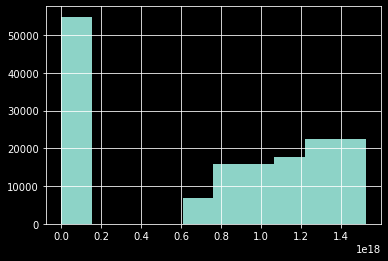

In [197]:
tweets[tweets['author_id'] > 999999999]['author_id'].hist()

In [198]:
tweets['id_tweets_copy'].isna().sum()

0

In [199]:
#the merged df should have as many records as tweets.

#copy tweet index
tweets['id_tweets_copy'] = tweets.index
#check that no
assert(tweets['id_tweets_copy'].isna().sum() == 0)
tudf = pd.merge(tweets, users, how = 'left', left_on = 'author_id', right_on = 'id', suffixes = ('_tweet', '_user') )
tudf.fillna(0, inplace = True)
tudf.drop_duplicates(subset = 'id_tweets_copy', inplace = True)
tudf.set_index('id_tweets_copy', inplace=True)
tudf.index.rename('tweet_id', inplace = True)
tudf.head()


,conversation_id,reply_settings,lang,entities_tweet,possibly_sensitive,source,public_metrics_tweet,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld_tweet,name,public_metrics_user,url,description,profile_image_url,location,protected,username,verified,entities_user,pinned_tweet_id,withheld_user
tweet_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1521733018293084160,1521733018293084160,everyone,en,"{'urls': [{'start': 54, 'end': 77, 'url': 'htt...",False,Twitter Web App,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle (ES) #118 5/6\r\n\r\n⬜⬜🟨🟩⬜\r\n⬜⬜🟨🟩⬜\r\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1006110502043471872,2022-05-04 06:06:38+00:00,[],0.0,{},{},{},Jose Antonio,"{'followers_count': 147, 'following_count': 43...",,"Antiguo usuario bloqueado por error, pero he v...",https://pbs.twimg.com/profile_images/144681186...,"Alcalá de Guadaíra, Spain",False,Joseamj_97,False,{},0.0,{}
1521733015738662913,1521733015738662913,everyone,es,"{'urls': [{'start': 58, 'end': 81, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle Científico #52 5/6\r\n\r\n⬜⬜⬜⬜🟨\r\n🟨⬜⬜⬜...,"[{'domain': {'id': '30', 'name': 'Entities [En...",360002014,2022-05-04 06:06:38+00:00,[],0.0,{},{},{},Ana V Garcia,"{'followers_count': 41, 'following_count': 136...",https://t.co/uMfikCmd0I,,https://pbs.twimg.com/profile_images/122215871...,Alcalá de Henares,False,AnaVGarciaG,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",0.0,{}
1521733011414257664,1521733011414257664,everyone,en,{},False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 319 4/6\r\n\r\n🟨🟨⬜⬜⬜\r\n🟨⬜⬜🟩⬜\r\n🟩🟨⬜🟩🟨\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",828818052892422148,2022-05-04 06:06:37+00:00,[],0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.0,0
1521733010504445954,1521733010504445954,everyone,en,{},False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Back in the saddle.\r\n\r\nWordle 319 3/6\r\n\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",862077942,2022-05-04 06:06:36+00:00,[],0.0,{},{},{},John Milton ✊,"{'followers_count': 1465, 'following_count': 2...",https://t.co/iOfRLxEru5,"It's not criticism, it's just a different way ...",https://pbs.twimg.com/profile_images/150123920...,Spain,False,Geordioca,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",0.0,{}
1521733001981444096,1521731925559418880,everyone,en,"{'mentions': [{'start': 0, 'end': 12, 'usernam...",False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",@RwellsWells Same. Are we both spotters? Haha ...,"[{'domain': {'id': '30', 'name': 'Entities [En...",53116513,2022-05-04 06:06:34+00:00,"[{'type': 'replied_to', 'id': '152173192555941...",331622540.0,{},{},{},christopher jones,"{'followers_count': 189, 'following_count': 26...",,I don't like cricket. oh no. i love it!,https://pbs.twimg.com/profile_images/110881711...,sheffield,False,chrisjones792,False,{},0.0,{}


In [200]:
#no duplicate indices
tudf[tudf.index.duplicated()]

,conversation_id,reply_settings,lang,entities_tweet,possibly_sensitive,source,public_metrics_tweet,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld_tweet,name,public_metrics_user,url,description,profile_image_url,location,protected,username,verified,entities_user,pinned_tweet_id,withheld_user
tweet_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [201]:
#no duplicate data
tudf[tudf.duplicated()]

,conversation_id,reply_settings,lang,entities_tweet,possibly_sensitive,source,public_metrics_tweet,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld_tweet,name,public_metrics_user,url,description,profile_image_url,location,protected,username,verified,entities_user,pinned_tweet_id,withheld_user
tweet_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [202]:
#look at info for new merged dataframe.
tudf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335327 entries, 1521733018293084160 to 1521994876677672966
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   conversation_id       335327 non-null  int64  
 1   reply_settings        335327 non-null  object 
 2   lang                  335327 non-null  object 
 3   entities_tweet        335327 non-null  object 
 4   possibly_sensitive    335327 non-null  bool   
 5   source                335327 non-null  object 
 6   public_metrics_tweet  335327 non-null  object 
 7   text                  335327 non-null  object 
 8   context_annotations   335327 non-null  object 
 9   author_id             335327 non-null  int64  
 10  created_at            335327 non-null  object 
 11  referenced_tweets     335327 non-null  object 
 12  in_reply_to_user_id   335327 non-null  float64
 13  attachments           335327 non-null  object 
 14  geo                  

In [203]:
# a large number of these do not have usernames. These seem to be those for very large author_ids.
tudf[tudf['username'] == 0]

,conversation_id,reply_settings,lang,entities_tweet,possibly_sensitive,source,public_metrics_tweet,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld_tweet,name,public_metrics_user,url,description,profile_image_url,location,protected,username,verified,entities_user,pinned_tweet_id,withheld_user
tweet_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1521733011414257664,1521733011414257664,everyone,en,{},False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 319 4/6\r\n\r\n🟨🟨⬜⬜⬜\r\n🟨⬜⬜🟩⬜\r\n🟩🟨⬜🟩🟨\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",828818052892422148,2022-05-04 06:06:37+00:00,[],0.000000e+00,{},{},{},0,0,0,0,0,0,0,0,0,0,0.0,0
1521732967764140032,1495295658353315840,everyone,th,"{'urls': [{'start': 43, 'end': 66, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",เวิร์ดเดล 98 4/6\r\n\r\n🟩⬜🟨🟨⬜\r\n🟩🟨⬜🟩⬜\r\n🟩⬜⬜⬜...,[],946067305879842819,2022-05-04 06:06:26+00:00,"[{'type': 'replied_to', 'id': '152081469439032...",9.460673e+17,{},{},{},0,0,0,0,0,0,0,0,0,0,0.0,0
1521732951439945728,1510513887988264964,everyone,en,{},False,Twitter Web App,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 319 4/6\r\n\r\n⬜🟩⬜🟨⬜\r\n⬜🟩🟩🟩🟩\r\n⬜🟩🟩🟩🟩\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",904515648327442433,2022-05-04 06:06:22+00:00,"[{'type': 'replied_to', 'id': '152139649722441...",9.045156e+17,{},{},{},0,0,0,0,0,0,0,0,0,0,0.0,0
1521732892392534016,1521732892392534016,everyone,ko,"{'urls': [{'start': 11, 'end': 34, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",워들 206 5/6\r\nhttps://t.co/9kAozJhfgA\r\n\r\n🟩...,[],1505751287404498954,2022-05-04 06:06:08+00:00,[],0.000000e+00,{},{},{},0,0,0,0,0,0,0,0,0,0,0.0,0
1521732887770456065,1521732885782347776,everyone,fr,"{'urls': [{'start': 54, 'end': 77, 'url': 'htt...",False,Twitter Web App,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",Le Mot (@WordleFR) #115 4/6\r\n\r\n⬛⬛⬛⬛⬛\r\n⬛🟩...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1393902207960064001,2022-05-04 06:06:07+00:00,"[{'type': 'replied_to', 'id': '152173288578234...",1.393902e+18,{},{},{},0,0,0,0,0,0,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521995141334114305,1521988433408929795,everyone,en,"{'mentions': [{'start': 0, 'end': 10, 'usernam...",False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",@paulsinha Wordle 320 X/6\n\n⬛⬛⬛🟨🟩\n⬛🟩⬛🟩🟩\n⬛🟩⬛...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1176436558142038017,2022-05-04 23:28:13+00:00,"[{'type': 'replied_to', 'id': '152198843340892...",2.048170e+07,{},{},{},0,0,0,0,0,0,0,0,0,0,0.0,0
1521995093204475906,1521995093204475906,everyone,en,{},False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 320 4/6\n\n⬛🟨⬛⬛⬛\n⬛🟨⬛🟩⬛\n🟨🟩⬛🟩🟩\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",1050021399585263617,2022-05-04 23:28:02+00:00,[],0.000000e+00,{},{},{},0,0,0,0,0,0,0,0,0,0,0.0,0
1521995088444162048,1521995088444162048,everyone,ja,"{'urls': [{'start': 55, 'end': 78, 'url': 'htt...",False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",ポケモンWordle 6/10\n\n⬛⬛⬛🟨⬛ 🟩🟩🟩🟩🟩\n⬛🟨⬛⬛⬛\n🟩⬛⬛⬛⬛\...,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",1266878568325279749,2022-05-04 23:28:01+00:00,[],0.000000e+00,{},{},{},0,0,0,0,0,0,0,0,0,0,0.0,0


users

    json_likes = ['entities', 'withheld']


tweets

    json_likes = ['entities', 'attachments', 'geo', 'withheld']
    lists_of_json_likes = ['context_annotations','referenced_tweets']

In [204]:
json_cols_in_tudf = ['entities_tweet',
            'withheld_tweet',
            'public_metrics_tweet',
            'public_metrics_user',
            'geo',
            'withheld_user',
            'entities_user']

json_list_cols_in_tudf = [
            'context_annotations',
            'referenced_tweets'
]

In [205]:
# show the json-like columns in tudf
tudf[json_cols_in_tudf].head()

,entities_tweet,withheld_tweet,public_metrics_tweet,public_metrics_user,geo,withheld_user,entities_user
tweet_id,,,,,,,
1521733018293084160,"{'urls': [{'start': 54, 'end': 77, 'url': 'htt...",{},"{'retweet_count': 0, 'reply_count': 0, 'like_c...","{'followers_count': 147, 'following_count': 43...",{},{},{}
1521733015738662913,"{'urls': [{'start': 58, 'end': 81, 'url': 'htt...",{},"{'retweet_count': 0, 'reply_count': 0, 'like_c...","{'followers_count': 41, 'following_count': 136...",{},{},"{'url': {'urls': [{'start': 0, 'end': 23, 'url..."
1521733011414257664,{},{},"{'retweet_count': 0, 'reply_count': 0, 'like_c...",0,{},0,0
1521733010504445954,{},{},"{'retweet_count': 0, 'reply_count': 0, 'like_c...","{'followers_count': 1465, 'following_count': 2...",{},{},"{'url': {'urls': [{'start': 0, 'end': 23, 'url..."
1521733001981444096,"{'mentions': [{'start': 0, 'end': 12, 'usernam...",{},"{'retweet_count': 0, 'reply_count': 0, 'like_c...","{'followers_count': 189, 'following_count': 26...",{},{},{}


In [206]:
#show the lists of jsons in tudf
tudf[json_list_cols_in_tudf]

,context_annotations,referenced_tweets
tweet_id,,
1521733018293084160,"[{'domain': {'id': '30', 'name': 'Entities [En...",[]
1521733015738662913,"[{'domain': {'id': '30', 'name': 'Entities [En...",[]
1521733011414257664,"[{'domain': {'id': '30', 'name': 'Entities [En...",[]
1521733010504445954,"[{'domain': {'id': '30', 'name': 'Entities [En...",[]
1521733001981444096,"[{'domain': {'id': '30', 'name': 'Entities [En...","[{'type': 'replied_to', 'id': '152173192555941..."
...,...,...
1521994904523706368,"[{'domain': {'id': '30', 'name': 'Entities [En...",[]
1521994898974588929,"[{'domain': {'id': '30', 'name': 'Entities [En...",[]
1521994886941413376,"[{'domain': {'id': '30', 'name': 'Entities [En...",[]


In [207]:
tudf.head(3)

,conversation_id,reply_settings,lang,entities_tweet,possibly_sensitive,source,public_metrics_tweet,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld_tweet,name,public_metrics_user,url,description,profile_image_url,location,protected,username,verified,entities_user,pinned_tweet_id,withheld_user
tweet_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1521733018293084160,1521733018293084160,everyone,en,"{'urls': [{'start': 54, 'end': 77, 'url': 'htt...",False,Twitter Web App,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle (ES) #118 5/6\r\n\r\n⬜⬜🟨🟩⬜\r\n⬜⬜🟨🟩⬜\r\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1006110502043471872,2022-05-04 06:06:38+00:00,[],0.0,{},{},{},Jose Antonio,"{'followers_count': 147, 'following_count': 43...",,"Antiguo usuario bloqueado por error, pero he v...",https://pbs.twimg.com/profile_images/144681186...,"Alcalá de Guadaíra, Spain",False,Joseamj_97,False,{},0.0,{}
1521733015738662913,1521733015738662913,everyone,es,"{'urls': [{'start': 58, 'end': 81, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle Científico #52 5/6\r\n\r\n⬜⬜⬜⬜🟨\r\n🟨⬜⬜⬜...,"[{'domain': {'id': '30', 'name': 'Entities [En...",360002014,2022-05-04 06:06:38+00:00,[],0.0,{},{},{},Ana V Garcia,"{'followers_count': 41, 'following_count': 136...",https://t.co/uMfikCmd0I,,https://pbs.twimg.com/profile_images/122215871...,Alcalá de Henares,False,AnaVGarciaG,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",0.0,{}
1521733011414257664,1521733011414257664,everyone,en,{},False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 319 4/6\r\n\r\n🟨🟨⬜⬜⬜\r\n🟨⬜⬜🟩⬜\r\n🟩🟨⬜🟩🟨\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",828818052892422148,2022-05-04 06:06:37+00:00,[],0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.0,0


## format jsons with double quotes instead of single

This isn't just a matter of changing all single quotes into doubles, because there is an example of a value enclosed by rare double quotes to start, and containing a single quote.

luckily, ast.literal_eval magically solves this problem for us. It doesn't even require json.loads().

In [208]:
#example of literal_eval turning a json-like-but-with-single-quotes string into a python dict.
ast.literal_eval(
    tudf.iloc[0]['entities_tweet']
)

{'urls': [{'start': 54,
   'end': 77,
   'url': 'https://t.co/oJCukg4JnD',
   'expanded_url': 'https://wordle.danielfrg.com/',
   'display_url': 'wordle.danielfrg.com',
   'images': [{'url': 'https://pbs.twimg.com/news_img/1521670739459411968/tTDycHOP?format=jpg&name=orig',
     'width': 1200,
     'height': 630},
    {'url': 'https://pbs.twimg.com/news_img/1521670739459411968/tTDycHOP?format=jpg&name=150x150',
     'width': 150,
     'height': 150}],
   'status': 200,
   'title': 'Un juego de palabras diario',
   'description': 'Adivina la palabra oculta en 6 intentos. Un nuevo puzzle cada día.',
   'unwound_url': 'https://wordle.danielfrg.com/'}]}

In [209]:
###################################################
# No need for this function with ast.literal_eval()
# Made before I knew about the above function.
###################################################


# Turns all json-like strings with single quotes for keys and values will have those quotes changed into doubles quotes.
# Any single quote within double quotes (like in object 2846) will be turned 
def singleq_to_doubleq(some_string):
    new_string = some_string.replace("""'""",'''"''')
    return new_string
    

In [210]:
#test it out
singleq_to_doubleq('''aejkrha;ebglaerghlajerhar;tha'erghaqergha[serthnasrtgnasR"TNSrN"SrfnSRf'ns'rtn'srtna]''')

'aejkrha;ebglaerghlajerhar;tha"erghaqergha[serthnasrtgnasR"TNSrN"SrfnSRf"ns"rtn"srtna]'

In [211]:
###################################################
# No need for this function with ast.literal_eval()
###################################################
# replace single quotes with double quotes in strings in a pandas series
def series_singleq_to_doubleq(pandas_series):
    new_series = pandas_series.apply(lambda some_string: singleq_to_doubleq(some_string) )
    return new_series

###########
# use this!
###########
#goes straight from json-looking-but-with-single-quotes strings to a list of dicts using ast.literal_eval()
def series_literal_eval(pandas_series):
    new_series = list(map(lambda some_string: ast.literal_eval(some_string), list(pandas_series)))
    return new_series

In [212]:
#try out series_literal_eval
entities_tweet_list = series_literal_eval(tudf['entities_tweet'])
entities_tweet_list

[{'urls': [{'start': 54,
    'end': 77,
    'url': 'https://t.co/oJCukg4JnD',
    'expanded_url': 'https://wordle.danielfrg.com/',
    'display_url': 'wordle.danielfrg.com',
    'images': [{'url': 'https://pbs.twimg.com/news_img/1521670739459411968/tTDycHOP?format=jpg&name=orig',
      'width': 1200,
      'height': 630},
     {'url': 'https://pbs.twimg.com/news_img/1521670739459411968/tTDycHOP?format=jpg&name=150x150',
      'width': 150,
      'height': 150}],
    'status': 200,
    'title': 'Un juego de palabras diario',
    'description': 'Adivina la palabra oculta en 6 intentos. Un nuevo puzzle cada día.',
    'unwound_url': 'https://wordle.danielfrg.com/'}]},
 {'urls': [{'start': 58,
    'end': 81,
    'url': 'https://t.co/ifnVQsE6bO',
    'expanded_url': 'https://wordle.danielfrg.com/ciencia/index.html',
    'display_url': 'wordle.danielfrg.com/ciencia/index.…',
    'images': [{'url': 'https://pbs.twimg.com/news_img/1521711979752136704/Qr2DllcV?format=jpg&name=orig',
      'widt

---
### get all keys for all json columns

Refer to these later when expanding the json columns.

In [213]:
# gives the set of keys that show up in a list of dicts.

def get_dict_keys(list_of_dicts):
    key_ring = [
        list(entry.keys())
        for entry in list_of_dicts
    ]
    return list(reduce(np.union1d, key_ring))

In [214]:
json_cols_minus_context = ['entities_tweet',
 'public_metrics_tweet',
 'public_metrics_user',
 'entities_user']

In [215]:
# %%time
# col_keys = []
# for column in json_cols_minus_context:
#     col_keys.append([column,get_dict_keys(series_literal_eval(tudf[column]))])

In [216]:
# col_keys_pd = [
#     keys
#     for keys in col_keys
# ]

In [217]:
# pd.DataFrame(col_keys_pd, columns = ['json column','keys']).to_markdown()

|    | json column          | keys                                                                  |
|---:|:---------------------|:----------------------------------------------------------------------|
|  0 | entities_tweet       | ['annotations', 'cashtags', 'hashtags', 'mentions', 'urls']           |
|  1 | public_metrics_tweet | ['like_count', 'quote_count', 'reply_count', 'retweet_count']         |
|  2 | public_metrics_user  | ['followers_count', 'following_count', 'listed_count', 'tweet_count'] |
|  3 | entities_user        | ['description', 'url']                                                |

In [218]:
#pandas has its own function that turns "semi-structured" json into a flat table.

#expand entities_tweet column
pd.json_normalize(entities_tweet_list)

,urls,mentions,hashtags,annotations,cashtags
0,"[{'start': 54, 'end': 77, 'url': 'https://t.co...",NaN,NaN,NaN,NaN
1,"[{'start': 58, 'end': 81, 'url': 'https://t.co...",NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,"[{'start': 0, 'end': 12, 'username': 'RwellsWe...",NaN,NaN,NaN
...,...,...,...,...,...
335322,NaN,NaN,NaN,NaN,NaN
335323,NaN,NaN,NaN,NaN,NaN
335324,NaN,NaN,NaN,NaN,NaN
335325,NaN,NaN,NaN,NaN,NaN


In [219]:
#expand entities_user column
# pd.json_normalize(series_literal_eval(tudf['entities_user']))

In [220]:
#expand public metrics user columns
#pd.json_normalize(series_literal_eval(tudf['public_metrics_user']))

In [221]:
#expand public metrics tweet column
#pd.json_normalize(series_literal_eval(tudf['public_metrics_tweet']))

In [222]:
# takes in a pandas DataFrame, a list of JSON-like columns, expands the columns into their own
# DataFrame with the set of all keys as columns, properly assigns the original tweet index,
# and joins the results onto the original.

def expand_json_cols(pandas_dataframe, json_cols, inplace = False, drop_json_cols = False):
    #save the original index. confirmed it creates a new object, not a link to the last one
    original_index = pandas_dataframe.index
    #make a new dataframe to return if not altering the original
    if not inplace:
        new_df = pandas_dataframe.copy()
    # perform the merges over all the json_cols
    for column in json_cols:
        #create a new DataFrame from the column's jsons.
        new_json_df = pd.json_normalize(series_literal_eval(pandas_dataframe[column]))
        #assign the same indices as the original df to prepare for join
        new_json_df.index = pandas_dataframe.index
        #rename columns with a prefix so they are tracable and don't overwrite
        new_json_df = new_json_df.add_prefix(column)
        #join the expanded json columns to the original data
        if inplace:
            pandas_dataframe = pd.merge(pandas_dataframe, new_json_df, how = 'left')
            if drop_json_cols:
                pandas_dataframe.drop(columns = column, inplace = True)
        else:
            new_df = new_df.join(new_json_df)
            if drop_json_cols:
                new_df.drop(columns = column, inplace = True)
    #when that's done, return the result
    if inplace:
        #already altered the original dataframe
        return None
    else:
        return new_df

In [223]:
### wait to expand json columns in eda.

#make a new "master" dataframe with expanded json columns.
#%%time
#tudf_expanded = expand_json_cols(tudf,json_cols_minus_context, inplace=False, drop_json_cols=True)
#tudf_expanded

---
---
## Basic EDA

In [224]:
tudf.columns

Index(['conversation_id', 'reply_settings', 'lang', 'entities_tweet',
       'possibly_sensitive', 'source', 'public_metrics_tweet', 'text',
       'context_annotations', 'author_id', 'created_at', 'referenced_tweets',
       'in_reply_to_user_id', 'attachments', 'geo', 'withheld_tweet', 'name',
       'public_metrics_user', 'url', 'description', 'profile_image_url',
       'location', 'protected', 'username', 'verified', 'entities_user',
       'pinned_tweet_id', 'withheld_user'],
      dtype='object')

In [225]:
cols = list(tudf.columns)

### time span and tweet ids

In [226]:
# We'll return to time, but for now, send the created_at column to a datetime column and get the absolute basics.

In [227]:
tudf['created_at'] = pd.to_datetime(tudf['created_at'])

In [228]:
#print earliest and latest timestamps, as well as their timedelta difference.
latest = tudf['created_at'].max()
earliest = tudf['created_at'].min()
timespan = latest - earliest
earliest, latest, timespan

(Timestamp('2022-04-29 19:46:55+0000', tz='UTC'),
 Timestamp('2022-05-05 21:59:57+0000', tz='UTC'),
 Timedelta('6 days 02:13:02'))

In [229]:
tudf.index.max()

1522335315381395456

In [230]:
# Look at the latest tweet by tweet id.
tudf.loc[tudf.index.max()]

conversation_id                                       1522335315381395456
reply_settings                                                   everyone
lang                                                                   en
entities_tweet                                                         {}
possibly_sensitive                                                  False
source                                                    Twitter Web App
public_metrics_tweet    {'retweet_count': 0, 'reply_count': 0, 'like_c...
text                         Wordle 320 4/6\n\n🟨🟨⬛⬛⬛\n⬛🟩⬛🟩🟩\n⬛🟩⬛🟩🟩\n🟩🟩🟩🟩🟩
context_annotations     [{'domain': {'id': '30', 'name': 'Entities [En...
author_id                                                        21729445
created_at                                      2022-05-05 21:59:57+00:00
referenced_tweets                                                      []
in_reply_to_user_id                                                   0.0
attachments                           

In [231]:
# latest tweets by created_at.
tudf.loc[tudf['created_at'] == latest]

,conversation_id,reply_settings,lang,entities_tweet,possibly_sensitive,source,public_metrics_tweet,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld_tweet,name,public_metrics_user,url,description,profile_image_url,location,protected,username,verified,entities_user,pinned_tweet_id,withheld_user
tweet_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1522335315381395456,1522335315381395456,everyone,en,{},False,Twitter Web App,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 320 4/6\n\n🟨🟨⬛⬛⬛\n⬛🟩⬛🟩🟩\n⬛🟩⬛🟩🟩\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",21729445,2022-05-05 21:59:57+00:00,[],0.0,{},{},{},Barry ,"{'followers_count': 217, 'following_count': 16...",,Retired fruit sales manager. Sports car fanat...,https://pbs.twimg.com/profile_images/82081217/...,SoFla,False,iBaz66,False,{},0.0,{}


In [232]:
#look at oldest tweet by tweet_id
tudf.loc[tudf.index.min()]

conversation_id                                       1520127509051944961
reply_settings                                                   everyone
lang                                                                   en
entities_tweet                                                         {}
possibly_sensitive                                                  False
source                                                    Twitter Web App
public_metrics_tweet    {'retweet_count': 0, 'reply_count': 0, 'like_c...
text                         Wordle 314 4/6\n\n🟩⬛🟩🟨🟨\n🟩🟩🟩⬛🟨\n🟩🟩🟩🟩⬛\n🟩🟩🟩🟩🟩
context_annotations     [{'domain': {'id': '30', 'name': 'Entities [En...
author_id                                                       489622686
created_at                                      2022-04-29 19:46:55+00:00
referenced_tweets                                                      []
in_reply_to_user_id                                                   0.0
attachments                           

In [233]:
# look at oldest tweet by created_at
tudf.loc[tudf['created_at'] == earliest]

,conversation_id,reply_settings,lang,entities_tweet,possibly_sensitive,source,public_metrics_tweet,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld_tweet,name,public_metrics_user,url,description,profile_image_url,location,protected,username,verified,entities_user,pinned_tweet_id,withheld_user
tweet_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1520127509051944961,1520127509051944961,everyone,en,{},False,Twitter Web App,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 314 4/6\n\n🟩⬛🟩🟨🟨\n🟩🟩🟩⬛🟨\n🟩🟩🟩🟩⬛\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",489622686,2022-04-29 19:46:55+00:00,[],0.0,{},{},{},♔･ﾟ✧Lᴏɢɢʏ･ﾟ✧ ♔,"{'followers_count': 9322, 'following_count': 1...",,"*:･ﾟ I lσνε @arianagrande , & @blackpink *:･ﾟ\...",https://pbs.twimg.com/profile_images/148007682...,vote lisa and rose😃🤗,False,loggyf2,False,"{'description': {'mentions': [{'start': 12, 'e...",6.956076e+17,{}


[From the docs:](https://developer.twitter.com/en/docs/twitter-ids)
> The full ID is composed of a timestamp, a worker number, and a sequence number.

(array([24056., 31152., 37548., 32618., 40488., 34453., 34570., 34597.,
        21581., 44264.]),
 array([19111.82424769, 19112.43348611, 19113.04272454, 19113.65196296,
        19114.26120139, 19114.87043981, 19115.47967824, 19116.08891667,
        19116.69815509, 19117.30739352, 19117.91663194]),
 <BarContainer object of 10 artists>)

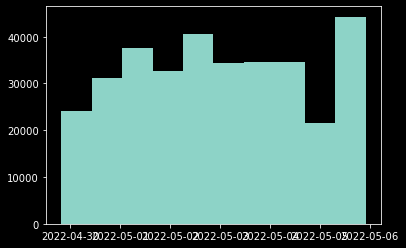

In [234]:
plt.hist(tudf['created_at'])

### conversation Id
The `conversation_id` is the id of the "base" tweet. If it's different from the tweet id, then the tweet is a reply somewhere in a thread with the base tweet as the root.

In [235]:
# What tweets have the same conversation id as index (id)?
is_reply = tudf['conversation_id'] != tudf.index
is_reply.sum()

31827

In [236]:
is_reply.sum()/len(tudf)

0.09491332341266882

about 9% of these tweets are in reply to another tweet. The metrics for these are kept track in public_metrics, so we'll check for numbers of replies and all that ahead.

---
###  reply_settings

Comes from `tweets`. A setting for who is allowed to reply.
The great majority (99.6%!) are set to `everyone`. A few thousandths are reserved only for users following the tweeter, or for users mentioned in the tweet.

In [237]:
rsvcs = tudf['reply_settings'].value_counts(normalize='yeah')*100
rsvcs

everyone          99.572060
following          0.241853
mentionedUsers     0.186087
Name: reply_settings, dtype: float64

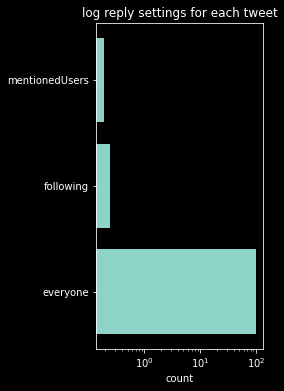

In [238]:
plt.figure(figsize = (3,6))
plt.barh(width=rsvcs, y=rsvcs.index, log = True)
plt.title("log reply settings for each tweet")
plt.xlabel('count');

---
### Language `lang`

A JSON converter for iso language codes to their proper english names was grabbed from [github/haliaeetus iso-639](https://github.com/haliaeetus/iso-639)

In [239]:
with open('../iso_639-1.json', 'r', encoding='utf-8') as lang_file:
    lang_dict = json.load(lang_file)
lang_dict['und'] = {'name':'undefined'}
lang_dict['in'] = {'name':'Indonesian'} #filling in some missing ones
lang_dict['iw'] = {'name':'Hebrew'}

In [240]:
lang_dict['aa']

{'639-1': 'aa',
 '639-2': 'aar',
 'family': 'Afro-Asiatic',
 'name': 'Afar',
 'nativeName': 'Afaraf',
 'wikiUrl': 'https://en.wikipedia.org/wiki/Afar_language'}

In [241]:
np.logspace(0,5,5)

array([1.00000000e+00, 1.77827941e+01, 3.16227766e+02, 5.62341325e+03,
       1.00000000e+05])

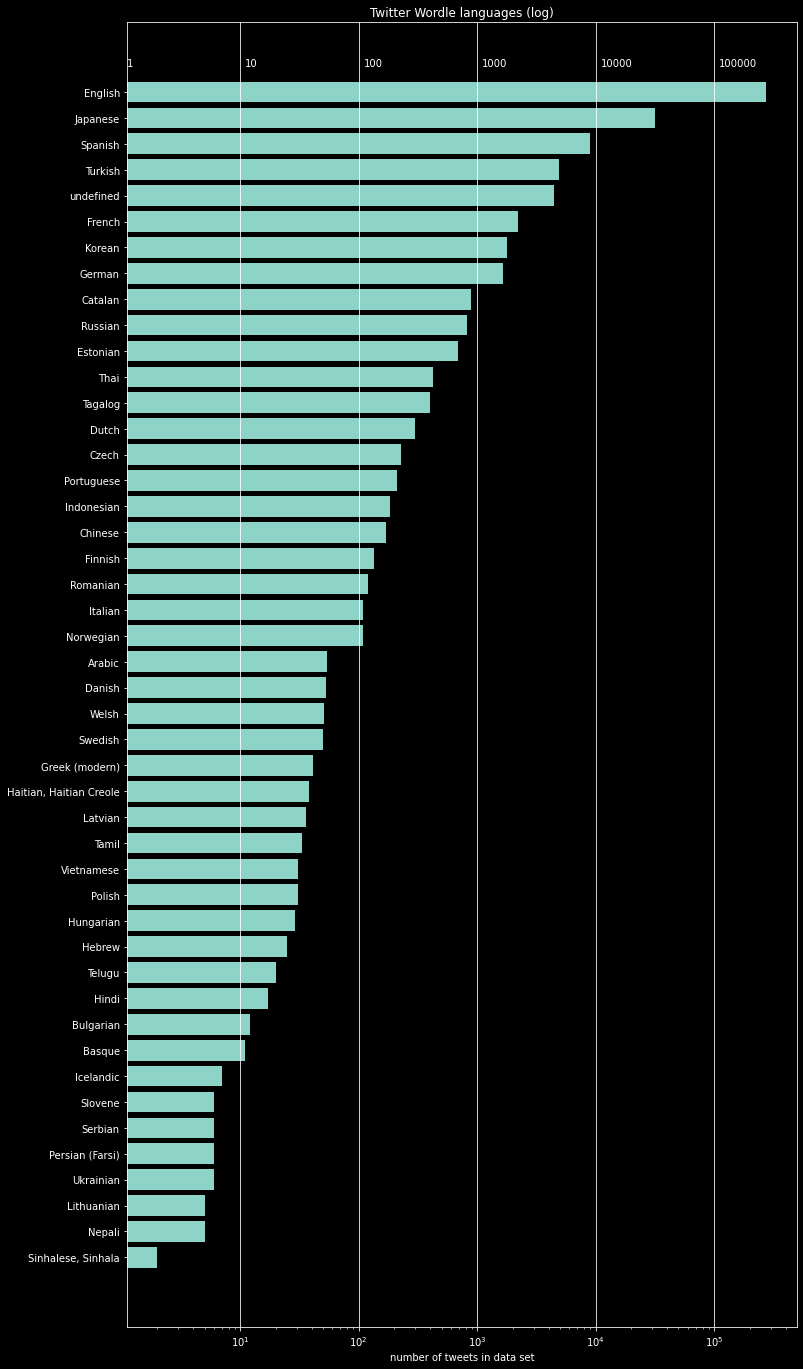

In [242]:
#plot languages


def plot_tweet_languages(pandas_dataframe, log = True, figsize = (12,24), num_text = True, reverse = True):
    lang_vcs = pandas_dataframe['lang'].value_counts()
    if reverse:
        lang_vcs = lang_vcs[::-1]
    lang_vcs_names = [
        lang_dict[lang]['name']
        for lang in lang_vcs.index
    ]
    fig = plt.figure(figsize=figsize)
    plt.grid(axis = 'x')
    plt.barh(width=lang_vcs, y=lang_vcs_names, log = log)
    plt.title('Twitter Wordle languages' + (' (log)' if log else ''))
    plt.xlabel("number of tweets in data set")
    if num_text:
        for xpos in np.logspace(0,5,6):
            plt.text(x = xpos*1.1, y = 46, s= str(int(xpos)))
    plt.show()
    return None

plot_tweet_languages(tudf)

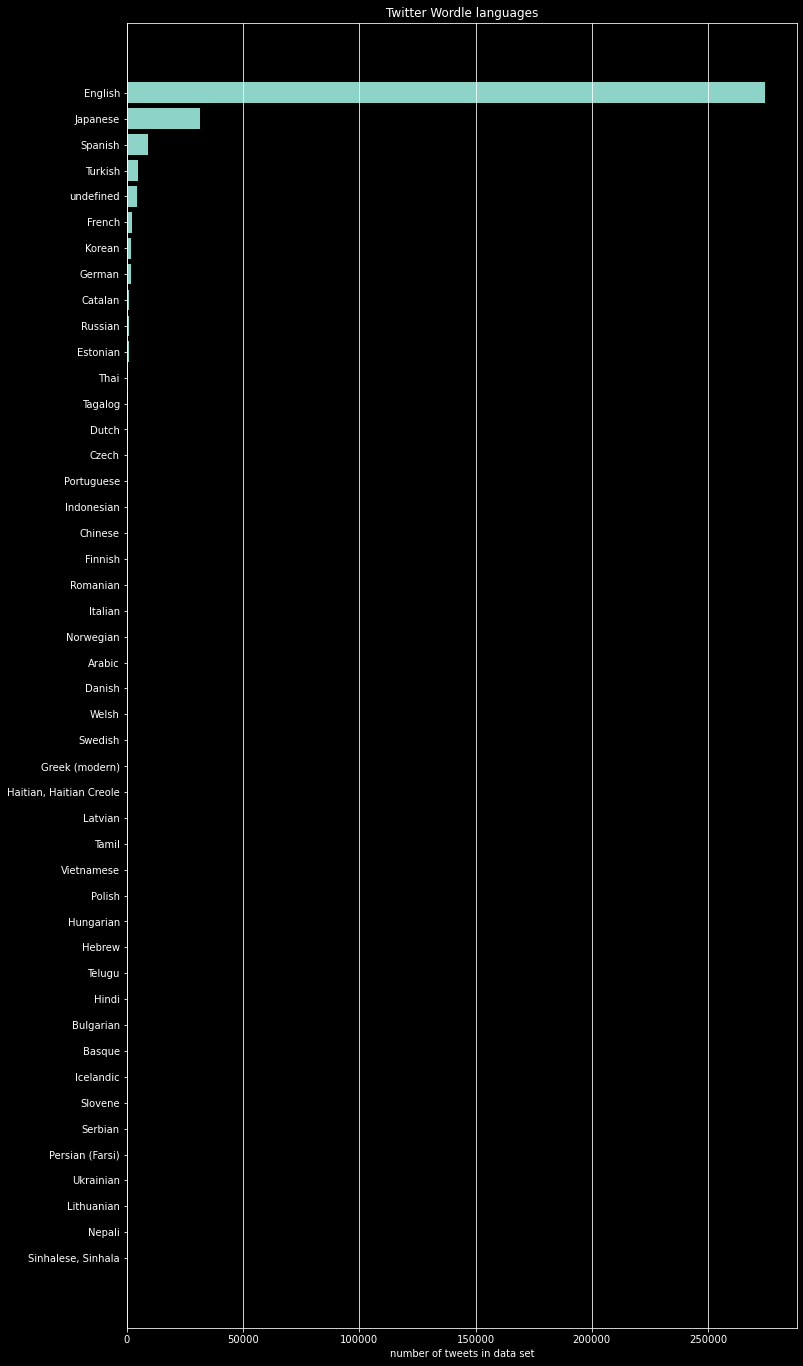

In [243]:
plot_tweet_languages(tudf, num_text=False, log = False)

---
### entities_tweet

These were `entities` in the tweets data. Entities are json-like columns with the following keys:

In [244]:
entities_tweet_keys = ['urls', 'mentions', 'hashtags', 'annotations', 'cashtags']

In [245]:
tudf['entities_tweet'].head()

tweet_id
1521733018293084160    {'urls': [{'start': 54, 'end': 77, 'url': 'htt...
1521733015738662913    {'urls': [{'start': 58, 'end': 81, 'url': 'htt...
1521733011414257664                                                   {}
1521733010504445954                                                   {}
1521733001981444096    {'mentions': [{'start': 0, 'end': 12, 'usernam...
Name: entities_tweet, dtype: object

In [246]:
# turn the entities_tweet column into a series of columns, one for each of the possible keys.
tudf = expand_json_cols(tudf, ['entities_tweet'], drop_json_cols=True)

In [247]:
tudf.head(3)

,conversation_id,reply_settings,lang,possibly_sensitive,source,public_metrics_tweet,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld_tweet,name,public_metrics_user,url,description,profile_image_url,location,protected,username,verified,entities_user,pinned_tweet_id,withheld_user,entities_tweeturls,entities_tweetmentions,entities_tweethashtags,entities_tweetannotations,entities_tweetcashtags
tweet_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1521733018293084160,1521733018293084160,everyone,en,False,Twitter Web App,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle (ES) #118 5/6\r\n\r\n⬜⬜🟨🟩⬜\r\n⬜⬜🟨🟩⬜\r\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1006110502043471872,2022-05-04 06:06:38+00:00,[],0.0,{},{},{},Jose Antonio,"{'followers_count': 147, 'following_count': 43...",,"Antiguo usuario bloqueado por error, pero he v...",https://pbs.twimg.com/profile_images/144681186...,"Alcalá de Guadaíra, Spain",False,Joseamj_97,False,{},0.0,{},"[{'start': 54, 'end': 77, 'url': 'https://t.co...",NaN,NaN,NaN,NaN
1521733015738662913,1521733015738662913,everyone,es,False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle Científico #52 5/6\r\n\r\n⬜⬜⬜⬜🟨\r\n🟨⬜⬜⬜...,"[{'domain': {'id': '30', 'name': 'Entities [En...",360002014,2022-05-04 06:06:38+00:00,[],0.0,{},{},{},Ana V Garcia,"{'followers_count': 41, 'following_count': 136...",https://t.co/uMfikCmd0I,,https://pbs.twimg.com/profile_images/122215871...,Alcalá de Henares,False,AnaVGarciaG,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",0.0,{},"[{'start': 58, 'end': 81, 'url': 'https://t.co...",NaN,NaN,NaN,NaN
1521733011414257664,1521733011414257664,everyone,en,False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 319 4/6\r\n\r\n🟨🟨⬜⬜⬜\r\n🟨⬜⬜🟩⬜\r\n🟩🟨⬜🟩🟨\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",828818052892422148,2022-05-04 06:06:37+00:00,[],0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.0,0,NaN,NaN,NaN,NaN,NaN


In [248]:
tudf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335327 entries, 1521733018293084160 to 1521994876677672966
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype              
---  ------                     --------------   -----              
 0   conversation_id            335327 non-null  int64              
 1   reply_settings             335327 non-null  object             
 2   lang                       335327 non-null  object             
 3   possibly_sensitive         335327 non-null  bool               
 4   source                     335327 non-null  object             
 5   public_metrics_tweet       335327 non-null  object             
 6   text                       335327 non-null  object             
 7   context_annotations        335327 non-null  object             
 8   author_id                  335327 non-null  int64              
 9   created_at                 335327 non-null  datetime64[ns, UTC]
 10  referenced_tweets        

### entities_tweeturls
the first key in `entities_tweet`.

In [249]:
tudf['entities_tweeturls'].head()

tweet_id
1521733018293084160    [{'start': 54, 'end': 77, 'url': 'https://t.co...
1521733015738662913    [{'start': 58, 'end': 81, 'url': 'https://t.co...
1521733011414257664                                                  NaN
1521733010504445954                                                  NaN
1521733001981444096                                                  NaN
Name: entities_tweeturls, dtype: object

In [250]:
entities_tweeturls_vcs = tudf['entities_tweeturls'].apply(lambda x: len(x) if type(x) == list else x).value_counts()
entities_tweeturls_vcs

1.0    80761
2.0     1318
3.0      106
4.0       22
6.0        3
5.0        1
Name: entities_tweeturls, dtype: int64

In [251]:
expanded_tweet_urls = [
    entry
    for entry in tudf['entities_tweeturls'].dropna()
]
expanded_tweet_urls

[[{'start': 54,
   'end': 77,
   'url': 'https://t.co/oJCukg4JnD',
   'expanded_url': 'https://wordle.danielfrg.com/',
   'display_url': 'wordle.danielfrg.com',
   'images': [{'url': 'https://pbs.twimg.com/news_img/1521670739459411968/tTDycHOP?format=jpg&name=orig',
     'width': 1200,
     'height': 630},
    {'url': 'https://pbs.twimg.com/news_img/1521670739459411968/tTDycHOP?format=jpg&name=150x150',
     'width': 150,
     'height': 150}],
   'status': 200,
   'title': 'Un juego de palabras diario',
   'description': 'Adivina la palabra oculta en 6 intentos. Un nuevo puzzle cada día.',
   'unwound_url': 'https://wordle.danielfrg.com/'}],
 [{'start': 58,
   'end': 81,
   'url': 'https://t.co/ifnVQsE6bO',
   'expanded_url': 'https://wordle.danielfrg.com/ciencia/index.html',
   'display_url': 'wordle.danielfrg.com/ciencia/index.…',
   'images': [{'url': 'https://pbs.twimg.com/news_img/1521711979752136704/Qr2DllcV?format=jpg&name=orig',
     'width': 1200,
     'height': 630},
    {'ur

In [252]:
len(expanded_tweet_urls)

82211

entities_tweeturls appear to have a base set of keys, with `start` and `end` some integers that appear to typically be 23 characters long. This is the same length as the `url` string, which appears to be a twitter-specific "bit.ly" or "tiny url" style url. These also come with `expanded_url` and `display_url` which have the original url with or without the https:// prefix.

the `start` and `end` keys appear to be common amongst all of these entities. They give the location in the tweet text of the entity. I am largely uninterested in this location.

There are other keys: `media_key` is a string of format `num_numnumnum`

In [253]:
# get all linked urls.


### entities_tweetmentions

A list of users mentioned in the tweet. Includes the username and user id.

Each entry is a list of dicts. Each dict is itself a user.

In [254]:
expanded_tweet_mentions = [
    entry
    for entry in tudf['entities_tweetmentions'].dropna()
]
expanded_tweet_mentions

[[{'start': 0, 'end': 12, 'username': 'RwellsWells', 'id': '331622540'}],
 [{'start': 0,
   'end': 16,
   'username': 'misfortunateApe',
   'id': '1275838631891152898'},
  {'start': 17,
   'end': 31,
   'username': 'SamuelAlpha77',
   'id': '1353120743199023106'},
  {'start': 32, 'end': 40, 'username': '1kisfud', 'id': '1495802955580297216'},
  {'start': 41,
   'end': 53,
   'username': 'SumPersonal',
   'id': '1437848652085669894'},
  {'start': 54,
   'end': 69,
   'username': 'ifyouknowyk4ir',
   'id': '1105516614978596864'},
  {'start': 70,
   'end': 84,
   'username': '42Chainlink42',
   'id': '1350970179128356866'},
  {'start': 85,
   'end': 101,
   'username': 'onlyshitpost777',
   'id': '1150564524354764800'}],
 [{'start': 0, 'end': 9, 'username': 'albolt76', 'id': '1160130818678972416'},
  {'start': 10,
   'end': 24,
   'username': 'aBitSquirrely',
   'id': '1248231058614747137'},
  {'start': 25, 'end': 34, 'username': 'dawardle', 'id': '1165789231'}],
 [{'start': 8,
   'end': 

In [255]:
# how many of these mentioned users are themselves tweeters in the list?

def get_mentioned_users(entities_mentioned_list, unique = False):
    extracted_mentions = []
    for this_entities_mentioned in entities_mentioned_list:
        for mentioned_user in this_entities_mentioned:
            extracted_mentions.append([mentioned_user['username'], mentioned_user['id']])
    if unique:
        return list(map(lambda extracted_mention: list(np.unique(extracted_mention)), extracted_mentions))
    return extracted_mentions

In [256]:
unique_mentioned_users = get_mentioned_users(expanded_tweet_mentions, unique=True)
unique_mentioned_users[:5]

[['331622540', 'RwellsWells'],
 ['1275838631891152898', 'misfortunateApe'],
 ['1353120743199023106', 'SamuelAlpha77'],
 ['1495802955580297216', '1kisfud'],
 ['1437848652085669894', 'SumPersonal']]

In [257]:
type(unique_mentioned_users[0][0])

numpy.str_

In [258]:
#at least one of the user ids in this list is a missing hexadecimal for some reason.
#del(unique_mentioned_users[321])

In [259]:
#check how many users are in the posted users
mentioned_users_in_users_unique = [  
    int(mentioned_user[0]) in users.index
    for mentioned_user in unique_mentioned_users
    if mentioned_user[0].isnumeric()
]

np.mean(mentioned_users_in_users_unique)

0.5409774436090226

About 22% of mentioned users themselves are original posters. This is blind to replies, where mentions are automatically added to a tweet. The point is that over 3 out of 4 of these mentioned users aren't even posting completed Wordles themselves! Mentions may be a good way to spread the game via word-of-mouth, but one would need to track if these users eventually post themselves. Remember: a person posting their Wordle game is not IFF they played Wordle --- many of these people could be avid players.

In [260]:
#do the same for a list of non-unique mentions. Includes the user for every mention in the set, including repeats.
#for some reason, unique = True/False also switches the order of the username and id
all_mentioned_users = get_mentioned_users(entities_mentioned_list=expanded_tweet_mentions, unique= False)
mentioned_user_in_users = [  
    int(mentioned_user[1]) in users.index
    for mentioned_user in all_mentioned_users
    if mentioned_user[1].isnumeric()
]

np.mean(mentioned_user_in_users)

0.5412868632707775

This is almost the same. But a tiny bit smaller? That seems off.

### entities_tweethashtags

In [261]:
tudf['entities_tweethashtags'].dropna()

tweet_id
1521732994817740800      [{'start': 67, 'end': 78, 'tag': 'ポケモンWordle'}]
1521732956125122561        [{'start': 0, 'end': 10, 'tag': 'WordleCAT'}]
1521732947589873664      [{'start': 87, 'end': 98, 'tag': 'ポケモンWordle'}]
1521732873975386113    [{'start': 0, 'end': 7, 'tag': 'Wordle'}, {'st...
1521732844640518144            [{'start': 0, 'end': 7, 'tag': 'Wordle'}]
                                             ...                        
1521995229712183296       [{'start': 47, 'end': 57, 'tag': 'Wordle320'}]
1521995088444162048      [{'start': 80, 'end': 91, 'tag': 'ポケモンWordle'}]
1521995045569708036            [{'start': 0, 'end': 7, 'tag': 'Wordle'}]
1521994920067747845            [{'start': 0, 'end': 7, 'tag': 'AlWird'}]
1521994909661958146     [{'start': 167, 'end': 177, 'tag': 'Wordle320'}]
Name: entities_tweethashtags, Length: 31604, dtype: object

In [262]:
len(tudf['entities_tweethashtags'].dropna())/len(tudf)

0.09424830091224387

about 9% of the tweets have at least one hashtag.

In [263]:
# get all hashtags
def get_all_hashtags(list_of_hashtag_lists, hashtag_key='tag', flat = True):
    if flat:
        complete_hashtag_list = []
        for hashtag_list in list_of_hashtag_lists:
            for hashtag_dict in hashtag_list:
                complete_hashtag_list.append(hashtag_dict[hashtag_key])
    else:
        complete_hashtag_list = [
            [
                hashtag_dict[hashtag_key]
                for hashtag_dict in hashtag_list
            ]
            for hashtag_list in list_of_hashtag_lists
        ]
    return complete_hashtag_list

all_hashtags_df = pd.DataFrame(get_all_hashtags(tudf['entities_tweethashtags'].dropna(), flat = True), columns = ["hashtag"])

In [264]:
#get list of hashtags by frequency
all_hashtags_df['hashtag'].value_counts()

ポケモンWordle         13081
Wordle              6011
wordle              2327
WordleCAT           1965
dailywordleclub      960
                   ...  
bluey                  1
bluedle                1
mondays                1
48Hours                1
random                 1
Name: hashtag, Length: 1961, dtype: int64

<BarContainer object of 20 artists>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44544 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 46308 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12465 missing from c

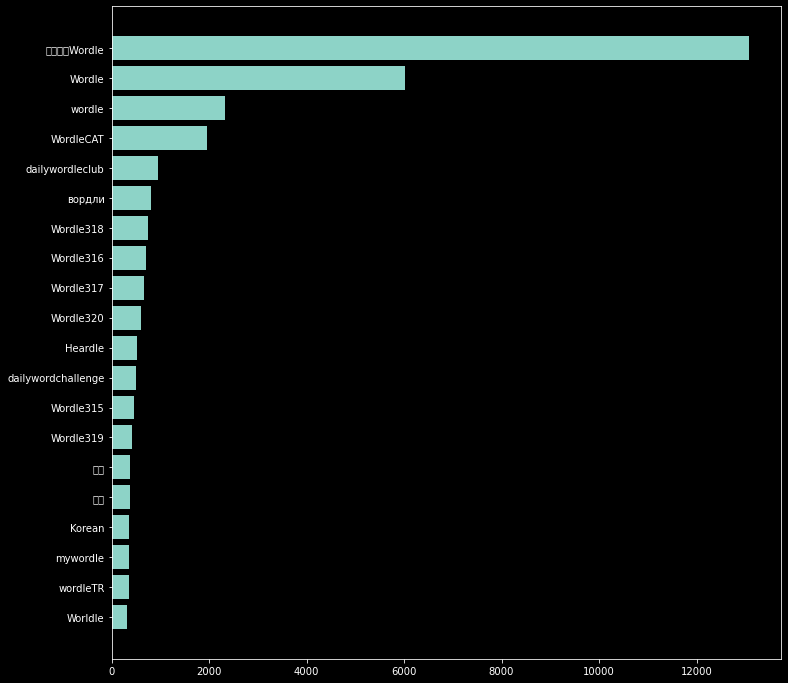

In [265]:
all_hashtags_vcs = all_hashtags_df['hashtag'].value_counts()[:20][::-1]
plt.figure(figsize = (12, 12))
plt.barh(width = all_hashtags_vcs, y = all_hashtags_vcs.index)

Foreign language characters aren't in the plotting font. The top result is `ポケモンWordle`, specifically a Pokemon Wordle clone popular in Japan.

Following are simply `Wordle` and `wordle`.

Fourth is `WordleCAT`, for Catalan.

Next, and further ahead, is `Wordle`XXX, a hashtag specifically for that day's Wordle, with XXX the number.

In [266]:
#get distributions of number of hashtags per tweet.
hashtag_num_distribution = pd.DataFrame(tudf['entities_tweethashtags'].apply(lambda x: len(x) if type(x) == list else 0))

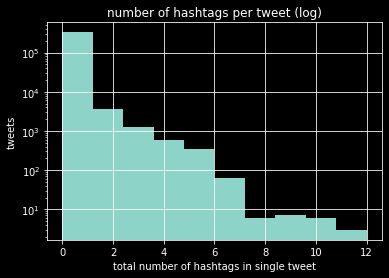

In [267]:
#plot hashtag count distribution.
hashtag_num_distribution['entities_tweethashtags'].hist(log = True)
plt.xlabel("total number of hashtags in single tweet")
plt.ylabel("tweets")
plt.title("number of hashtags per tweet (log)");

In [268]:
tudf['entities_tweethashtags'].dropna().iloc[0]

[{'start': 67, 'end': 78, 'tag': 'ポケモンWordle'}]

### entities_tweetsannotations

Twitter has a bunch of ids for topics and assigns probabilities that a tweet is about a certain topic.
It's cool that you can look up tweets by topic id. I guess that's how a lot of people stay on top of things for their own projects about a single topic.

[The docs](https://developer.twitter.com/en/docs/twitter-api/annotations/overview) have an overview of the kinds of entities things can be. Context annotations will be looked at ahead of this section.

In [269]:
tudf['entities_tweetannotations'].dropna()

tweet_id
1521727434374418432    [{'start': 12, 'end': 18, 'probability': 0.707...
1521726764883619840    [{'start': 19, 'end': 27, 'probability': 0.318...
1521726119682228228    [{'start': 20, 'end': 26, 'probability': 0.474...
1521725413877293056    [{'start': 15, 'end': 31, 'probability': 0.366...
1521723789180088320    [{'start': 51, 'end': 54, 'probability': 0.593...
                                             ...                        
1521996804979671045    [{'start': 0, 'end': 5, 'probability': 0.3086,...
1521996157475762176    [{'start': 140, 'end': 149, 'probability': 0.8...
1521995907297861633    [{'start': 0, 'end': 23, 'probability': 0.5194...
1521995400865107968    [{'start': 0, 'end': 5, 'probability': 0.4368,...
1521994909661958146    [{'start': 13, 'end': 19, 'probability': 0.361...
Name: entities_tweetannotations, Length: 2538, dtype: object

In [270]:
tudf['entities_tweetannotations'].dropna().iloc[0]

[{'start': 12,
  'end': 18,
  'probability': 0.7079,
  'type': 'Product',
  'normalized_text': 'twitter'}]

In [271]:
tudf['entities_tweetannotations'].dropna().iloc[1]

[{'start': 19,
  'end': 27,
  'probability': 0.318,
  'type': 'Other',
  'normalized_text': 'Star Wars'}]

### entities_tweetscashtags

Very small number of tweets have a "cashtag." These were added as a way to keep track of stock prices. Perhaps it's a hashtag from a list of stock codes.

In [272]:
tudf.loc[tudf['entities_tweetcashtags'].dropna().index]

,conversation_id,reply_settings,lang,possibly_sensitive,source,public_metrics_tweet,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld_tweet,name,public_metrics_user,url,description,profile_image_url,location,protected,username,verified,entities_user,pinned_tweet_id,withheld_user,entities_tweeturls,entities_tweetmentions,entities_tweethashtags,entities_tweetannotations,entities_tweetcashtags
tweet_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1521363122812030976,1521363122812030976,everyone,en,False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 318 5/6\r\n\r\n⬛⬛🟩⬛⬛\r\n⬛🟨🟩⬛⬛\r\n🟨🟩🟩⬛⬛\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1447577070465429510,2022-05-03 05:36:48+00:00,[],0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.0,0,NaN,NaN,NaN,NaN,"[{'start': 69, 'end': 71, 'tag': 'h'}]"


### possibly_sensitive

Less than 1% of the tweets are marked as possibly_sensitive.

In [273]:
#get percentage of possibly_sensitive tweets
tudf['possibly_sensitive'].value_counts(normalize='yeah')

False    0.991191
True     0.008809
Name: possibly_sensitive, dtype: float64

In [274]:
tudf[tudf['possibly_sensitive']].head()

,conversation_id,reply_settings,lang,possibly_sensitive,source,public_metrics_tweet,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld_tweet,name,public_metrics_user,url,description,profile_image_url,location,protected,username,verified,entities_user,pinned_tweet_id,withheld_user,entities_tweeturls,entities_tweetmentions,entities_tweethashtags,entities_tweetannotations,entities_tweetcashtags
tweet_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1521732020044546050,1521732020044546050,everyone,und,True,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",#WordleCAT 124 3/6\r\n\r\n🟩🟨⬜⬜🟩\r\n🟩🟩🟩⬜🟩\r\n🟩🟩...,[],2465123766,2022-05-04 06:02:40+00:00,[],0.0,{},{},{},Maria Font,"{'followers_count': 11, 'following_count': 52,...",,,https://pbs.twimg.com/profile_images/141650585...,,False,Mafontp,False,{},1.279520e+18,{},"[{'start': 39, 'end': 62, 'url': 'https://t.co...",NaN,"[{'start': 0, 'end': 10, 'tag': 'WordleCAT'}]",NaN,NaN
1521731907632852992,1521731907632852992,everyone,ja,True,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",ポケモンWordle 5/10\r\n\r\n⬛⬛⬛⬛🟩\r\n⬛⬛⬛⬛🟩\r\n⬛🟩⬛⬛🟩...,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",1184725640076914691,2022-05-04 06:02:13+00:00,[],0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.000000e+00,0,"[{'start': 48, 'end': 71, 'url': 'https://t.co...",NaN,"[{'start': 73, 'end': 84, 'tag': 'ポケモンWordle'}]",NaN,NaN
1521731773092225024,1521731773092225024,everyone,und,True,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",#WordleCAT 124 5/6\r\n\r\n⬜⬜⬜⬜🟩\r\n⬜🟩⬜⬜🟩\r\n⬜🟩...,[],1180367820,2022-05-04 06:01:41+00:00,[],0.0,{},{},{},Toni,"{'followers_count': 83, 'following_count': 392...",,Lletissó d’adopció,https://pbs.twimg.com/profile_images/144575407...,,False,ToniRouge77,False,{},1.387744e+18,{},"[{'start': 51, 'end': 74, 'url': 'https://t.co...",NaN,"[{'start': 0, 'end': 10, 'tag': 'WordleCAT'}]",NaN,NaN
1521731038292099075,1521731038292099075,everyone,en,True,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle (ES) #118 5/6\r\n\r\n⬜🟨⬜🟨🟨\r\n🟩🟩⬜🟨⬜\r\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",452862948,2022-05-04 05:58:46+00:00,[],0.0,{},{},{},Alejandra López ❤️💛❤️,"{'followers_count': 412, 'following_count': 36...",,Shippeadora Turquil oficial!!,https://pbs.twimg.com/profile_images/139140381...,Turquía,False,alejitasi,False,{},1.478831e+18,{},"[{'start': 54, 'end': 77, 'url': 'https://t.co...",NaN,NaN,NaN,NaN
1521730686197157889,1521730686197157889,everyone,es,True,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle Científico #52 3/6\r\n\r\n⬜🟩⬜⬜⬜\r\n🟨🟨🟨🟨...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1057296265195732992,2022-05-04 05:57:22+00:00,[],0.0,{},{},{},Andoni Zalla,"{'followers_count': 235, 'following_count': 11...",,,https://pbs.twimg.com/profile_images/141920373...,,False,joseba_zorrilla,False,{},0.000000e+00,{},"[{'start': 46, 'end': 69, 'url': 'https://t.co...",NaN,NaN,NaN,NaN


In [275]:
tudf[tudf['possibly_sensitive']]['lang'].value_counts()

en     1370
ja      974
es      215
tr      146
und      60
fr       58
de       41
ko       37
ru       16
ca       13
cs        7
et        4
zh        4
th        2
fi        1
no        1
tl        1
pt        1
da        1
hu        1
nl        1
Name: lang, dtype: int64

In [276]:
#language distribution of possibly_sensitive tweets

In [277]:
type(tudf[tudf['possibly_sensitive']])

pandas.core.frame.DataFrame

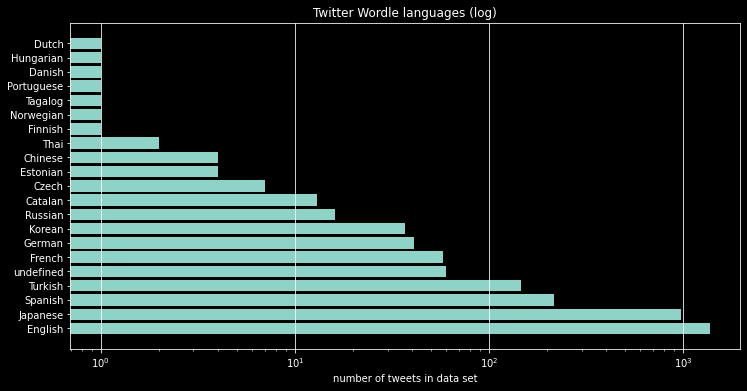

In [278]:
#language distribution of possibly_sensitive
plot_tweet_languages(tudf[tudf['possibly_sensitive']], figsize = (12,6), num_text=False, reverse = False)


In [279]:
tudf.columns

Index(['conversation_id', 'reply_settings', 'lang', 'possibly_sensitive',
       'source', 'public_metrics_tweet', 'text', 'context_annotations',
       'author_id', 'created_at', 'referenced_tweets', 'in_reply_to_user_id',
       'attachments', 'geo', 'withheld_tweet', 'name', 'public_metrics_user',
       'url', 'description', 'profile_image_url', 'location', 'protected',
       'username', 'verified', 'entities_user', 'pinned_tweet_id',
       'withheld_user', 'entities_tweeturls', 'entities_tweetmentions',
       'entities_tweethashtags', 'entities_tweetannotations',
       'entities_tweetcashtags'],
      dtype='object')

### Source

Source appears to be the name of the program that sent in the tweet. There are over 350 unique ones, with most of these applied to single tweets. The heavy hitters are unexpected popular programs.

|          software           |    fraction |
|:--------------------|-----------:|
| Twitter for iPhone  | 0.466511   |
| Twitter for Android | 0.340715   |
| Twitter Web App     | 0.137656   |
| Twitter for iPad    | 0.0271263  |
| TweetDeck           | 0.00942429 |
| Tweetbot for iΟS    | 0.00509013 |

In [280]:
#look at value counts
tudf['source'].value_counts()[:6]

Twitter for iPhone     156426
Twitter for Android    113244
Twitter Web App         47042
Twitter for iPad         9046
TweetDeck                3185
Tweetbot for iΟS         1730
Name: source, dtype: int64

In [281]:
#generate the table above
(tudf['source'].value_counts('normalize it')[:6]*100).to_markdown(index=True)

ImportError: Missing optional dependency 'tabulate'.  Use pip or conda to install tabulate.

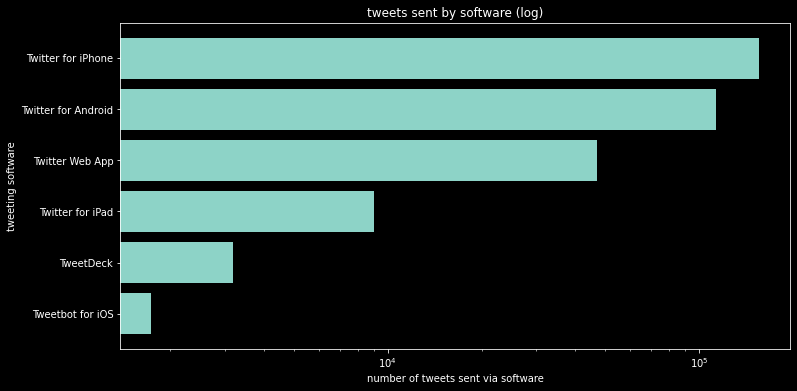

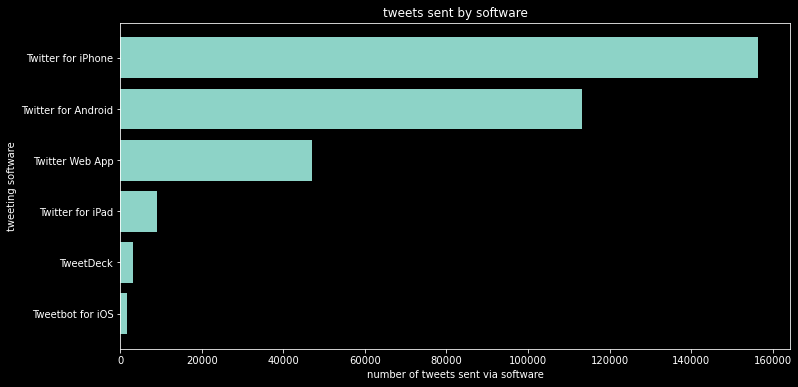

In [282]:
#plot them, both with log and linear scales.
top_source_vcs = tudf['source'].value_counts()[:6][::-1]

plt.figure(figsize = (12,6))
plt.barh(width = top_source_vcs, y=top_source_vcs.index, log = True)
plt.xlabel('number of tweets sent via software')
plt.ylabel("tweeting software")
plt.title("tweets sent by software (log)");
plt.show()


plt.figure(figsize = (12,6))
plt.barh(width = top_source_vcs, y=top_source_vcs.index, log = False)
plt.xlabel('number of tweets sent via software')
plt.ylabel("tweeting software")
plt.title("tweets sent by software");
plt.show()

### public_metrics_tweet

These consist of:
- retweet_count
- reply_count
- like_count
- quote_count

In [283]:
tudf['public_metrics_tweet'].iloc[0]

"{'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}"

In [284]:
#turn the public_metrics_tweet column into a series of columns.
# turn the entities_tweet column into a series of columns, one for each of the possible keys.
tudf = expand_json_cols(tudf, ['public_metrics_tweet'], drop_json_cols=True)

In [285]:
tudf[tudf.columns[-4:]].head()

,public_metrics_tweetretweet_count,public_metrics_tweetreply_count,public_metrics_tweetlike_count,public_metrics_tweetquote_count
tweet_id,,,,
1521733018293084160,0,0,0,0
1521733015738662913,0,0,0,0
1521733011414257664,0,0,0,0
1521733010504445954,0,0,0,0
1521733001981444096,0,0,0,0


### public_metrics_tweetretweet_count

The vast majority are not retweeted.

There are a few that were tweeted a huge number of times! 

In [286]:
tudf['public_metrics_tweetretweet_count'].value_counts()

0       330575
1         3600
2          354
3          121
4           71
41          68
10          52
140         49
58          47
5           38
35          37
8           36
34          32
6           30
25          24
20          20
21          19
23          16
138         16
139         14
12          13
11          11
7            8
16           7
15           6
18           5
30           5
72           3
71           3
134          3
70           3
2742         3
9            3
74           2
14           2
48           2
1713         2
558          2
131          2
345          2
135          2
19           1
40           1
367          1
263          1
129          1
239          1
8587         1
6921         1
31           1
32           1
184          1
559          1
24           1
343          1
961          1
121          1
69           1
1499         1
8588         1
Name: public_metrics_tweetretweet_count, dtype: int64

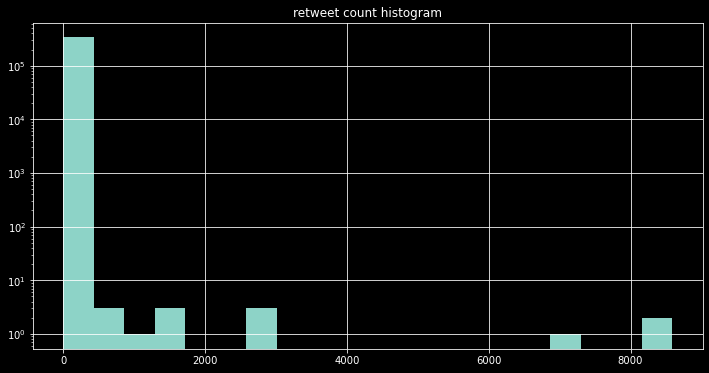

In [287]:
tudf['public_metrics_tweetretweet_count'].hist(bins = 20, log = True, figsize = (12,6))
plt.title("retweet count histogram");

In [288]:
tudf[tudf['public_metrics_tweetretweet_count'] > 500]

,conversation_id,reply_settings,lang,possibly_sensitive,source,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld_tweet,name,public_metrics_user,url,description,profile_image_url,location,protected,username,verified,entities_user,pinned_tweet_id,withheld_user,entities_tweeturls,entities_tweetmentions,entities_tweethashtags,entities_tweetannotations,entities_tweetcashtags,public_metrics_tweetretweet_count,public_metrics_tweetreply_count,public_metrics_tweetlike_count,public_metrics_tweetquote_count
tweet_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1521523004508975104,1521523004508975104,everyone,en,False,Twitter for iPhone,RT @cametek: Wordle 235\r\n\r\n⬛⬛⬛⬛⬛\r\n⬛⬛⬛⬛⬛\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1501400213025550345,2022-05-03 16:12:07+00:00,"[{'type': 'retweeted', 'id': '1491263558923210...",0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.000000e+00,0,NaN,"[{'start': 3, 'end': 11, 'username': 'cametek'...",NaN,NaN,NaN,1713,0,0,0
1521496553231425539,1521496553231425539,everyone,en,False,Twitter for Android,RT @GeorgeNootFound: Wordle 229 X/6\r\n\r\n🟨🟨⬛...,"[{'domain': {'id': '30', 'name': 'Entities [En...",825691456895455232,2022-05-03 14:27:00+00:00,"[{'type': 'retweeted', 'id': '1489268441374597...",0.0,{},{},{},Leigh⁷🇵🇭,"{'followers_count': 501, 'following_count': 12...",,🏳‍🌈early gang gigglechamp | gimme lore crumbs pls,https://pbs.twimg.com/profile_images/150650238...,Republic of the Philippines,False,thejintoyurjoon,False,{},0.000000e+00,{},NaN,"[{'start': 3, 'end': 19, 'username': 'GeorgeNo...",NaN,NaN,NaN,2742,0,0,0
1521492943080759298,1521492943080759298,everyone,en,False,Twitter for Android,RT @VorosTwins: Today's Wordle is SUS\r\n\r\n⬛...,"[{'domain': {'id': '30', 'name': 'Entities [En...",701785116,2022-05-03 14:12:40+00:00,"[{'type': 'retweeted', 'id': '1516797822238031...",0.0,{},{},{},Biscotte,"{'followers_count': 183, 'following_count': 69...",,"j'ai 21 ans, il/he, Je suis un Jojofag, j'ador...",https://pbs.twimg.com/profile_images/144676852...,,False,pierre590,False,"{'description': {'mentions': [{'start': 97, 'e...",1.477292e+18,{},NaN,"[{'start': 3, 'end': 14, 'username': 'VorosTwi...",NaN,"[{'start': 24, 'end': 29, 'probability': 0.379...",NaN,559,0,0,0
1521292805355843587,1521292805355843587,everyone,en,False,Twitter for iPad,RT @VorosTwins: Today's Wordle is SUS\r\n\r\n⬛...,"[{'domain': {'id': '30', 'name': 'Entities [En...",4473988098,2022-05-03 00:57:23+00:00,"[{'type': 'retweeted', 'id': '1516797822238031...",0.0,{},{},{},GOBBIFIED,"{'followers_count': 78, 'following_count': 198...",,"「Google LeShoes, at your service! (OUT OF ORDE...",https://pbs.twimg.com/profile_images/150529566...,,False,GlNGADENSETSU,False,{},1.492770e+18,{},NaN,"[{'start': 3, 'end': 14, 'username': 'VorosTwi...",NaN,"[{'start': 24, 'end': 29, 'probability': 0.379...",NaN,558,0,0,0
1521087200901103616,1521087200901103616,everyone,ko,False,Twitter Web App,RT @cehigi: #Wordle 중독증 3/6\n\n⬜⬜⬜⬜⬜\n⬜🟩⬜🟨⬜\n🟩...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1432335794262343687,2022-05-02 11:20:23+00:00,"[{'type': 'retweeted', 'id': '1486992649982967...",0.0,{'media_keys': ['3_1486992170259476484']},{},{},0,0,0,0,0,0,0,0,0,0,0.000000e+00,0,"[{'start': 47, 'end': 70, 'url': 'https://t.co...","[{'start': 3, 'end': 10, 'username': 'cehigi',...","[{'start': 12, 'end': 19, 'tag': 'Wordle'}]",NaN,NaN,961,0,0,0
1520845001495879685,1520845001495879685,everyone,en,False,Twitter Web App,RT @VorosTwins: Today's Wordle is SUS\n\n⬛🟩🟩🟩 ...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1062694393742802944,2022-05-01 19:17:58+00:00,"[{'type': 'retweeted', 'id': '1516797822238031...",0.0,{},{},{},DeniceBenice !!,"{'followers_count': 165, 'following_count': 33...",https://t.co/nOCiNnNfxS,I draw occasionally,https://pbs.twimg.com/profile_images/143430278...,(she/they),False,DeniceBenice,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",1.250518e+18,{},NaN,"[{'start': 3, 'end':

![500+ RT tweet: today's wordle is sus.](./pix/sustweet.png)

This one is a retweet of a popular tweet with an Among Us nintendo character in it. The game led to a rise in the use of the word "sus" as short for suspicious.

Perhaps retweet counts are inherited by retweets.

All of the tweets with >500 retweets are themselves retweets.

### public_metrics_tweettweet_replycount

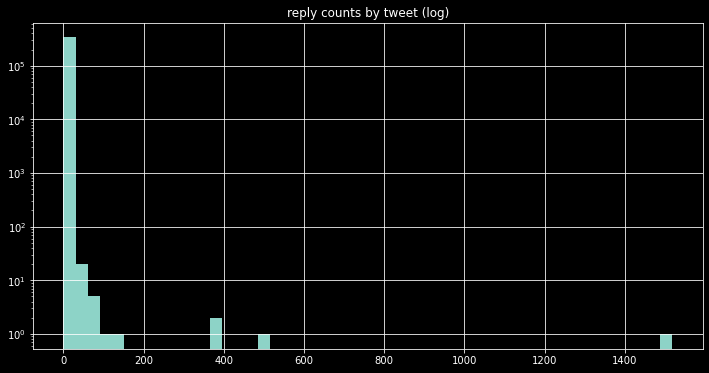

In [289]:
tudf['public_metrics_tweetreply_count'].hist(bins = 50,log = True, figsize = (12,6))
plt.title("reply counts by tweet (log)");

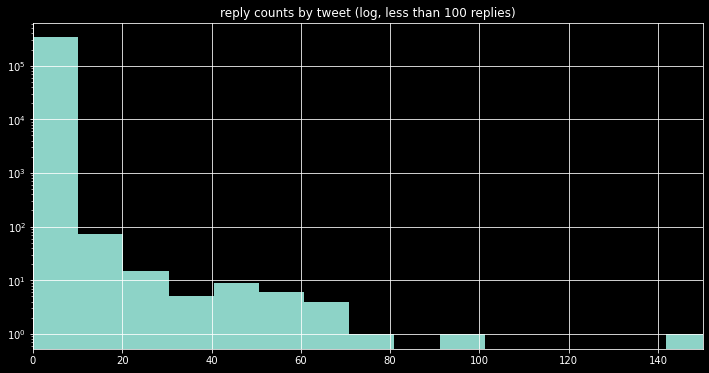

In [290]:
tudf['public_metrics_tweetreply_count'].hist(bins = 150,log = True, figsize = (12,6))
plt.title("reply counts by tweet (log, less than 100 replies)")
plt.xlim(0,150);

### public_metrics_tweetlike_count

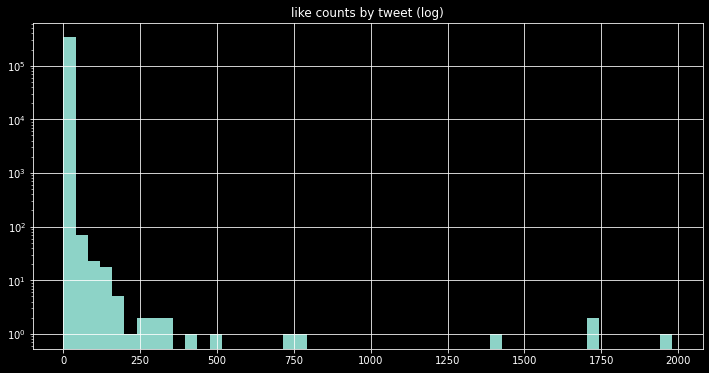

In [291]:
tudf['public_metrics_tweetlike_count'].hist(bins = 50,log = True, figsize = (12,6))
plt.title("like counts by tweet (log)");

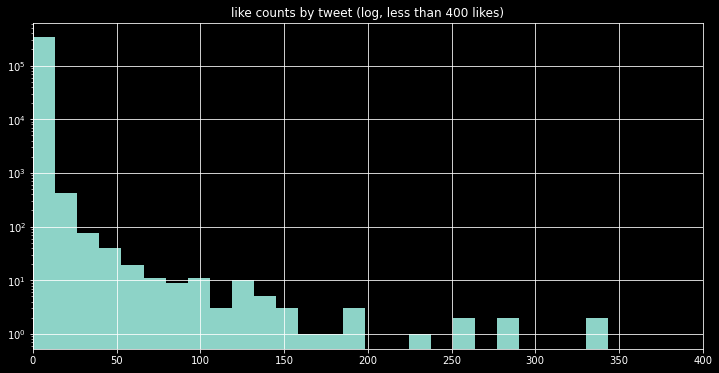

In [292]:
tudf['public_metrics_tweetlike_count'].hist(bins = 150,log = True, figsize = (12,6))
plt.title("like counts by tweet (log, less than 400 likes)")
plt.xlim(0,400);

In [293]:
#look at tweets with more than 250 likes
tudf[tudf['public_metrics_tweetlike_count'] > 250]

,conversation_id,reply_settings,lang,possibly_sensitive,source,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld_tweet,name,public_metrics_user,url,description,profile_image_url,location,protected,username,verified,entities_user,pinned_tweet_id,withheld_user,entities_tweeturls,entities_tweetmentions,entities_tweethashtags,entities_tweetannotations,entities_tweetcashtags,public_metrics_tweetretweet_count,public_metrics_tweetreply_count,public_metrics_tweetlike_count,public_metrics_tweetquote_count
tweet_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1521446701801910272,1521446701801910272,everyone,en,False,Twitter for iPhone,Wordle 318 2/6*\r\n\r\n⬛🟩⬛⬛⬛\r\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",1294500310191349760,2022-05-03 11:08:55+00:00,[],0.0,{},{},{},hannie ross,"{'followers_count': 283709, 'following_count':...",https://t.co/2yDWVPTkOK,main: @hannahxxrose | #rosetwt | banner: @neex...,https://pbs.twimg.com/profile_images/148368167...,,False,hanniexxrose,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",1.510697e+18,{},NaN,NaN,NaN,NaN,NaN,10,26,1722,0
1520833608272867328,1520833608272867328,everyone,en,False,Twitter Web App,Today was a tough one #Wordle315 \nWordle 316 ...,"[{'domain': {'id': '10', 'name': 'Person', 'de...",17953972,2022-05-01 18:32:42+00:00,[],0.0,{},{},{},bert kreischer,"{'followers_count': 881888, 'following_count':...",https://t.co/KYSpUUG31B,"I am a Party Animal, Comedian, Actor, Author, ...",https://pbs.twimg.com/profile_images/119139535...,Los Angeles,False,bertkreischer,True,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",1.520475e+18,{},NaN,NaN,"[{'start': 22, 'end': 32, 'tag': 'Wordle315'}]",NaN,NaN,4,68,411,0
1520805744710356992,1520805744710356992,everyone,en,False,Twitter for iPhone,I’m giving a hint because the Wordle Master is...,"[{'domain': {'id': '10', 'name': 'Person', 'de...",27491578,2022-05-01 16:41:59+00:00,[],0.0,{},{},{},Nancy Lee Grahn,"{'followers_count': 170985, 'following_count':...",https://t.co/APsFdvSgme,I act on TV and as a citizen. The opinions her...,https://pbs.twimg.com/profile_images/105601465...,A blue state,False,NancyLeeGrahn,True,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",1.498707e+18,{},NaN,NaN,NaN,"[{'start': 30, 'end': 42, 'probability': 0.408...",NaN,4,69,256,2
1520713571054850048,1520713571054850048,everyone,en,False,Twitter for Android,Wow\nWordle 316 6/6\n\n⬛⬛⬛⬛🟨\n⬛🟩🟩⬛⬛\n🟩🟩🟩⬛⬛\n🟩🟩...,"[{'domain': {'id': '30', 'name': 'Entities [En...",381091977,2022-05-01 10:35:43+00:00,[],0.0,{'media_keys': ['3_1520713567443501057']},{},{},Arno/daily wordle😜/boots/music,"{'followers_count': 537, 'following_count': 28...",,"He/him. Musician. Be the best you can be, alw...",https://pbs.twimg.com/profile_images/151070535...,,False,arnojones1,False,{},0.000000e+00,{},"[{'start': 56, 'end': 79, 'url': 'https://t.co...",NaN,NaN,NaN,NaN,23,6,286,0
1520644473142788097,1520644473142788097,everyone,en,False,Twitter for Android,Is it cheating to use a dictionary? \nWordle 3...,"[{'domain': {'id': '10', 'name': 'Person', 'de...",454071012,2022-05-01 06:01:09+00:00,[],0.0,{},{},{},Jill Wine-Banks,"{'followers_count': 573498, 'following_count':...",https://t.co/1bXqjHUIoa,MSNBC legal analyst. Author #TheWatergateGirl....,https://pbs.twimg.com/profile_images/146686684...,"Chicago, IL",False,JillWineBanks,True,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",1.368981e+18,{},NaN,NaN,NaN,NaN,NaN,21,373,715,13
1520305212245827586,1520305212245827586,everyone,en,False,Twitter for Android,Tricky tonight\nWordle 315 4/6\n\n🟨⬜⬜⬜⬜\n⬜🟨🟨⬜⬜...,"[{'domain': {'id': '10', 'name': 'Person', 'de...",454071012,2022-04-30 07:33:03+00:00,[],0.0,{},{},{},Jill Wine-Banks,"{'followers_count': 573498, 'following_count':...",https://t.co/1bXqjHUIoa,MSNBC legal analyst. Author #TheWatergateGirl....,https://pbs.twimg.com/profile_images/146686684...,"Chicago, IL",False,JillWineBanks,True,"{'url': {'urls': [{'start': 0, 'end'

### public_metrics_tweetquote_count

Quoting is not a popular feature.

In [294]:
#number of quotes by fraction
tudf['public_metrics_tweetquote_count'].value_counts('nromalize')

0     0.996490
1     0.003415
2     0.000054
3     0.000012
5     0.000006
8     0.000006
15    0.000006
6     0.000003
4     0.000003
7     0.000003
13    0.000003
Name: public_metrics_tweetquote_count, dtype: float64

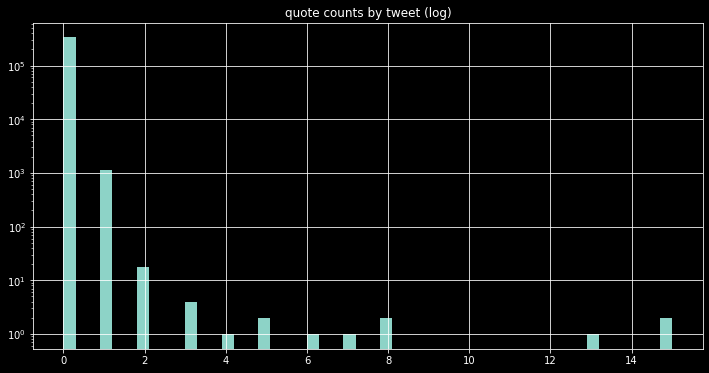

In [295]:
# plot quote number histogram
tudf['public_metrics_tweetquote_count'].hist(bins = 50,log = True, figsize = (12,6))
plt.title("quote counts by tweet (log)");

In [296]:
#look at tweets with quotes.
tudf[tudf['public_metrics_tweetquote_count'] > 0]

,conversation_id,reply_settings,lang,possibly_sensitive,source,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld_tweet,name,public_metrics_user,url,description,profile_image_url,location,protected,username,verified,entities_user,pinned_tweet_id,withheld_user,entities_tweeturls,entities_tweetmentions,entities_tweethashtags,entities_tweetannotations,entities_tweetcashtags,public_metrics_tweetretweet_count,public_metrics_tweetreply_count,public_metrics_tweetlike_count,public_metrics_tweetquote_count
tweet_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1521725904065548289,1521725904065548289,everyone,en,False,Twitter for iPhone,Wordle 319 3/6\r\n\r\n⬜⬜🟩⬜⬜\r\n🟩🟩🟩🟩⬜\r\n🟩🟩🟩🟩🟩\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",571864971,2022-05-04 05:38:22+00:00,[],0.0,{},{},{},MarkFitz90,"{'followers_count': 942, 'following_count': 11...",,"Ex “Job”, NHS, & Charity worker. Enjoys 🚴 🏊‍♂️...",https://pbs.twimg.com/profile_images/136053711...,Chesterfield,False,Fitz90MARK,False,{},1.450819e+18,{},NaN,NaN,NaN,NaN,NaN,0,0,1,1
1521721108583563264,1521721108583563264,everyone,en,False,Twitter for iPhone,Wordle 319 3/6\r\n\r\n⬛🟩🟩🟨⬛\r\n⬛🟩🟩⬛🟩\r\n🟩🟩🟩🟩🟩\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",38226081,2022-05-04 05:19:19+00:00,[],0.0,{},{},{},Meridith Nordin,"{'followers_count': 441, 'following_count': 45...",,"My interests are diverse...Sports,travel, musi...",https://pbs.twimg.com/profile_images/109194618...,"ÜT: 44.684937,-93.282909",False,Meridith19,False,{},0.000000e+00,{},NaN,NaN,NaN,NaN,NaN,0,0,1,1
1521718751011426305,1521718751011426305,everyone,en,False,Twitter Web App,Wordle 319 5/6\r\n\r\n🟨⬜⬜🟩⬜\r\n⬜🟨⬜🟩⬜\r\n⬜⬜🟩🟩🟨\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",715654161493139456,2022-05-04 05:09:57+00:00,[],0.0,{'media_keys': ['3_1521718742677438464']},{},{},Ailey 🍒,"{'followers_count': 564, 'following_count': 76...",https://t.co/MOstQZkzMe,your local milkman ☆ art: @shuppeii ☆ private:...,https://pbs.twimg.com/profile_images/152046973...,she/they 🏳️‍⚧️ 19,False,Aikilime,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",1.488746e+18,{},"[{'start': 58, 'end': 81, 'url': 'https://t.co...",NaN,NaN,NaN,NaN,0,2,0,1
1521711300791136256,1521711300791136256,everyone,ko,False,Twitter for Android,워들 206 X/6\r\nhttps://t.co/Q3eJpB5HPo\r\n\r\n거...,[],1451073432,2022-05-04 04:40:20+00:00,[],0.0,{},{},{},루아(Rua),"{'followers_count': 4323, 'following_count': 3...",,🇰🇷KOR Cosplayer | RUA | Team.CSL | 👋변계체블\r\n🚫D...,https://pbs.twimg.com/profile_images/151161630...,Weibo: RUA_cos / Insta: ru_a09,False,Ru_a09,False,{},1.519938e+18,{},"[{'start': 11, 'end': 34, 'url': 'https://t.co...",NaN,NaN,NaN,NaN,2,1,1,1
1521702550189363202,1521702550189363202,everyone,en,False,Twitter for Android,Wordle (ES) #117 6/6\r\n\r\n🟨⬜⬜⬜🟩\r\n⬜🟨⬜⬜🟩\r\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1371573064044060680,2022-05-04 04:05:34+00:00,[],0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.000000e+00,0,"[{'start': 60, 'end': 83, 'url': 'https://t.co...",NaN,NaN,NaN,NaN,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521996614612701184,1521996614612701184,everyone,en,False,Twitter for Android,Wordle 320 3/6\n\n⬜🟨⬜🟨🟨\n🟩⬜🟩🟩⬜\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",2561782624,2022-05-04 23:34:04+00:00,[],0.0,{},{},{},oluwadarasimi,"{'followers_count': 389, 'following_count': 50...",,FC Barcelona. Pep. Federer. Osaka. \nWe are ti...,https://pbs.twimg.com/profile_images/152018457...,"Orimattila, Suomi",False,TheOdejobi,False,{},8.558066e+17,{},NaN,NaN,NaN,NaN,NaN,0,0,0,1
1521995762787254272,1521995762787254272,everyone,en,True,Twitter for iPhone,Wordle 319 3/6\n\n🟨⬜⬜🟩⬜\n⬜🟨🟩🟩🟨\n🟩🟩🟩🟩🟩 https://...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1228018114555592704,2022-05-04 23:30:41+00:00,[],0.0,{'media_keys': ['3_1521995758341267458']},{},{},Zaddy Zick,"{'followers_count':

# Text

This is the text of the tweet! There are all sorts of things we could do with this. Tweets were specifically found using the search term `🟩 Wordle`, looking for any tweet with `Wordle` and `🟩`.

In 3_data_cleanup.ipynb, tweets with complete Wordle games had their games stripped from the text. These were saved as strings of digits, with 2 as 🟩, 1 as 🟨, and 0 as ⬛/⬜. They are all in a row, but the length is a multiple of 5, so the number of game rows is implied by `len(string)/5`.


### game

In [297]:
#import wordle games
wordle_games_path = '../merged_data/wordle_games.csv'
wordle_games = pd.read_csv(wordle_games_path, index_col = 'id')

In [298]:
wordle_games.head()

,wordle_games
id,
1521733018293084160,0012000120000220202222222
1521733015738662913,0000110002020020202222222
1521733011414257664,11000100202102122222
1521733010504445954,020102222022222
1521733001981444096,0020122222


In [299]:
wordle_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243245 entries, 1521733018293084160 to 1520733408237916161
Data columns (total 1 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   wordle_games  243245 non-null  object
dtypes: object(1)
memory usage: 3.7+ MB


In [300]:
wordle_games.rename(columns={'wordle_games':'game'}, inplace = True)

In [301]:
#create new columns with info and statistics on the games.

#add encoded game to main dataframe
tudf = tudf.join(wordle_games)

### win

In [302]:
#whether a win occured. This is guessing the word in 6 or fewer tries.
tudf['win'] = tudf['game'].apply(lambda game: str(game)[-5:] == '22222')

In [303]:
#wins
tudf['win'].value_counts()

True     228074
False    158383
Name: win, dtype: int64

In [304]:
# That's a lot of wins, but there are a lot of tweets that aren't proper Wordles. Cut these out and look again.

#value counts for 'win' only for games with a non-null `game`
tudf.loc[tudf['game'].dropna().index]['win'].value_counts()

True     353242
False     22905
Name: win, dtype: int64

In [305]:
# value counts for wins by percentage
tudf.loc[tudf['game'].dropna().index]['win'].value_counts('mormamose')

True     0.939106
False    0.060894
Name: win, dtype: float64

about 94% of shared wordle games were winners. What do losing games look like?

In [306]:
tudf[tudf['win'] == False & tudf['game'].notna()] #.loc[1520127524377972737]['text']

,conversation_id,reply_settings,lang,possibly_sensitive,source,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld_tweet,name,public_metrics_user,url,description,profile_image_url,location,protected,username,verified,entities_user,pinned_tweet_id,withheld_user,entities_tweeturls,entities_tweetmentions,entities_tweethashtags,entities_tweetannotations,entities_tweetcashtags,public_metrics_tweetretweet_count,public_metrics_tweetreply_count,public_metrics_tweetlike_count,public_metrics_tweetquote_count,game,win
1520127509051944961,1520127509051944961,everyone,en,False,Twitter Web App,Wordle 314 4/6\n\n🟩⬛🟩🟨🟨\n🟩🟩🟩⬛🟨\n🟩🟩🟩🟩⬛\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",489622686,2022-04-29 19:46:55+00:00,[],0.0,{},{},{},♔･ﾟ✧Lᴏɢɢʏ･ﾟ✧ ♔,"{'followers_count': 9322, 'following_count': 1...",,"*:･ﾟ I lσνε @arianagrande , & @blackpink *:･ﾟ\...",https://pbs.twimg.com/profile_images/148007682...,vote lisa and rose😃🤗,False,loggyf2,False,"{'description': {'mentions': [{'start': 12, 'e...",6.956076e+17,{},NaN,NaN,NaN,NaN,NaN,0,0,2,0,NaN,False
1520127524377972737,1520127524377972737,everyone,en,False,Twitter for iPhone,😈💅😈💅😈💅\n\nWordle 314 2/6\n\n🟩⬛🟩🟨🟨\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",25239815,2022-04-29 19:46:59+00:00,[],0.0,{},{},{},Carly Garza | Commissions Open,"{'followers_count': 714, 'following_count': 95...",https://t.co/OqVqYWdqMx,she/they | queer multidisciplinary artist | Cu...,https://pbs.twimg.com/profile_images/145323946...,"Texas, USA",False,carlyagarza,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",1.468007e+18,{},NaN,NaN,NaN,NaN,NaN,0,1,2,0,NaN,False
1520127566845149185,1520127566845149185,everyone,ja,False,Twitter Web App,Wordle 315 4/6\n\n⬜⬜🟨⬜⬜\n⬜⬜⬜🟨⬜\n⬜⬜⬜⬜⬜\n🟩🟩🟩🟩🟩\n...,"[{'domain': {'id': '30', 'name': 'Entities [En...",176229015,2022-04-29 19:47:09+00:00,[],0.0,{},{},{},折笠美冬,"{'followers_count': 94, 'following_count': 253...",,基本的にゲームのことばかり呟いてます。\r\n呟きの内容に画像レスを含むことがあるので、不快...,https://pbs.twimg.com/profile_images/122182835...,まいづるちほー,False,orichan5,False,{},0.000000e+00,{},NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,False
1520127576676704256,1520127576676704256,everyone,en,False,Twitter for iPhone,this is the best I've done so far \n\nWordle 3...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1471956208181514243,2022-04-29 19:47:11+00:00,[],0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.000000e+00,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,False
1520127578593726464,1520127578593726464,everyone,ja,False,Twitter for iPhone,最近はめっきり知らない単語ばっかり。\n\nWordle 315 5/6\n\n⬛⬛⬛🟨⬛\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1220315666508464130,2022-04-29 19:47:11+00:00,[],0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.000000e+00,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522335287988346882,1522335287988346882,everyone,en,False,Twitter for Android,Wordle 320 3/6\n\n🟩🟩⬜⬜🟨\n🟩🟩⬜🟩⬜\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",1178989169416298497,2022-05-05 21:59:50+00:00,[],0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.000000e+00,0,NaN,NaN,NaN,NaN,NaN,0,0,4,0,NaN,False
1522335296007847937,1522335296007847937,everyone,en,False,Twitter for iPhone,Wordle 320 5/6\n\n⬜🟨⬜⬜🟨\n🟩⬜🟨⬜⬜\n🟩🟩⬜🟩🟩\n🟩🟩⬜🟩🟩\n...,"[{'domain': {'id': '30', 'name': 'Entities [En...",3031584784,2022-05-05 21:59:52+00:00,[],0.0,{},{},{},Jaki Mc,"{'followers_count': 11, 'following_count': 27,...",,"Daughter, sister, wife, mother, and friend! Lo...",https://pbs.twimg.com/profile_images/847574313...,United States,False,jaki_mc99,False,{},0.000000e+00,{},NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,False
1522335298574852103,1520887819216080898,everyone,en,False,Twitter for Android,Wordle (ES) #119 6/6\n\n🟨⬜🟩⬜🟩\n⬜🟩🟩⬜🟩\n⬜🟩🟩⬜🟩\n...,"[{'domain': {'id': '30', 'name': 'Entities [En...",48402699,2022-05-05 21:59:53+00:00,"[{'type': 'replied_to', 'id': '152198222645134...",48402699.0

Many of these are still Pokemon wordles. They must be removed. There are likely lots of other Wordle alternatives that aren't easily traced by `lang`. It is probably a good idea to see how accurately I can pick out which language is which based on url links or other info.

In [307]:
#save the word pokemon in kana
pokemon_string = 'ポケモン'

#make a new column to keep track of pokemon games
poke_list = tudf['text'].apply(lambda text: pokemon_string in text)
tudf['is_poke'] = poke_list

In [308]:
# look at a couple of the pokemon wordles
tudf[tudf['is_poke']].head(2)

,conversation_id,reply_settings,lang,possibly_sensitive,source,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld_tweet,name,public_metrics_user,url,description,profile_image_url,location,protected,username,verified,entities_user,pinned_tweet_id,withheld_user,entities_tweeturls,entities_tweetmentions,entities_tweethashtags,entities_tweetannotations,entities_tweetcashtags,public_metrics_tweetretweet_count,public_metrics_tweetreply_count,public_metrics_tweetlike_count,public_metrics_tweetquote_count,game,win,is_poke
1520128019846684672,1520128019846684672,everyone,ja,False,Twitter for Android,ポケモンWordle 3/10\n\n⬛🟨⬛⬛⬛\n🟨⬛⬛⬛🟨\n🟩🟩🟩🟩🟩\n\nhttp...,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",2410477404,2022-04-29 19:48:57+00:00,[],0.0,{},{},{},ひりき物語,"{'followers_count': 71, 'following_count': 87,...",,食物語/ヒプマイARB/放置少女 \r\n性能より見た目派。ネタバレはしますされます。天井はデフォ,https://pbs.twimg.com/profile_images/150943595...,イナカ・ディビジョン,False,hirikimono,False,{},1.494876e+18,{},"[{'start': 36, 'end': 59, 'url': 'https://t.co...",NaN,"[{'start': 61, 'end': 72, 'tag': 'ポケモンWordle'}]",NaN,NaN,0,0,0,0,NaN,False,True
1520128136771371008,1520128136771371008,everyone,ja,False,Twitter for iPhone,ポケモンWordle 3/10\n\n⬛🟨⬛⬛⬛\n⬛🟨⬛🟩⬛\n🟩🟩🟩🟩🟩\n\nhttp...,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",751235352984055809,2022-04-29 19:49:25+00:00,[],0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.000000e+00,0,"[{'start': 36, 'end': 59, 'url': 'https://t.co...",NaN,"[{'start': 61, 'end': 72, 'tag': 'ポケモンWordle'}]",NaN,NaN,0,0,0,0,NaN,False,True


Others are Wordle (ES) in Spanish, Wordle CAT for Catalan.

In [309]:
tudf[tudf['lang'] == 'es'].head(3)

,conversation_id,reply_settings,lang,possibly_sensitive,source,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld_tweet,name,public_metrics_user,url,description,profile_image_url,location,protected,username,verified,entities_user,pinned_tweet_id,withheld_user,entities_tweeturls,entities_tweetmentions,entities_tweethashtags,entities_tweetannotations,entities_tweetcashtags,public_metrics_tweetretweet_count,public_metrics_tweetreply_count,public_metrics_tweetlike_count,public_metrics_tweetquote_count,game,win,is_poke
1520127913122832391,1520127913122832391,everyone,es,False,Twitter Web App,#Wordle (ES) #113 4/6\n\n⬜⬜🟨🟨🟩\n🟨🟨⬜⬜🟩\n⬜🟨🟨🟩🟩\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",11477652,2022-04-29 19:48:31+00:00,[],0.0,{},{},{},Ajenjo ♉️💚🔻ASegarra #FreePalestina,"{'followers_count': 510, 'following_count': 37...",https://t.co/HSXCWb6LmO,"Coleccionista, fan de Hellblazer, Dominion y S...",https://pbs.twimg.com/profile_images/241948841...,"Quart de Poblet, España",False,ajenjo,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",8.489641e+17,{},"[{'start': 49, 'end': 72, 'url': 'https://t.co...",NaN,"[{'start': 0, 'end': 7, 'tag': 'Wordle'}]",NaN,NaN,0,0,0,0,NaN,False,False
1520128712515104769,1520128712515104769,everyone,es,False,Twitter for Android,"Word #119 (🇪🇸 - Clásico) - 4/6\nVersión app, s...","[{'domain': {'id': '30', 'name': 'Entities [En...",26210001,2022-04-29 19:51:42+00:00,[],0.0,{},{'place_id': '01d487de3c4e0807'},{},Me gusta tu infierno,"{'followers_count': 238, 'following_count': 33...",,El amor es mi kriptonita.,https://pbs.twimg.com/profile_images/152148623...,Jose Ignacio,False,MariaVelia,False,{},0.000000e+00,{},"[{'start': 93, 'end': 116, 'url': 'https://t.c...",NaN,"[{'start': 118, 'end': 125, 'tag': 'wordle'}, ...",NaN,NaN,0,0,0,0,NaN,False,False
1520128939758436352,1520128939758436352,everyone,es,False,Twitter for iPhone,Wordle Científico #47 6/6\n\n⬜🟨⬜⬜🟨⬜\n⬜🟨⬜🟨🟩⬜\n⬜...,"[{'domain': {'id': '30', 'name': 'Entities [En...",346858116,2022-04-29 19:52:36+00:00,[],0.0,{},{},{},Яᗩυℓ,"{'followers_count': 421, 'following_count': 33...",,🏠 Zamora / 🎓 Salamanca / 📍Madrid / Chemical En...,https://pbs.twimg.com/profile_images/122291393...,Salamanca,False,coast_man,False,"{'description': {'mentions': [{'start': 82, 'e...",1.259869e+18,{},"[{'start': 70, 'end': 93, 'url': 'https://t.co...",NaN,NaN,NaN,NaN,0,0,0,0,NaN,False,False


In [310]:
tudf[tudf['lang'] == 'ca'].head(3)

,conversation_id,reply_settings,lang,possibly_sensitive,source,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld_tweet,name,public_metrics_user,url,description,profile_image_url,location,protected,username,verified,entities_user,pinned_tweet_id,withheld_user,entities_tweeturls,entities_tweetmentions,entities_tweethashtags,entities_tweetannotations,entities_tweetcashtags,public_metrics_tweetretweet_count,public_metrics_tweetreply_count,public_metrics_tweetlike_count,public_metrics_tweetquote_count,game,win,is_poke
1520146347524956161,1520146347524956161,everyone,ca,False,Twitter for iPhone,Wordle (ES) #113 2/6\n\n⬜🟨🟩🟩🟩\n🟩🟩🟩🟩🟩\n\nWordl...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1211913433928519680,2022-04-29 21:01:46+00:00,[],0.0,{},{},{},ค,"{'followers_count': 76, 'following_count': 173...",,ambivertida,https://pbs.twimg.com/profile_images/138169538...,,False,ciertamujer,False,{},0.0,{},NaN,NaN,NaN,NaN,NaN,0,1,1,0,NaN,False,False
1520149798690738176,1480145315193831430,everyone,ca,False,Twitter Web App,Wordle 314 4/6\n\n⬜🟨⬜🟨⬜\n⬜⬜⬜🟨⬜\n🟩🟩🟩⬜⬜\n🟩🟩🟩🟩🟩\n...,"[{'domain': {'id': '30', 'name': 'Entities [En...",223505019,2022-04-29 21:15:29+00:00,"[{'type': 'replied_to', 'id': '151964083010498...",223505019.0,{},{},{},Leyre,"{'followers_count': 98, 'following_count': 372...",,,https://pbs.twimg.com/profile_images/980205041...,Vitoria-Gasteiz,False,LeyrePM,False,{},0.0,{},"[{'start': 83, 'end': 106, 'url': 'https://t.c...",NaN,NaN,NaN,NaN,0,1,0,0,NaN,False,False
1520158911550177281,1482290400471756803,everyone,ca,False,Twitter for Android,@wendolinpaz @Tana02265435 @TiritaTNT @oxigeno...,"[{'domain': {'id': '30', 'name': 'Entities [En...",278142338,2022-04-29 21:51:42+00:00,"[{'type': 'replied_to', 'id': '152015142908790...",278142338.0,{},{},{},MariMar,"{'followers_count': 742, 'following_count': 12...",https://t.co/t1XtmUADD9,,https://pbs.twimg.com/profile_images/101475200...,Alcorcon,False,MariMar_Laurana,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",0.0,{},"[{'start': 362, 'end': 385, 'url': 'https://t....","[{'start': 0, 'end': 12, 'username': 'wendolin...",NaN,NaN,NaN,0,1,4,0,NaN,False,False


I don't want to throw out games of English Wordle if someone is writing in Spanish otherwise in the tweet, for example, and Twitter assigns it 'es'. I should be able to filter these out. This could be done with links. Do legitimate Wordle tweets link to the nytimes page, or does Twitter find an associated link to them?

In [311]:
#list made in a previous section
expanded_tweet_urls


[[{'start': 54,
   'end': 77,
   'url': 'https://t.co/oJCukg4JnD',
   'expanded_url': 'https://wordle.danielfrg.com/',
   'display_url': 'wordle.danielfrg.com',
   'images': [{'url': 'https://pbs.twimg.com/news_img/1521670739459411968/tTDycHOP?format=jpg&name=orig',
     'width': 1200,
     'height': 630},
    {'url': 'https://pbs.twimg.com/news_img/1521670739459411968/tTDycHOP?format=jpg&name=150x150',
     'width': 150,
     'height': 150}],
   'status': 200,
   'title': 'Un juego de palabras diario',
   'description': 'Adivina la palabra oculta en 6 intentos. Un nuevo puzzle cada día.',
   'unwound_url': 'https://wordle.danielfrg.com/'}],
 [{'start': 58,
   'end': 81,
   'url': 'https://t.co/ifnVQsE6bO',
   'expanded_url': 'https://wordle.danielfrg.com/ciencia/index.html',
   'display_url': 'wordle.danielfrg.com/ciencia/index.…',
   'images': [{'url': 'https://pbs.twimg.com/news_img/1521711979752136704/Qr2DllcV?format=jpg&name=orig',
     'width': 1200,
     'height': 630},
    {'ur

In [312]:
just_the_urls_list = [
    [
        this_dict['expanded_url']
        for this_dict in this_list
    ]
    for this_list in expanded_tweet_urls
]

just_the_urls = pd.DataFrame(just_the_urls_list)

In [313]:
just_the_urls

,0,1,2,3,4,5
0,https://wordle.danielfrg.com/,None,None,None,None,None
1,https://wordle.danielfrg.com/ciencia/index.html,None,None,None,None,None
2,https://wordle.danielfrg.com/ciencia/index.html,None,None,None,None,None
3,https://wordle.mega-yadoran.jp/,None,None,None,None,None
4,https://wordle.danielfrg.com/,None,None,None,None,None
...,...,...,...,...,...,...
82206,https://twitter.com/scottiestar/status/1521794...,None,None,None,None,None
82207,https://wordle.danielfrg.com/,None,None,None,None,None
82208,https://wordle.louan.me,None,None,None,None,None
82209,https://wordle.mega-yadoran.jp/,None,None,None,None,None


Some of the tweets have more than one url, up to 5. What's the distribution of these urls counts?

In [314]:
just_the_urls[0]

0                            https://wordle.danielfrg.com/
1          https://wordle.danielfrg.com/ciencia/index.html
2          https://wordle.danielfrg.com/ciencia/index.html
3                          https://wordle.mega-yadoran.jp/
4                            https://wordle.danielfrg.com/
                               ...                        
82206    https://twitter.com/scottiestar/status/1521794...
82207                        https://wordle.danielfrg.com/
82208                              https://wordle.louan.me
82209                      https://wordle.mega-yadoran.jp/
82210                        https://wordle.danielfrg.com/
Name: 0, Length: 82211, dtype: object

In [315]:
# get the numbers of tweets with each number of urls attached
filled_number = [len(tudf)]
for column_num in just_the_urls.columns:
    filled_number.append( (len(just_the_urls[column_num].dropna())))
    #need to subtract the number from all previous or else it counts the same tweet multiple times
    for j in range(column_num):
        filled_number[j] = filled_number[j] - filled_number[column_num]
filled_number

[302634, 80599, 1288, 102, 22, 4, 3]

It looks like there are about 700 unaccounted for in this tally.

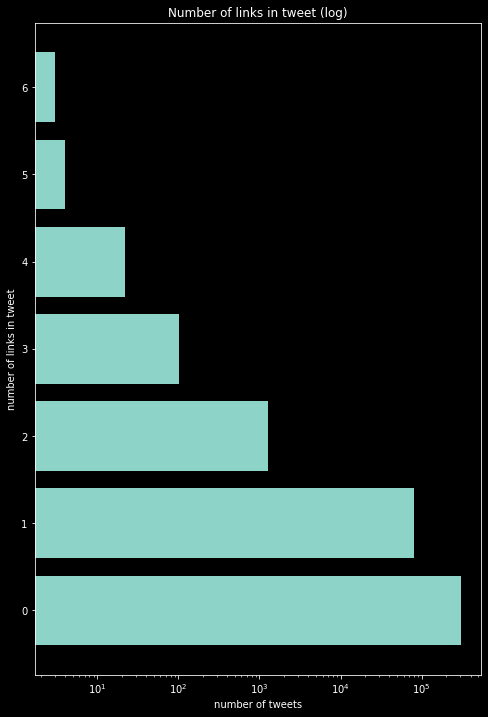

In [316]:
plt.figure(figsize = (8,12))
plt.barh(width = filled_number, y = range(0,7), log = True)
plt.title('Number of links in tweet (log)')
plt.xlabel('number of tweets')
plt.ylabel('number of links in tweet');

In [317]:
# get all the urls in a flat list.
all_url_list = list(np.concatenate(just_the_urls_list))

In [318]:
#make that list a series so we can call value_counts easily.
all_url_list_series = pd.Series(all_url_list)
all_url_list_series

0                            https://wordle.danielfrg.com/
1          https://wordle.danielfrg.com/ciencia/index.html
2          https://wordle.danielfrg.com/ciencia/index.html
3                          https://wordle.mega-yadoran.jp/
4                            https://wordle.danielfrg.com/
                               ...                        
83821    https://twitter.com/scottiestar/status/1521794...
83822                        https://wordle.danielfrg.com/
83823                              https://wordle.louan.me
83824                      https://wordle.mega-yadoran.jp/
83825                        https://wordle.danielfrg.com/
Length: 83826, dtype: object

In [319]:
url_counts = all_url_list_series.value_counts()

<BarContainer object of 30 artists>

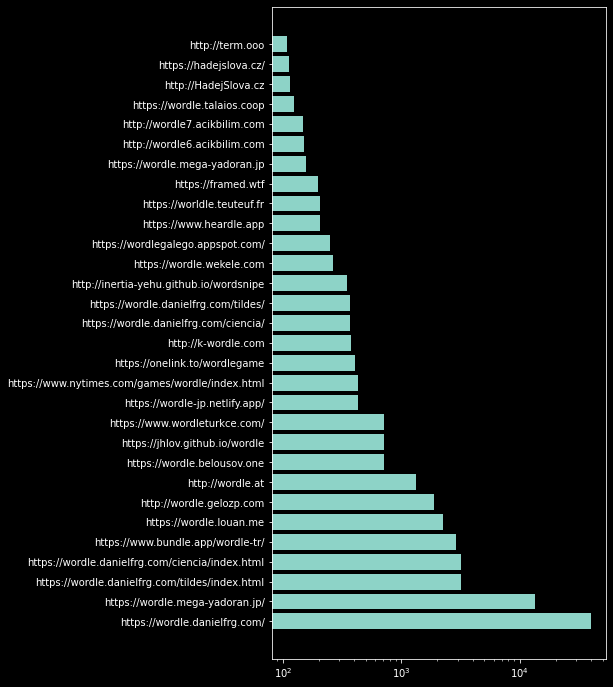

In [320]:
number_urls_to_plot = 30

plt.figure(figsize = (6,12))
plt.barh(width = url_counts[:number_urls_to_plot],
         y = url_counts[:number_urls_to_plot].index,
         log = True)

Most of these are foreign language alternatives. Some are different games based on the original (Pokemon, Heardle, Framed, Worldle).
- [wordle.danielfrg.com](wordle.danielfrg.com) is a Spanish language game
- [wordle.mega-yadoran.jp](https://wordle.mega-yadoran.jp/) is the Japanese language Pokemon Wordle
- [www.bundle.app/wordle-tr](http://www.bundle.app/wordle-tr) is Turkish
- [wordle.louan.me](https://wordle.louan.me) Le Mot - Wordle en français
- [wordle.gelozp.com](https://wordle.gelozp.com) Wordle CAT (Catalan)
- [wordle.at](http://wordle.at) is German (.at is for austria)
- [wordleturkce.com](http://www.wordleturkce.com/) is a(nother? or not?) Turkish variant.
- [https://jhlov.github.io/wordle/#/](https://jhlov.github.io/wordle/#/) Korean
- [belousov.one](https://wordle.belousov.one/) Russian
- [https://wordle-jp.netlify.app/](https://wordle-jp.netlify.app/) Japanese
- [nytimes.com](https://www.nytimes.com/games/wordle/index.html) The actual real New York Times Wordle page!
- [onelink.to](onelink.to/wordlegame) This is a link to [a google play app](https://play.google.com/store/apps/details?id=io.digitalsnacks.wordchallenge) that seems to be a wordle clone. Onelink appears to be a redirection service.
- The next two are danielfrg/Spanish language topic specified with tildes and science words.
- [k-wordle.com](k-wordle.com) Another Korean site
- [inertia-yehu.github.io/wordsnipe](inertia-yehu.github.io/wordsnipe)
- [Wordle Galego](https://wordlegalego.appspot.com/) Wordle Galego in Galician
- [Wordle Wekele](https://wordle.wekele.com/) Wordle in many languages
- [Worldle](https://worldle.teuteuf.fr/) "Worldle" Wordle variant based on country identification with shape and distance
- [Heardle](https://www.heardle.app) Heardle --- identifying a pop song based on the introduction
- [Framed](https://framed.wtf) Framed --- identifying a film based on screenshots

The presence of one of these is probably a good identifier of the tweet NOT representing a legit Wordle game.

In [321]:
tudf.columns

Index(['conversation_id', 'reply_settings', 'lang', 'possibly_sensitive',
       'source', 'text', 'context_annotations', 'author_id', 'created_at',
       'referenced_tweets', 'in_reply_to_user_id', 'attachments', 'geo',
       'withheld_tweet', 'name', 'public_metrics_user', 'url', 'description',
       'profile_image_url', 'location', 'protected', 'username', 'verified',
       'entities_user', 'pinned_tweet_id', 'withheld_user',
       'entities_tweeturls', 'entities_tweetmentions',
       'entities_tweethashtags', 'entities_tweetannotations',
       'entities_tweetcashtags', 'public_metrics_tweetretweet_count',
       'public_metrics_tweetreply_count', 'public_metrics_tweetlike_count',
       'public_metrics_tweetquote_count', 'game', 'win', 'is_poke'],
      dtype='object')

# Description

In [322]:
# how many user descriptions are filled?
tudf['user_has_description'] = tudf['description'] != 0
tudf['user_has_description'].value_counts('norm'), tudf['user_has_description'].value_counts()

(True     0.844055
 False    0.155945
 Name: user_has_description, dtype: float64,
 True     326191
 False     60266
 Name: user_has_description, dtype: int64)

77758 of the tweets are by users with descriptions. This is about 32% of the tweets.

In [323]:
tudf['url'].where(tudf['url']!=0).dropna().head(49)

1520127509051944961                           
1520127524377972737    https://t.co/OqVqYWdqMx
1520127566845149185                           
1520127583047852032                           
1520127597388128261                           
1520127651951882241                           
1520127652975321088    https://t.co/TOovGMTisZ
1520127659266686976                           
1520127671346159616                           
1520127676912123910    https://t.co/fk1uSjIp9x
1520127682624643072    https://t.co/CshKFa39ld
1520127687997591552                           
1520127745497473026                           
1520127766221713408                           
1520127766699683845                           
1520127789420081152                           
1520127805169848327                           
1520127834492076033    https://t.co/9Z6Tww1Dxj
1520127851294507011    https://t.co/esZTtDusqa
1520127854415167489    https://t.co/L4fbhZ669O
1520127882223550465    https://t.co/B8Q8PJtsI1
1520127899453

# Missing user data

Unfortunately, lots of the gathered user data just doesn't seem to pair appropriately with the tweet data. There are user IDs (both in the index and the Unnamed: 0 column that were merged, before the "fix" was done) that appear in a saved `users_xx.csv` but not in the corresponding tweet data, and vice versa.

In [324]:
user_id_list = list(users.index.astype(np.int64))

In [325]:
%%time
#how many "author_ids" are not in the user data?
user_id_list = list(users.index.astype(np.int64))
tudf['author_id'][::10].astype(np.int64).apply(lambda this_id: this_id in user_id_list).sum()

Wall time: 25 s


32645

In [326]:
len(tudf)

386457



This first run may not work well due to lots of zero-differences since the last tweet. To fix this ahead, take an average of times since last tweet to get a positive number rather than zero. for 1/(time since last tweet)

In [327]:
tudf['created_at'] = pd.to_datetime(tudf['created_at'])

In [328]:
tudf.sort_values(by = 'created_at', inplace= True)

In [329]:
tudf['created_at'].dtype

datetime64[ns, UTC]

In [330]:
# Not sure why ths is needed
tudf['wordle_tweet_number'] = range(len(tudf))

In [331]:
# create a list of ones to easily perform multiplicative inversion
tudf['ones'] = np.ones(len(tudf))

In [332]:
# latest and earliest tweet dates have already been grabbed
print(f'Tweets were gathered from\n{earliest} to\n{latest}, spanning\n{timespan}.')

Tweets were gathered from
2022-04-29 19:46:55+00:00 to
2022-05-05 21:59:57+00:00, spanning
6 days 02:13:02.


In [333]:
# create a column giving the timedelta since the last tweet.
tudf.sort_values(by = 'created_at', inplace= True)
tudf['time_since_last_tweet'] = tudf['created_at'].diff()
# turn timedeltas into simple seconds.
tudf['time_since_last_tweet'] = tudf['time_since_last_tweet'].apply(lambda this_timedelta: this_timedelta.total_seconds())

# create a column 
tudf['wordle_tweet_rate'] = tudf['ones']/tudf['time_since_last_tweet']

In [334]:
tudf['time_since_last_tweet']

1520127509051944961     NaN
1520127524377972737     4.0
1520127566845149185    10.0
1520127576676704256     2.0
1520127578593726464     0.0
                       ... 
1522335287988346882     7.0
1522335296007847937     2.0
1522335298574852103     1.0
1522335308712497153     2.0
1522335315381395456     2.0
Name: time_since_last_tweet, Length: 386457, dtype: float64

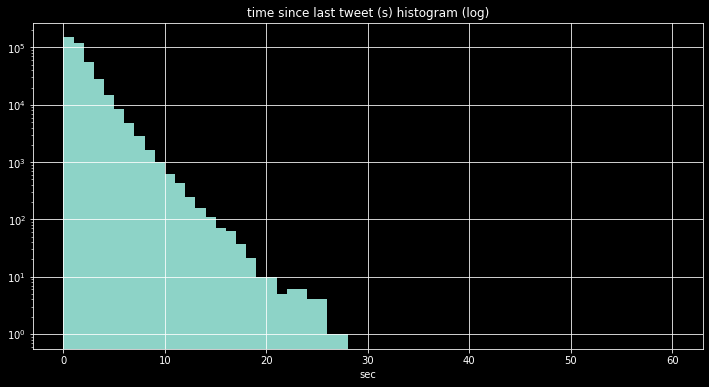

In [335]:
tudf[tudf['time_since_last_tweet'] < 60]['time_since_last_tweet'].hist(bins = range(61), log = True, figsize = (12,6))
plt.title( 'time since last tweet (s) histogram (log)' );
plt.xlabel('sec');

Text(0.5, 0, 'sec')

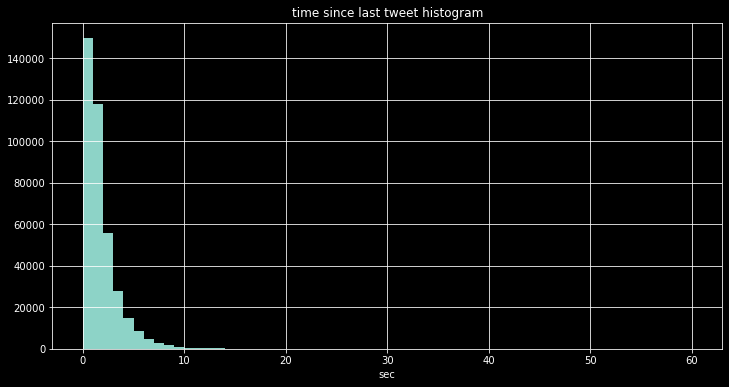

In [336]:
tudf[tudf['time_since_last_tweet'] < 60]['time_since_last_tweet'].hist(bins = range(61), log = False, figsize = (12,6))
plt.title( 'time since last tweet histogram' );
plt.xlabel('sec')

In [337]:
#play with picking out the weird times.
tudf[tudf['created_at'] > tudf.iloc[100000]['created_at']]

,conversation_id,reply_settings,lang,possibly_sensitive,source,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld_tweet,name,public_metrics_user,url,description,profile_image_url,location,protected,username,verified,entities_user,pinned_tweet_id,withheld_user,entities_tweeturls,entities_tweetmentions,entities_tweethashtags,entities_tweetannotations,entities_tweetcashtags,public_metrics_tweetretweet_count,public_metrics_tweetreply_count,public_metrics_tweetlike_count,public_metrics_tweetquote_count,game,win,is_poke,user_has_description,wordle_tweet_number,ones,time_since_last_tweet,wordle_tweet_rate
1520827917109915649,1520827917109915649,everyone,ja,False,Tweetlogix,2回目で当てたかった\n\nWordle 317 3/6\n\n🟨⬜🟨⬜🟨\n🟨🟨⬜⬜🟨\n...,"[{'domain': {'id': '30', 'name': 'Entities [En...",15963257,2022-05-01 18:10:05+00:00,[],0.0,{},{},{},にゃい,"{'followers_count': 925, 'following_count': 87...",https://t.co/qJaHtOp5Oy,コスメと文具と攻殻に反応します。 基本は体調不良です。 気づけばあのチビッコもなんと13歳。...,https://pbs.twimg.com/profile_images/124500815...,,False,nyaism,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",0.000000e+00,{},NaN,NaN,NaN,NaN,NaN,0,0,0,0,101011100122222,True,False,True,100001,1.0,1.0,1.000000
1520827920561807364,1520827920561807364,everyone,en,False,Twitter for iPhone,Wordle 317 4/6\n\n⬛⬛⬛🟨🟨\n⬛⬛⬛⬛⬛\n⬛🟨⬛⬛🟩\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",1324153288825032704,2022-05-01 18:10:06+00:00,[],0.0,{},{},{},mistressfoxy🦊,"{'followers_count': 2532, 'following_count': 9...",,"FEMDOM | FINDOM | Sissification sane, safe & c...",https://pbs.twimg.com/profile_images/134970088...,,False,mistressfoxy1,False,{},1.479133e+18,{},NaN,NaN,NaN,NaN,NaN,0,0,0,0,00011000000100222222,True,False,True,100002,1.0,1.0,1.000000
1520827921979518977,1520827921979518977,everyone,en,False,Twitter for Android,Wordle (ES) #115 3/6\n\n🟩⬜⬜⬜🟨\n🟩⬜⬜🟨⬜\n🟩🟩🟩🟩🟩\n...,"[{'domain': {'id': '30', 'name': 'Entities [En...",2835373809,2022-05-01 18:10:06+00:00,[],0.0,{},{},{},G҈ a҈ b҈ y҈ G҈ a҈ b҈ y҈,"{'followers_count': 421, 'following_count': 36...",,"Adoro el invierno ☃ ❄️\r\n⚖️La diplomacia, te ...",https://pbs.twimg.com/profile_images/152181345...,"Merlo, Buenos Aires",False,gabyizq07,False,{},0.000000e+00,{},"[{'start': 42, 'end': 65, 'url': 'https://t.co...",NaN,NaN,NaN,NaN,0,0,0,0,200012001022222,True,False,True,100003,1.0,0.0,inf
1520827932045885440,1520827932045885440,everyone,en,False,Twitter for Android,Wordle 316 5/6\n\n⬜🟩⬜⬜⬜\n🟨🟩⬜⬜⬜\n⬜🟩🟩⬜⬜\n🟩🟩🟩⬜⬜\n...,"[{'domain': {'id': '30', 'name': 'Entities [En...",86948703,2022-05-01 18:10:09+00:00,[],0.0,{},{},{},Vintage10,"{'followers_count': 50, 'following_count': 393...",,"Indian, Rationalist, Atheist\r\nLoves History ...",https://pbs.twimg.com/profile_images/116241151...,Maharashtra,False,VinayT10,False,{},0.000000e+00,{},NaN,NaN,NaN,NaN,NaN,0,0,0,0,0200012000022002220022222,True,False,True,100004,1.0,3.0,0.333333
1520827951981416449,1481275686686011392,everyone,en,False,Twitter for Android,Wordle 316 5/6\n\n⬛⬛⬛⬛⬛\n⬛🟩⬛⬛⬛\n⬛🟩🟨⬛⬛\n⬛🟩🟩🟨⬛\n...,"[{'domain': {'id': '30', 'name': 'Entities [En...",56433208,2022-05-01 18:10:14+00:00,"[{'type': 'replied_to', 'id': '152026240988945...",56433208.0,{},{},{},Keyye,"{'followers_count': 91, 'following_count': 90,...",,I must confess I was drawn to the ocean. I th...,https://pbs.twimg.com/profile_images/347806925...,The Ocean,False,keyye,False,{},0.000000e+00,{},NaN,NaN,NaN,NaN,NaN,0,1,0,0,0000002000021000221022222,True,False,True,100005,1.0,5.0,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522335287988346882,1522335287988346882,everyone,en,False,Twitter for Android,Wordle 320 3/6\n\n🟩🟩⬜⬜🟨\n🟩🟩⬜🟩⬜\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",1178989169416298497,2022-05-05 21:59:50+00:00,[],0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.000000e+00,0,NaN,NaN,NaN,NaN,NaN,0,0,4,0,NaN,False,False,False,38

<Figure size 864x432 with 0 Axes>

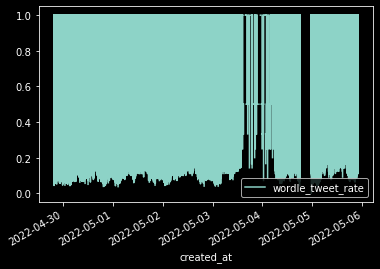

In [338]:
plt.figure(figsize = (12,6))

tudf.plot('created_at','wordle_tweet_rate');

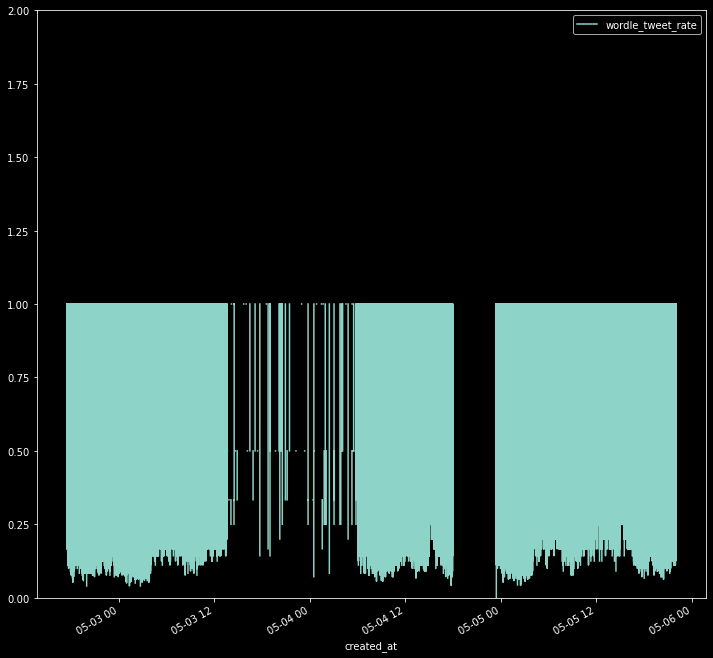

In [339]:
tudf[tudf['created_at'] > tudf.iloc[160000]['created_at']].plot('created_at', 'wordle_tweet_rate', figsize = (12,12), ylim=(0,2));

<AxesSubplot:>

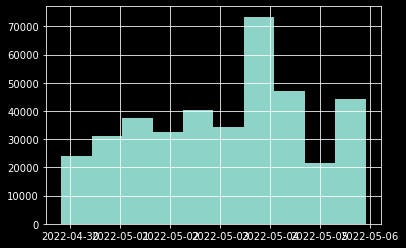

In [340]:
tudf['created_at'].hist()

~~What happened in there? why are there so few tweets in those spans? The end of 5-04 I believe is simply a time of no gathered tweets. The time at the afternoon of 5-03 into morning of 5-04 still has values, just much lower. Could I have adding in extra copies of a tweet, dropping this rate to zero? Why is it capping at 1? Is this a /0 problem?~~

Tweets from late 5/03 to early 5/04. 

In [341]:
tudf

,conversation_id,reply_settings,lang,possibly_sensitive,source,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld_tweet,name,public_metrics_user,url,description,profile_image_url,location,protected,username,verified,entities_user,pinned_tweet_id,withheld_user,entities_tweeturls,entities_tweetmentions,entities_tweethashtags,entities_tweetannotations,entities_tweetcashtags,public_metrics_tweetretweet_count,public_metrics_tweetreply_count,public_metrics_tweetlike_count,public_metrics_tweetquote_count,game,win,is_poke,user_has_description,wordle_tweet_number,ones,time_since_last_tweet,wordle_tweet_rate
1520127509051944961,1520127509051944961,everyone,en,False,Twitter Web App,Wordle 314 4/6\n\n🟩⬛🟩🟨🟨\n🟩🟩🟩⬛🟨\n🟩🟩🟩🟩⬛\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",489622686,2022-04-29 19:46:55+00:00,[],0.0,{},{},{},♔･ﾟ✧Lᴏɢɢʏ･ﾟ✧ ♔,"{'followers_count': 9322, 'following_count': 1...",,"*:･ﾟ I lσνε @arianagrande , & @blackpink *:･ﾟ\...",https://pbs.twimg.com/profile_images/148007682...,vote lisa and rose😃🤗,False,loggyf2,False,"{'description': {'mentions': [{'start': 12, 'e...",6.956076e+17,{},NaN,NaN,NaN,NaN,NaN,0,0,2,0,NaN,False,False,True,0,1.0,NaN,NaN
1520127524377972737,1520127524377972737,everyone,en,False,Twitter for iPhone,😈💅😈💅😈💅\n\nWordle 314 2/6\n\n🟩⬛🟩🟨🟨\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",25239815,2022-04-29 19:46:59+00:00,[],0.0,{},{},{},Carly Garza | Commissions Open,"{'followers_count': 714, 'following_count': 95...",https://t.co/OqVqYWdqMx,she/they | queer multidisciplinary artist | Cu...,https://pbs.twimg.com/profile_images/145323946...,"Texas, USA",False,carlyagarza,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",1.468007e+18,{},NaN,NaN,NaN,NaN,NaN,0,1,2,0,NaN,False,False,True,1,1.0,4.0,0.250000
1520127566845149185,1520127566845149185,everyone,ja,False,Twitter Web App,Wordle 315 4/6\n\n⬜⬜🟨⬜⬜\n⬜⬜⬜🟨⬜\n⬜⬜⬜⬜⬜\n🟩🟩🟩🟩🟩\n...,"[{'domain': {'id': '30', 'name': 'Entities [En...",176229015,2022-04-29 19:47:09+00:00,[],0.0,{},{},{},折笠美冬,"{'followers_count': 94, 'following_count': 253...",,基本的にゲームのことばかり呟いてます。\r\n呟きの内容に画像レスを含むことがあるので、不快...,https://pbs.twimg.com/profile_images/122182835...,まいづるちほー,False,orichan5,False,{},0.000000e+00,{},NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,False,False,True,2,1.0,10.0,0.100000
1520127576676704256,1520127576676704256,everyone,en,False,Twitter for iPhone,this is the best I've done so far \n\nWordle 3...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1471956208181514243,2022-04-29 19:47:11+00:00,[],0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.000000e+00,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,False,False,False,3,1.0,2.0,0.500000
1520127578593726464,1520127578593726464,everyone,ja,False,Twitter for iPhone,最近はめっきり知らない単語ばっかり。\n\nWordle 315 5/6\n\n⬛⬛⬛🟨⬛\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1220315666508464130,2022-04-29 19:47:11+00:00,[],0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.000000e+00,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,False,False,False,4,1.0,0.0,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522335287988346882,1522335287988346882,everyone,en,False,Twitter for Android,Wordle 320 3/6\n\n🟩🟩⬜⬜🟨\n🟩🟩⬜🟩⬜\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",1178989169416298497,2022-05-05 21:59:50+00:00,[],0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.000000e+00,0,NaN,NaN,NaN,NaN,NaN,0,0,4,0,NaN,False,False,False,386452,1.0,7.0,0.142857
1522335296007847937,1522335296007847937,everyone,en,False,Twitter for iPhone,Wordle 320 5/6\n\n⬜🟨⬜⬜🟨\n🟩⬜🟨⬜⬜\n🟩🟩⬜🟩🟩\n🟩🟩⬜🟩🟩\n...,"[{'domain': {'id': '30', 'name': 'Entities [En...",3031584784,2022-05-05 21:59:52+00:00,[],0.0,{},{},{},Jaki Mc,"{'followers_count': 11, 'following_count': 27,...",,"Daughter, sister, wife, mother, and friend! Lo...",https://pbs.twimg.com/profile_images/847574313...,United States,False,jaki_mc99,False,{},0.000000e+00,{},NaN,NaN,NaN,NaN,N

In [344]:
#rough times between tweets. rolling average of 60.
# since tweets aren't evenly spaced, more of the width of this plot applies to longer times between.
# but given slowly changing tweet rates, it's a good measure.
tudf['time_since_last_tweet_rolling_60'] = tudf['time_since_last_tweet'].rolling(60).mean()

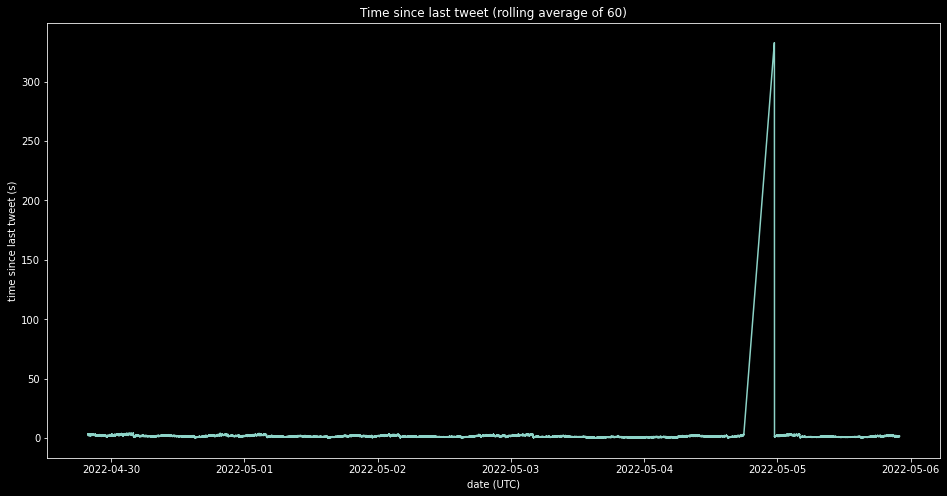

In [345]:
#plot times between all tweets
plt.figure(figsize = (16,8))
plt.plot(tudf['created_at'], tudf['time_since_last_tweet_rolling_60'])
plt.xlabel('date (UTC)')
plt.ylabel('time since last tweet (s)')
plt.title('Time since last tweet (rolling average of 60)');

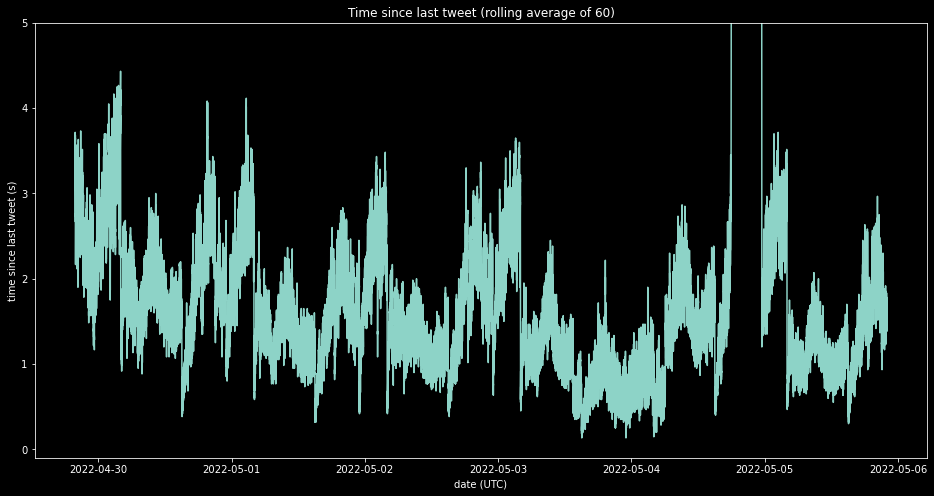

In [348]:
#plot times between all tweets ---- smaller y
plt.figure(figsize = (16,8))
plt.plot(tudf['created_at'], tudf['time_since_last_tweet_rolling_60'])
plt.xlabel('date (UTC)')
plt.ylabel('time since last tweet (s)')
plt.ylim(-.1,5)
plt.title('Time since last tweet (rolling average of 60)');

In [388]:
tudf[tudf['created_at']< datetime(2022, 5, 4, 17, 58, 0, 0, tzinfo = UTC)].sort_values(by = 'created_at', ascending = False)

,conversation_id,reply_settings,lang,possibly_sensitive,source,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld_tweet,name,public_metrics_user,url,description,profile_image_url,location,protected,username,verified,entities_user,pinned_tweet_id,withheld_user,entities_tweeturls,entities_tweetmentions,entities_tweethashtags,entities_tweetannotations,entities_tweetcashtags,public_metrics_tweetretweet_count,public_metrics_tweetreply_count,public_metrics_tweetlike_count,public_metrics_tweetquote_count,game,win,is_poke,user_has_description,wordle_tweet_number,ones,time_since_last_tweet,wordle_tweet_rate,time_since_last_tweet_rolling_60,time_since_last_tweet_rolling_600,tweet_rate_60,tweet_rate_600
1521911830817521664,1521911830817521664,everyone,en,False,Twitter for iPhone,Wordle 319 3/6\r\n\r\n🟨⬛⬛⬛⬛\r\n⬛⬛🟩⬛🟨\r\n🟩🟩🟩🟩🟩a...,"[{'domain': {'id': '30', 'name': 'Entities [En...",584425453,2022-05-04 17:57:10+00:00,[],0.0,{},{},{},.,"{'followers_count': 291, 'following_count': 26...",,One and done.,https://pbs.twimg.com/profile_images/150922502...,"Dallas, TX",False,TexasHammerrr,False,{},1.490016e+18,{},NaN,NaN,NaN,NaN,NaN,0,0,0,0,100000020122222,True,False,True,322779,1.0,0.0,inf,2.850000,2.411667,0.350877,0.414651
1521911829244440577,1521911829244440577,everyone,en,False,Twitter for Android,Wordle 320 4/6\r\n\r\n⬜⬜⬜⬜🟨\r\n⬜⬜⬜🟩🟩\r\n⬜🟩⬜🟩🟩\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",979964880878034944,2022-05-04 17:57:10+00:00,[],0.0,{},{},{},anima,"{'followers_count': 12, 'following_count': 179...",,,https://pbs.twimg.com/profile_images/980222581...,,False,imagineanima,False,{},0.000000e+00,{},NaN,NaN,NaN,NaN,NaN,0,0,0,0,00001000220202222222,True,False,True,322780,1.0,2.0,0.50,2.850000,2.413333,0.350877,0.414365
1521911819077505026,1521911819077505026,everyone,en,False,Twitter for Android,Wordle 319 3/6\r\n\r\n🟩🟨⬛⬛⬛\r\n🟩⬛🟨🟨⬛\r\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",1211847567614431232,2022-05-04 17:57:08+00:00,[],0.0,{},{},{},Wild,"{'followers_count': 32, 'following_count': 80,...",,LEFT is always right,https://pbs.twimg.com/profile_images/137949129...,,False,Wild83206947,False,{},0.000000e+00,{},NaN,NaN,NaN,NaN,NaN,0,0,0,0,210002011022222,True,False,True,322778,1.0,2.0,0.50,2.816667,2.413333,0.355030,0.414365
1521911810563190785,1521911810563190785,everyone,en,False,Twitter for iPhone,Wordle 319 4/6\r\n\r\n🟩⬛🟨⬛⬛\r\n🟩🟩🟩🟩⬛\r\n🟩🟩🟩🟩⬛\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1484236785932808195,2022-05-04 17:57:06+00:00,[],0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.000000e+00,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,20100222202222022222,True,False,False,322777,1.0,1.0,1.00,2.800000,2.410000,0.357143,0.414938
1521911808176451586,1521911808176451586,everyone,en,False,Twitter for iPhone,Wordle 320 6/6\r\n\r\n⬛⬛⬛🟩⬛\r\n⬛⬛⬛🟩⬛\r\n⬛🟩⬛🟩🟩\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",35214039,2022-05-04 17:57:05+00:00,[],0.0,{},{},{},Jerico Rañin,"{'followers_count': 373, 'following_count': 11...",https://t.co/4Z4CgwFFbx,,https://pbs.twimg.com/profile_images/151674968...,Republic of the Philippines,False,thejericoranin,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",0.000000e+00,{},NaN,NaN,NaN,NaN,NaN,0,0,0,0,000200002002022020220202222222,True,False,True,322776,1.0,1.0,1.00,2.816667,2.408333,0.355030,0.415225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520127578593726464,1520127578593726464,everyone,ja,False,Twitter for iPhone,最近はめっきり知らない単語ばっかり。\n\nWordle 315 5/6\n\n⬛⬛⬛🟨⬛\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1220315666508464130,2022-04-29 19:47:11+00:00,[],0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.000000e+00,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,False,False,False,4,1.0,0.0,inf,NaN,NaN,NaN,NaN
1520127576676704256,1520127576676704256,everyone,en,False,Twitter for iPhone,this is the best I've don

In [384]:
tudf[tudf['created_at']> datetime(2022, 5, 4, 23,26, 0 ,0, tzinfo =UTC)]

,conversation_id,reply_settings,lang,possibly_sensitive,source,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld_tweet,name,public_metrics_user,url,description,profile_image_url,location,protected,username,verified,entities_user,pinned_tweet_id,withheld_user,entities_tweeturls,entities_tweetmentions,entities_tweethashtags,entities_tweetannotations,entities_tweetcashtags,public_metrics_tweetretweet_count,public_metrics_tweetreply_count,public_metrics_tweetlike_count,public_metrics_tweetquote_count,game,win,is_poke,user_has_description,wordle_tweet_number,ones,time_since_last_tweet,wordle_tweet_rate,time_since_last_tweet_rolling_60,time_since_last_tweet_rolling_600,tweet_rate_60,tweet_rate_600
1521994876677672966,1521994876677672966,everyone,en,False,Twitter for Android,Wordle 320 2/6\n\n⬜🟨⬜🟩⬜\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",125443746,2022-05-04 23:27:10+00:00,[],0.0,{},{},{},Martin O' Connor,"{'followers_count': 80, 'following_count': 221...",,,https://pbs.twimg.com/profile_images/675596289...,,False,martincjoc,False,{},0.000000e+00,{},NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,False,False,True,322781,1.0,19800.0,0.000051,332.750000,35.410000,0.003005,0.028241
1521994883032039424,1521994883032039424,everyone,en,False,Twitter for iPhone,Wordle 320 6/6\n\n⬜⬜⬜🟩⬜\n⬜🟨⬜🟩⬜\n⬜🟨🟨🟩⬜\n🟩🟩⬜🟩🟩\n...,"[{'domain': {'id': '29', 'name': 'Events [Enti...",592259279,2022-05-04 23:27:12+00:00,[],0.0,{},{},{},Christian Dodd,"{'followers_count': 57, 'following_count': 121...",,Former cruise ship entertainment host. Dr Pepp...,https://pbs.twimg.com/profile_images/134787990...,United Kingdom,False,doddoneout,False,{},1.241151e+18,{},NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,False,False,True,322782,1.0,2.0,0.500000,332.766667,35.411667,0.003005,0.028239
1521994886941413376,1521994886941413376,everyone,en,False,Twitter for Android,Wordle 320 4/6\n\n🟨⬛🟨⬛⬛\n⬛⬛🟨🟨🟨\n⬛🟩⬛🟩🟩\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",1348171206910873600,2022-05-04 23:27:13+00:00,[],0.0,{},{},{},Sam 😃,"{'followers_count': 592, 'following_count': 12...",,Equal is equal. \r\n\r\nEFC🖤❤,https://pbs.twimg.com/profile_images/134818135...,,False,equalisequal5,False,{},1.463028e+18,{},NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,False,False,True,322783,1.0,1.0,1.000000,332.766667,35.411667,0.003005,0.028239
1521994898974588929,1521994898974588929,everyone,en,False,TweetDeck,properly rubbish\n\nWordle 320 X/6*\n\n⬛🟨⬛🟩⬛\n...,"[{'domain': {'id': '30', 'name': 'Entities [En...",626288465,2022-05-04 23:27:15+00:00,[],0.0,{},{},{},Del-4Ri,"{'followers_count': 766, 'following_count': 75...",https://t.co/YYTzDBaNmL,"Mars images, science, 3D, software coding, pho...",https://pbs.twimg.com/profile_images/150602417...,Mars and south Hampshire.,False,WolfieSmiffed,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",1.521127e+18,{},NaN,NaN,NaN,NaN,NaN,0,1,1,1,NaN,False,False,True,322784,1.0,2.0,0.500000,332.716667,35.406667,0.003006,0.028243
1521994904523706368,1521994904523706368,everyone,en,False,Twitter for iPhone,Wordle 320 5/6\n\n⬛🟨🟨⬛⬛\n🟨🟨⬛⬛⬛\n⬛⬛⬛🟨🟩\n⬛🟩⬛🟩🟩\n...,"[{'domain': {'id': '30', 'name': 'Entities [En...",939561834,2022-05-04 23:27:17+00:00,[],0.0,{},{},{},amz,"{'followers_count': 331, 'following_count': 32...",,🏴󠁧󠁢󠁳󠁣󠁴󠁿|🇲🇾,https://pbs.twimg.com/profile_images/151604059...,Dundee,False,Amininnnn,False,{},1.492959e+18,{},NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,False,False,True,322785,1.0,2.0,0.500000,332.716667,35.408333,0.003006,0.028242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522335287988346882,1522335287988346882,everyone,en,False,Twitter for Android,Wordle 320 3/6\n\n🟩🟩⬜⬜🟨\n🟩🟩⬜🟩⬜\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",1178989169416298497,2022-05-05 21:59:50+00:00,[],0.0,{},{},{},0,0,0,0,0,0,0,0,0,0,0.000000e+00,0,NaN,NaN,NaN,NaN,NaN,0,0,4,0,NaN,False,F

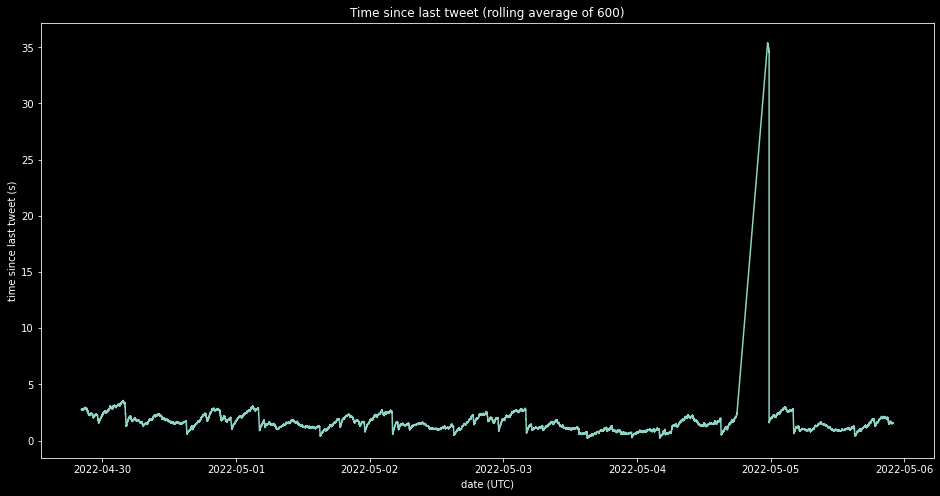

In [347]:
#make rolling 600 times
tudf['time_since_last_tweet_rolling_600'] = tudf['time_since_last_tweet'].rolling(600).mean()

#plot times between all tweets
plt.figure(figsize = (16,8))
plt.plot(tudf['created_at'], tudf['time_since_last_tweet_rolling_600'])
plt.xlabel('date (UTC)')
plt.ylabel('time since last tweet (s)')
plt.title('Time since last tweet (rolling average of 600)');

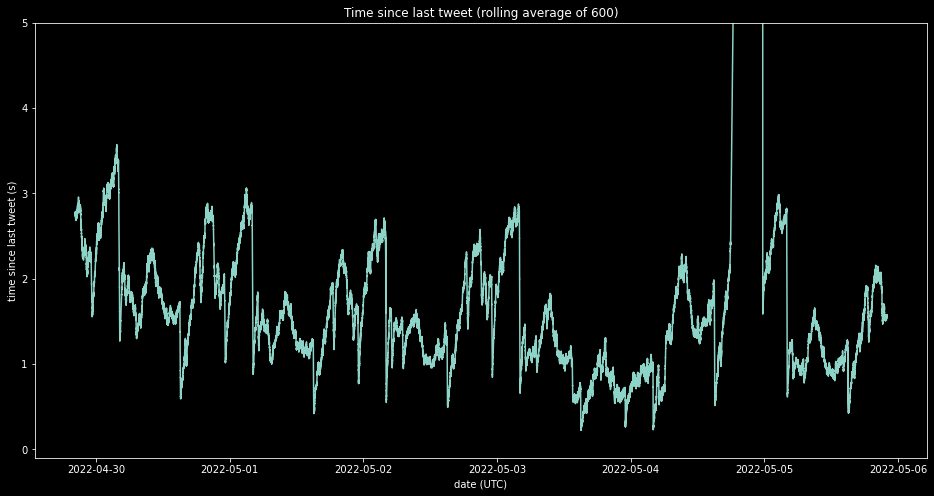

In [350]:
#plot times between all tweets at 600 rolling with tighter y

plt.figure(figsize = (16,8))
plt.plot(tudf['created_at'], tudf['time_since_last_tweet_rolling_600'])
plt.xlabel('date (UTC)')
plt.ylabel('time since last tweet (s)')
plt.ylim(-.1,5)
plt.title('Time since last tweet (rolling average of 600)');

---

Text(0, 0.5, 'tweets/sec')

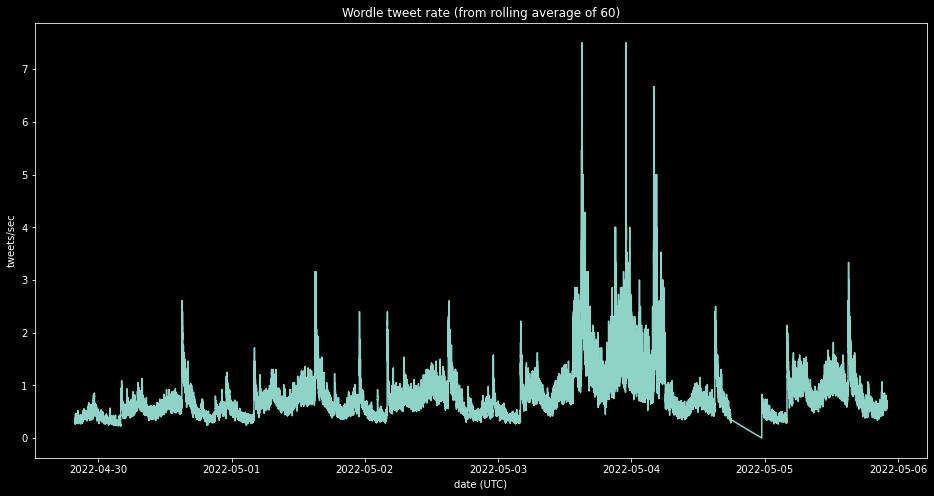

In [351]:
plt.figure(figsize=(16,8))
plt.plot(tudf['created_at'], tudf['ones']/tudf['time_since_last_tweet_rolling_60'])
plt.title("Wordle tweet rate (from rolling average of 60)")
plt.xlabel("date (UTC)")
plt.ylabel("tweets/sec")


In [352]:
#make special times for certain parts of the country

UTC = tz.gettz('UTC')

edt_offset = 4 # 4 am utc == midnight east coast usa. gmt -4
pdt_offset = 6 #6 am == midnight west coast usa. gmt -6
tokyo_offset = 15 # 3pm UTC == midnight japan, korea. gmt +9
turkey_offset = 21  # 9pm UTC == midnight turkey, israel. gmt +3
france_offset = 22 #10 pm UTC = midnight france, germany. gmt +2
canberra_offset = 14 # 2 pm UTC == midnight ACT eastern australia. GMT + 10

#more appropriately, should make tzinfo the corresponding type. but.
def midnight_datetime_may2(offset, tzinfo = UTC):
    midnight = datetime(2022, 5, 2, 0 + offset, 0, 0 ,tzinfo = tzinfo)
    return midnight

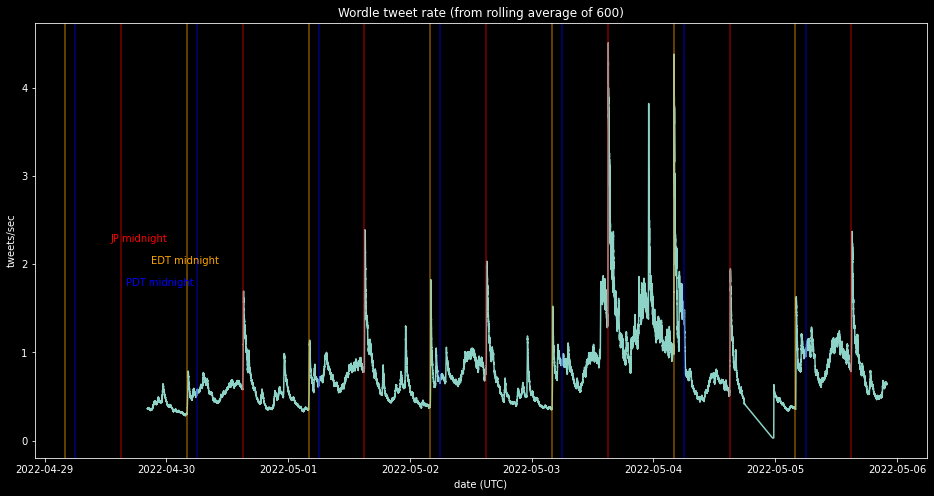

In [353]:
UTC = tz.gettz('UTC')
edt_offset = 4 # 4 am utc == midnight east coast usa. gmt -4
edt_text_position = datetime(2022, 4, 29, 21, 0, 0, tzinfo = UTC)
jp_text_position = datetime(2022, 4, 29, 13, 0, 0, tzinfo = UTC)
pdt_text_position = datetime(2022, 4, 29, 16, 0 ,0, tzinfo = UTC)

plt.figure(figsize=(16,8))
plt.plot(tudf['created_at'], tudf['ones']/tudf['time_since_last_tweet_rolling_600'])
plt.title("Wordle tweet rate (from rolling average of 600)")
plt.xlabel("date (UTC)")
plt.ylabel("tweets/sec")
plt.text(edt_text_position, 2, "EDT midnight", color = 'orange')
plt.text(jp_text_position, 2.25, "JP midnight", color = 'r')
plt.text(pdt_text_position, 1.75, "PDT midnight", color = 'b')
for day_offset in range(-2,5):
    plt.axvline(dt.timedelta(days=day_offset)+datetime(2022, 5, 1, 0 + pdt_offset, 0 , 0, tzinfo = UTC), color = colors.to_rgba('b', 0.5))
    plt.axvline(dt.timedelta(days=day_offset)+datetime(2022, 5, 1, 0 + tokyo_offset, 0 ,0 ,tzinfo = UTC), color = colors.to_rgba('r', 0.5))
    plt.axvline(dt.timedelta(days=day_offset)+datetime(2022, 5, 1, 0 + edt_offset, 0, 0 ,tzinfo = UTC), color = colors.to_rgba('orange',0.5))

In [354]:
tudf['tweet_rate_60'] = tudf['ones']/tudf['time_since_last_tweet_rolling_60']
tudf['tweet_rate_600'] = tudf['ones']/tudf['time_since_last_tweet_rolling_600']

In [ ]:
# #do the same with rolling averages.
# plt.figure(figsize = (12,6))
# #make a line at UTC = 9pm, which is 6pm EDT.
# for fivepeeem in tudf[tudf['created_at'].apply(lambda x: x.hour == 21)]['created_at']:
#     plt.axvline(fivepeeem)
# #make a line at UTC = 4pm, which is noon EDT.
# for lunchtime in tudf[tudf['created_at'].apply(lambda x: x.hour == 16)]['created_at']:
#     plt.axvline(lunchtime, color = 'orange')    
# plt.plot(tudf['created_at'],tudf['time_since_last_tweet_mean60'])
# plt.ylim(0,5)
# plt.title("time since last tweet (rolling average --- 60 tweets)")
# plt.xlabel("date")
# plt.ylabel("average wait time (s)")

In [ ]:
# #plot rolling averages in one day.
# plt.figure(figsize = (12,6))
# plt.xlim(datetime(2022, 5,2,0,0,0, tzinfo = UTC), datetime(2022, 5,3,0,0,0, tzinfo = UTC))
# plt.plot(tudf['created_at'],tudf['time_since_last_tweet_mean60'])
# plt.ylim(0,5)
# plt.title("time since last tweet (rolling average --- 60 tweets)")
# plt.xlabel("date")
# plt.ylabel("average wait time (s)")

In [ ]:
# #plot the inverse. This is tweet frequency.

# UTC = tz.gettz('UTC')

# edt_offset = 4 # 4 am utc == midnight east coast usa. gmt -4
# pdt_offset = 6 #6 am == midnight west coast usa. gmt -6
# tokyo_offset = 15 # 3pm UTC == midnight japan, korea. gmt +9
# turkey_offset = 21  # 9pm UTC == midnight turkey, israel. gmt +3
# france_offset = 22 #10 pm UTC = midnight france, germany. gmt +2
# canberra_offset = 14 # 2 pm UTC == midnight ACT eastern australia. GMT + 10

# #more appropriately, should make tzinfo the corresponding type. but.
# def midnight_datetime_may2(offset, tzinfo = UTC):
#     midnight = datetime(2022, 5, 2, 0 + offset, 0, 0 ,tzinfo = tzinfo)
#     return midnight

# edt_midnight = midnight_datetime_may2(edt_offset)
# tokyo_midnight =  midnight_datetime_may2(tokyo_offset)
# turkey_midnight =  midnight_datetime_may2(turkey_offset)
# france_midnight = midnight_datetime_may2(france_offset)


# plt.figure(figsize = (12,6))
# plt.xlim(datetime(2022, 5,2,0,0,0, tzinfo = UTC), datetime(2022, 5,3,0,0,0, tzinfo = UTC))
# plt.plot(tudf['created_at'], tudf['ones']/tudf['time_since_last_tweet_mean60'])
# plt.ylim(0,3)
# plt.title("Wordle tweet frequency on May 2, 2022 (UTC) and midnights")
# plt.xlabel("date (UTC)")
# plt.ylabel("Frequency (hz)")

# plt.axvline(edt_midnight,  color = colors.to_rgba('orange',0.5))
# plt.axvline(tokyo_midnight, color = colors.to_rgba('orange',0.5))
# plt.axvline(turkey_midnight,  color = colors.to_rgba('orange',0.5))
# plt.axvline(france_midnight,  color = colors.to_rgba('orange',0.5))

# plt.text(edt_midnight, 2.5, "   EDT", color = 'orange')
# plt.text(tokyo_midnight, 2.5, "     Japan\n     Korea", color = 'orange')
# plt.text(turkey_midnight, 2.5, "     Turkey\n     Israel ", color = 'orange')
# plt.text(france_midnight, 2., "     France\n     Germany\n     Spain", color = 'orange')

In [ ]:
#This is UTC, leading east coast USA by four hours. Some of these features definitely repeat.

# making the time series regular

### traces

The time data is irregular. Follow [this stack overflow](https://stackoverflow.com/questions/25234941/python-regularise-irregular-time-series-with-linear-interpolation) answer to use `traces` to make a regular time series.

> You can do this with traces. First, create a TimeSeries with your irregular measurements like you would a dictionary:
```python
    ts = traces.TimeSeries([
    (datetime(1992, 8, 27, 7, 46, 48), 28.0),
    (datetime(1992, 8, 27, 8, 0, 48), 28.2),
    ...
    (datetime(1992, 8, 27, 9, 3, 48), 30.0),
])
```

Then regularize using the sample method:

```python
    ts.sample(
    sampling_period=timedelta(minutes=15),
    start=datetime(1992, 8, 27, 8),
    end=datetime(1992, 8, 27, 9),
    interpolate='linear',
```
> This results in the following regularized version, where the gray dots are the original data and the orange is the regularized version with linear interpolation.

In [ ]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install traces

[traces is pretty cool](https://traces.readthedocs.io/en/latest/#:~:text=The%20main%20object%20in%20traces,%3A45%3A56am%2C%20etc.&text=What%20if%20you%20want%20to,one%20of%20the%20measurement%20times.). It makes TimeSeries objects that interpolate between the data points by default. You can put any datetime in.

In [ ]:
tudf['created_at']

In [187]:
import traces

from datetime import datetime

from dateutil import tz

In [188]:
#make a time series of all tweets rate, rolling 600
ts = traces.TimeSeries(
        zip( tudf['created_at'],
            tudf['ones']/tudf['time_since_last_tweet_rolling_600']
        )
    )

tudf.iloc[0]['created_at']

KeyError: 'time_since_last_tweet_rolling_600'

In [189]:
#Give the time series tz awareness when making values.

UTC = tz.gettz('UTC')
ts[datetime(2042, 2, 1,  6,  0,  0, tzinfo = UTC)]

NameError: name 'ts' is not defined

In [190]:
#make a histogram of the time series.
histogram = ts.distribution(
start=tudf['created_at'].min(),
end=tudf['created_at'].max()
)
histogram.median()

NameError: name 'ts' is not defined

### resampling with pandas

In [355]:
###### make an evenly spaced timeseries without traces... just pandas
resample_rule = '60S'
#once a minute resampling
resampled_tudf = tudf[['tweet_rate_60', 'tweet_rate_600','time_since_last_tweet_rolling_60','time_since_last_tweet_rolling_600','created_at']].resample(resample_rule,  on ='created_at')

<AxesSubplot:xlabel='created_at'>

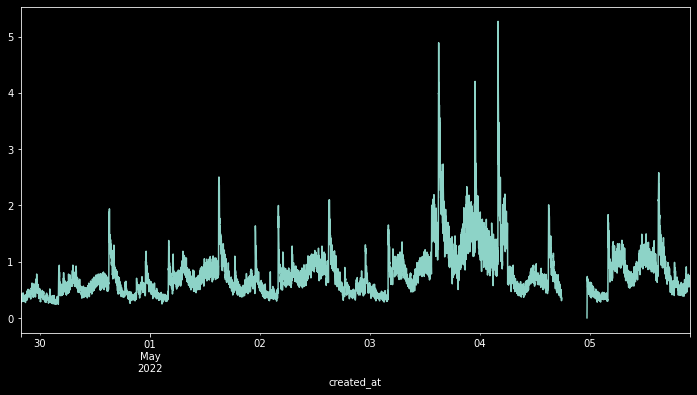

In [356]:
#plot the resampled tweet rate
resampled_tudf.mean()['tweet_rate_60'].plot(figsize=(12,6))


## seasonal decomposing


In [357]:
# just look at the resampled df
resampled_tudf.mean().dropna()

,tweet_rate_60,tweet_rate_600,time_since_last_tweet_rolling_60,time_since_last_tweet_rolling_600
created_at,,,,
2022-04-29 20:14:00+00:00,0.385661,0.359842,2.596000,2.779000
2022-04-29 20:15:00+00:00,0.401913,0.361531,2.492982,2.766053
2022-04-29 20:16:00+00:00,0.377319,0.363095,2.651754,2.754123
2022-04-29 20:17:00+00:00,0.338322,0.363912,2.962281,2.747982
2022-04-29 20:18:00+00:00,0.307473,0.364595,3.257778,2.742889
...,...,...,...,...
2022-05-05 21:55:00+00:00,0.688653,0.655620,1.453333,1.525292
2022-05-05 21:56:00+00:00,0.665937,0.649971,1.504687,1.538542
2022-05-05 21:57:00+00:00,0.573858,0.643458,1.744298,1.554123


### Decompose by day --- tweet rate 600

In [361]:
from statsmodels.tsa.seasonal import seasonal_decompose





decomp_date_end = datetime(2022, 5, 4, 12, 0, 0, tzinfo = UTC)

decomp = seasonal_decompose(resampled_tudf['tweet_rate_600'].mean().dropna(), period = 60*24)

# plt.rc('figure', figsize(12,6))
# decomp.plot();



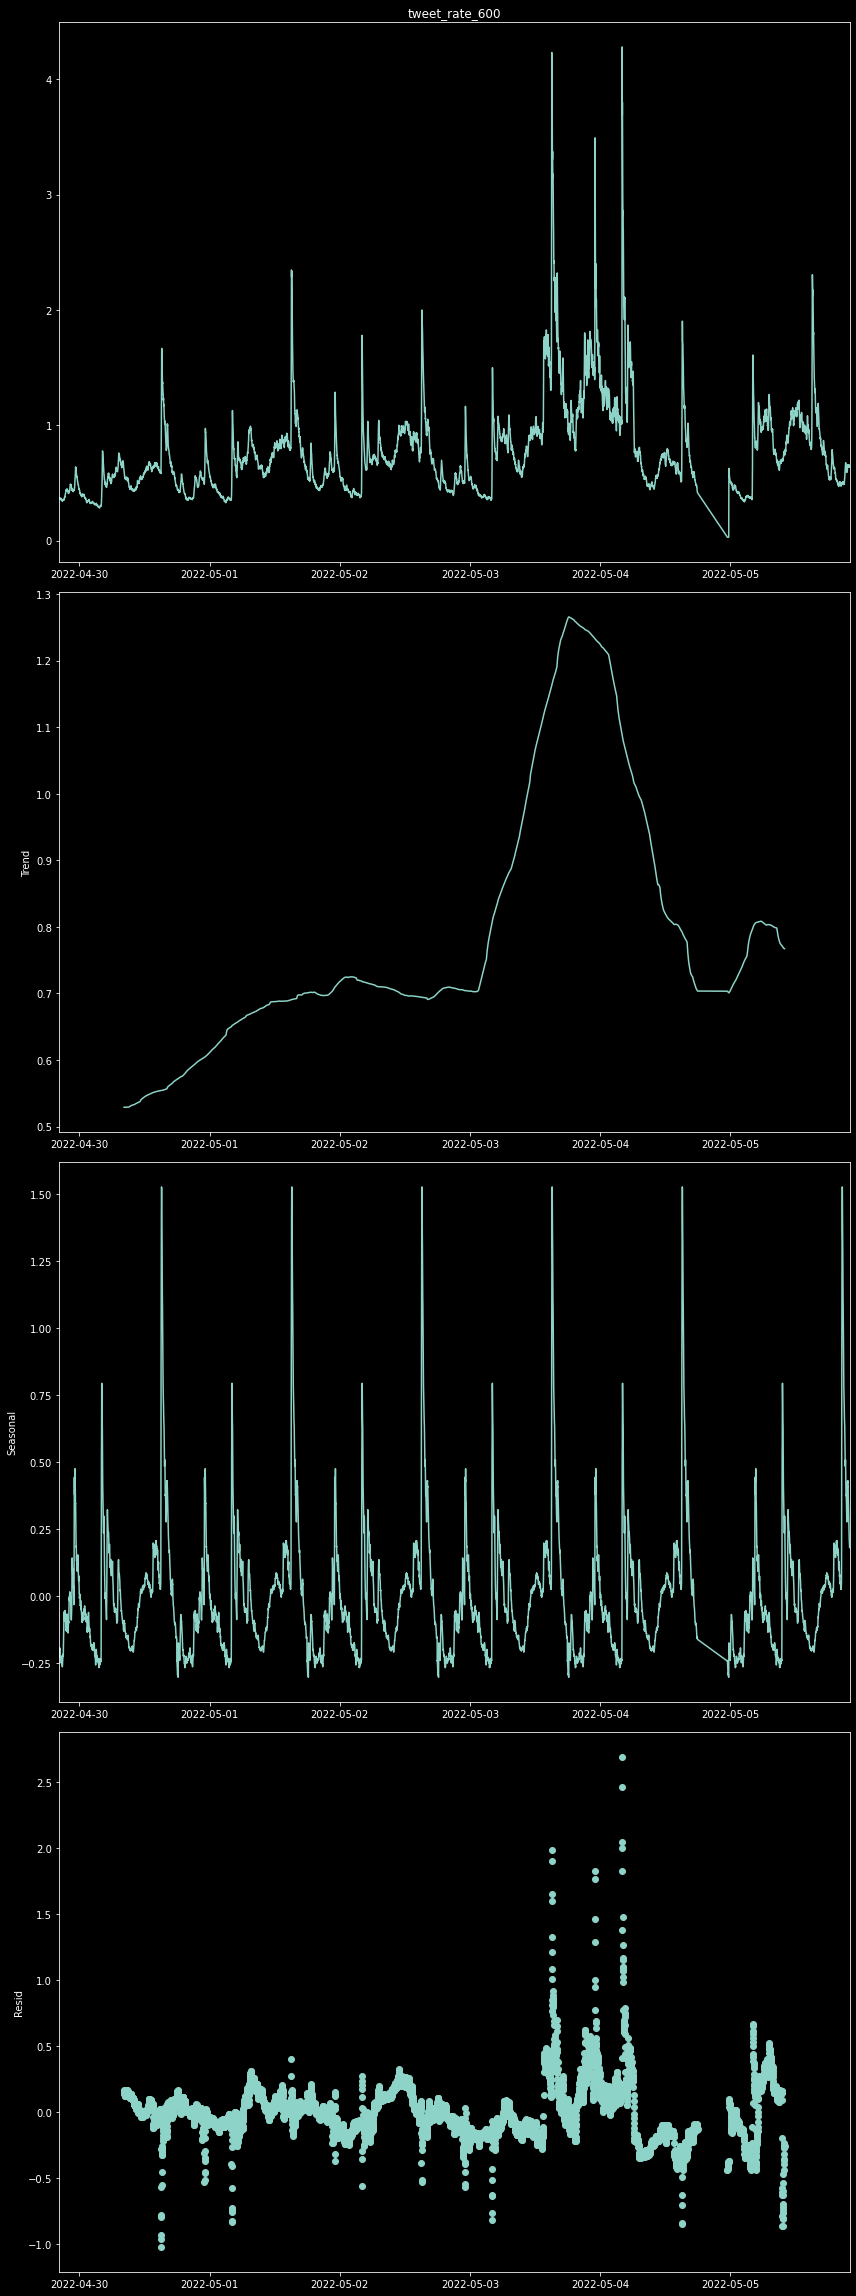

In [362]:
plt.rc('figure',figsize = (12,32))
decomp.plot();

### Decompose by hour --- tweet rate 600

In [363]:
decomp_date_end = datetime(2022, 5, 4, 12, 0, 0, tzinfo = UTC)
decomp = seasonal_decompose(resampled_tudf['tweet_rate_600'].mean().dropna(), period = 60)

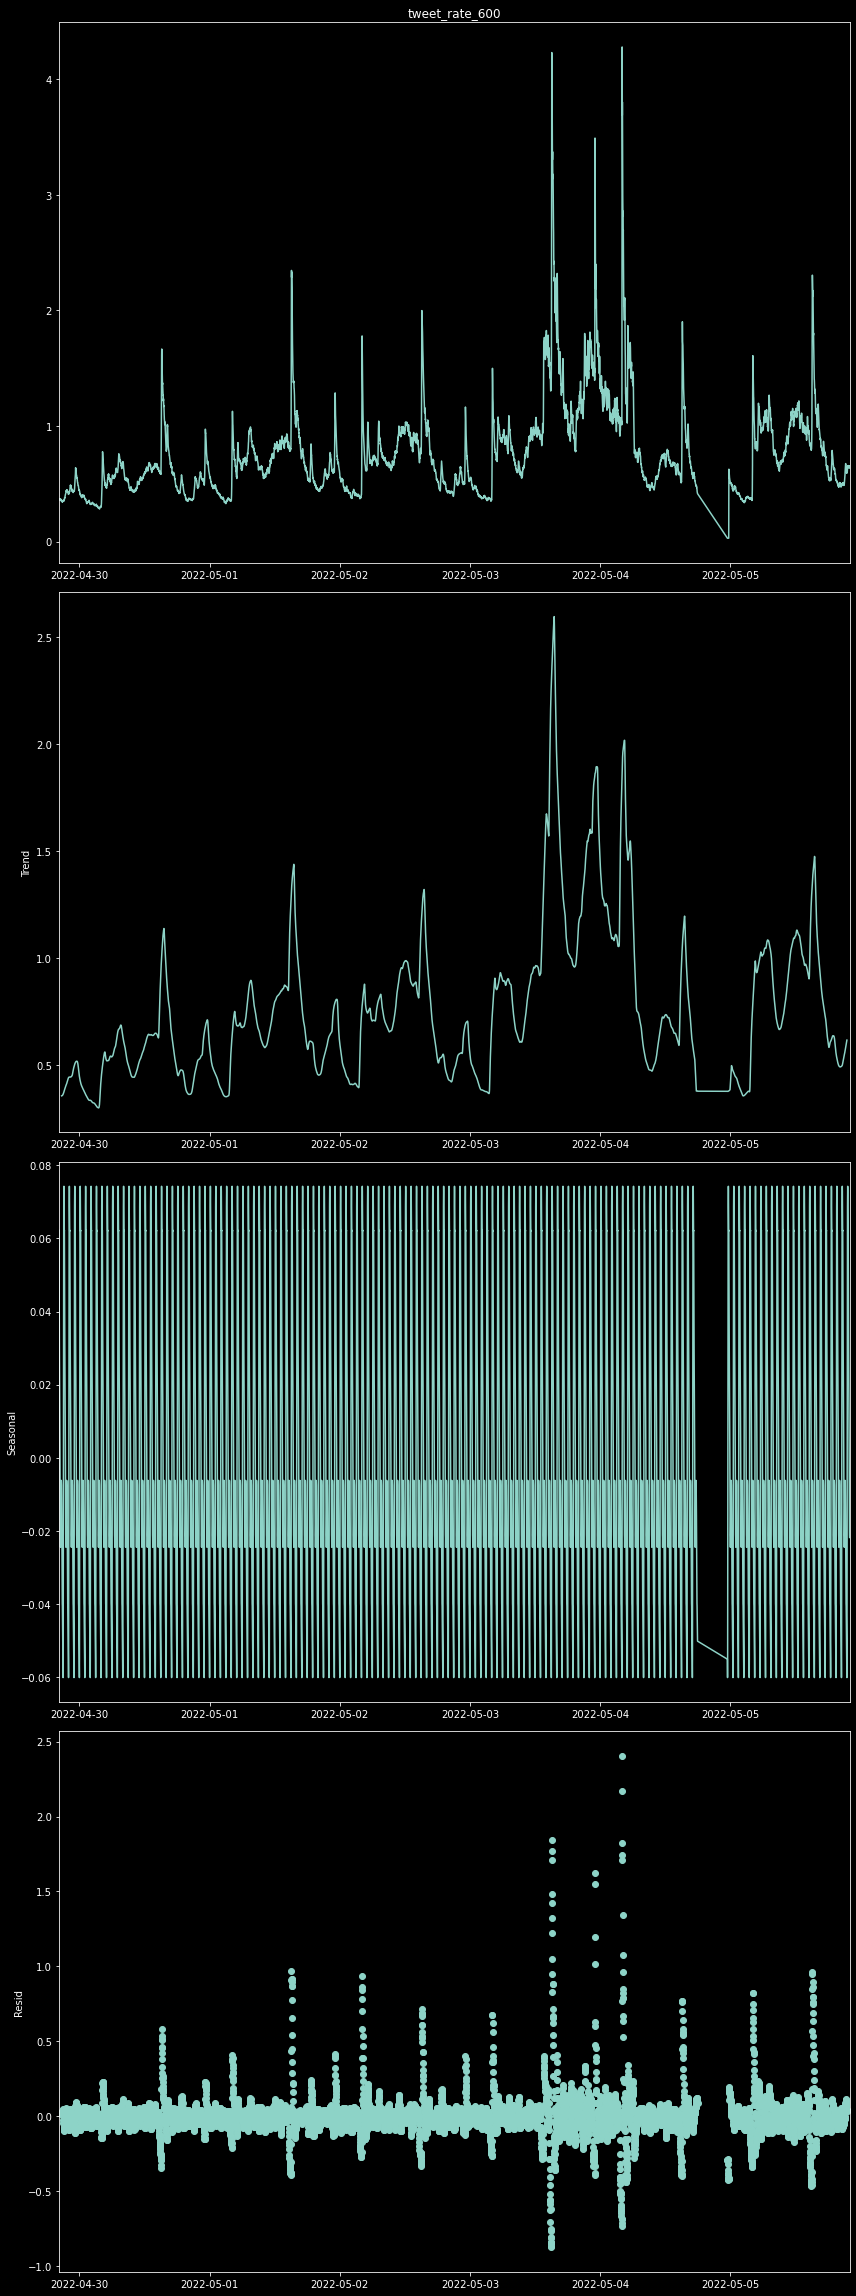

In [364]:
plt.rc('figure',figsize = (12,32))
decomp.plot();

### autocorrelation

In [365]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [366]:
resampled_tudf['tweet_rate_600'].mean().dropna()

created_at
2022-04-29 20:14:00+00:00    0.359842
2022-04-29 20:15:00+00:00    0.361531
2022-04-29 20:16:00+00:00    0.363095
2022-04-29 20:17:00+00:00    0.363912
2022-04-29 20:18:00+00:00    0.364595
                               ...   
2022-05-05 21:55:00+00:00    0.655620
2022-05-05 21:56:00+00:00    0.649971
2022-05-05 21:57:00+00:00    0.643458
2022-05-05 21:58:00+00:00    0.639689
2022-05-05 21:59:00+00:00    0.636048
Name: tweet_rate_600, Length: 8417, dtype: float64

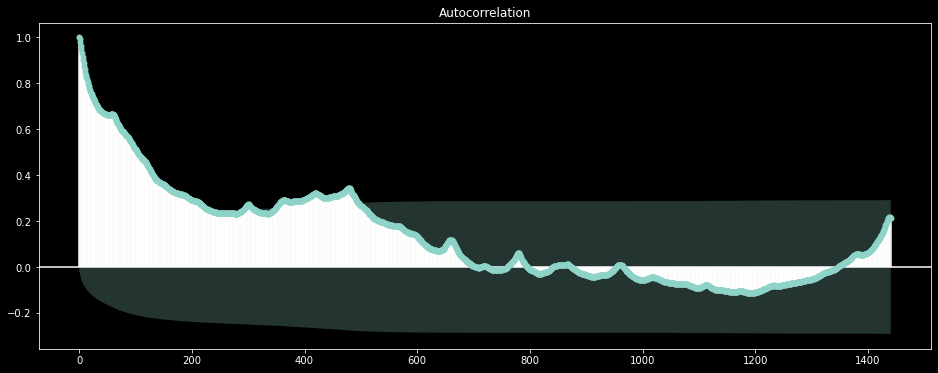

In [367]:
# Plot autocorrelation for lags up to one full day.
# There is a kink at 60 minutes, and at 23 and 24 hours.

plt.rc('figure',figsize = (16,6))
plot_acf(resampled_tudf['tweet_rate_600'].mean().dropna(), lags = 60*24);

### Partial autocorrelation


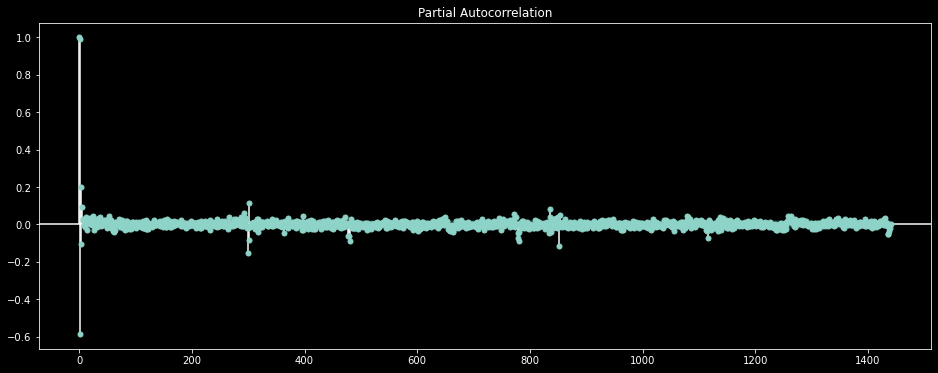

In [368]:
plt.rc('figure',figsize = (16,6))
plot_pacf(resampled_tudf['tweet_rate_600'].mean().dropna(), lags = 60*24);

(-0.15, 0.15)

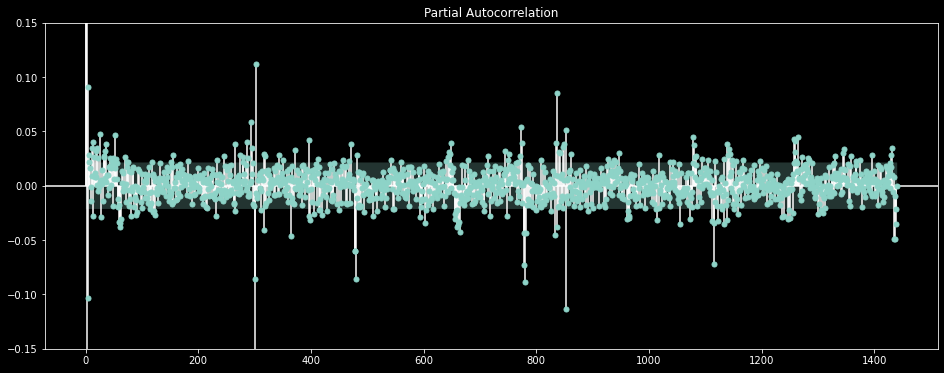

In [369]:
plt.rc('figure',figsize = (16,6))
pacf_plot = plot_pacf(resampled_tudf['tweet_rate_600'].mean().dropna(), lags = 60*24);
pacf_plot.axes[0].set_ylim([-0.15,0.15])

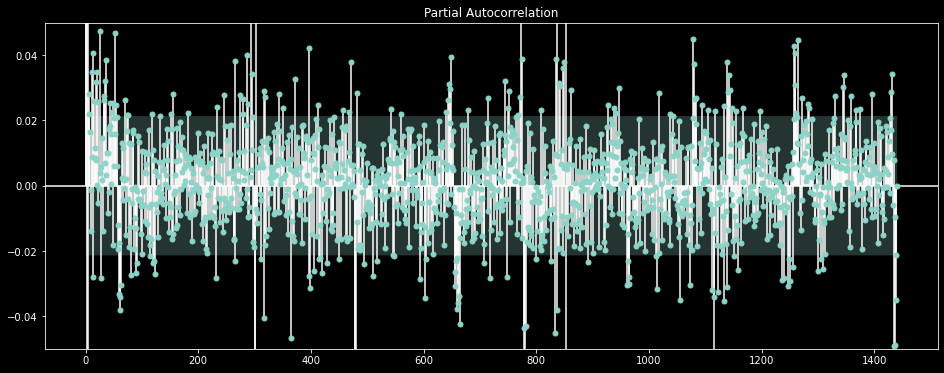

In [370]:
pacf_plot.axes[0].set_ylim([-0.05,0.05])
pacf_plot

In [375]:
# save time series data up to here for practice with time series models
resampled_tudf.mean().to_csv('../merged_data/resampled_tudf_minute_basic.csv', index = True)

In [ ]:
pd.DataFrame.to_csv()

In [374]:
resampled_tudf.mean().index

DatetimeIndex(['2022-04-29 19:46:00+00:00', '2022-04-29 19:47:00+00:00',
               '2022-04-29 19:48:00+00:00', '2022-04-29 19:49:00+00:00',
               '2022-04-29 19:50:00+00:00', '2022-04-29 19:51:00+00:00',
               '2022-04-29 19:52:00+00:00', '2022-04-29 19:53:00+00:00',
               '2022-04-29 19:54:00+00:00', '2022-04-29 19:55:00+00:00',
               ...
               '2022-05-05 21:50:00+00:00', '2022-05-05 21:51:00+00:00',
               '2022-05-05 21:52:00+00:00', '2022-05-05 21:53:00+00:00',
               '2022-05-05 21:54:00+00:00', '2022-05-05 21:55:00+00:00',
               '2022-05-05 21:56:00+00:00', '2022-05-05 21:57:00+00:00',
               '2022-05-05 21:58:00+00:00', '2022-05-05 21:59:00+00:00'],
              dtype='datetime64[ns, UTC]', name='created_at', length=8774, freq='60S')

# geo and location

`geo` is a geocode corresponding to a location. They are also called `place_id`. The great majority of tweets do not have a geo code. Location comes from the user data, rather than the tweet itself.

According to [Get information about a place](https://developer.twitter.com/en/docs/twitter-api/v1/geo/place-information/api-reference/get-geo-id-place_id) in the Twitter docs,
> These IDs can be retrieved from geo/reverse_geocode.

`location` is a very general string.

In [469]:

tudf.columns

Index(['conversation_id', 'reply_settings', 'lang', 'possibly_sensitive',
       'source', 'public_metrics_tweet', 'text', 'context_annotations',
       'author_id', 'created_at', 'referenced_tweets', 'in_reply_to_user_id',
       'attachments', 'geo', 'withheld_tweet', 'name', 'public_metrics_user',
       'url', 'description', 'profile_image_url', 'location', 'protected',
       'username', 'verified', 'entities_user', 'pinned_tweet_id',
       'withheld_user', 'entities_tweeturls', 'entities_tweetmentions',
       'entities_tweethashtags', 'entities_tweetannotations',
       'entities_tweetcashtags', 'wordle_tweet_number', 'ones',
       'time_since_last_tweet', 'wordle_tweet_rate',
       'time_since_last_tweet_rolling_60', 'time_since_last_tweet_rolling_600',
       'tweet_rate_60', 'tweet_rate_600'],
      dtype='object')

In [470]:
tudf['geo'].value_counts()

{}                                  329994
{'place_id': '206c436ce43a43a3'}       131
{'place_id': '018f1cde6bad9747'}        73
{'place_id': '3797791ff9c0e4c6'}        54
{'place_id': '0161be1b3f98d6c3'}        43
                                     ...  
{'place_id': '5552c90a5411d6b2'}         1
{'place_id': '013522304ee10b39'}         1
{'place_id': '231af294750b236e'}         1
{'place_id': '699e7e72554fee2a'}         1
{'place_id': '019cbbb8154486f2'}         1
Name: geo, Length: 1762, dtype: int64

In [471]:
len(tudf)

335327

In [472]:
#she/her is a location according to 239 of these

In [490]:
tudf['location'].value_counts().iloc[:50]

                               75177
0                              52181
United States                   1163
London                           946
Los Angeles, CA                  937
London, England                  825
India                            781
Chicago, IL                      767
日本                               722
Madrid                           677
Canada                           665
New York, NY                     625
United Kingdom                   576
she/her                          570
Atlanta, GA                      570
UK                               565
California, USA                  559
Australia                        544
England, United Kingdom          542
Japan                            538
España                           538
Washington, DC                   512
USA                              477
Toronto, Ontario                 458
Buenos Aires, Argentina          444
Seattle, WA                      441
Tokyo                            439
M

In [491]:
tudf['location'].value_counts().iloc[50:100]

Tokyo, Japan                      293
NYC                               293
Spain                             287
Los Angeles                       281
California                        281
Dallas, TX                        280
Singapore                         278
Bengaluru, India                  278
Mumbai                            277
San Diego, CA                     271
Malaysia                          268
Massachusetts, USA                262
İstanbul, Türkiye                 261
Portland, OR                      260
Chennai, India                    255
Scotland                          248
Texas                             243
Pittsburgh, PA                    243
Ontario, Canada                   242
Bangalore                         240
Las Vegas, NV                     238
Nashville, TN                     237
Sydney, New South Wales           235
Pennsylvania, USA                 234
Ohio, USA                         234
Charlotte, NC                     233
Virginia, US

In [492]:
tudf['entities_user'].iloc[2]

'{}'

# User `entities`

I've called them `entities_user` in the merged df.

In [ ]:
json_list

In [ ]:
#the .replace("'", '"')
# must be done to replace single quotes with double quotes. otherwise it's not JSON.
json.loads(tudf['entities_user'].iloc[1].replace("'", '"'))

In [ ]:
json.loads()

In [ ]:
str.replace

### verified

In [234]:
tudf[tudf['verified'] == True]

,conversation_id,reply_settings,lang,entities_tweet,possibly_sensitive,source,public_metrics_tweet,text,context_annotations,author_id,...,url,description,profile_image_url,location,protected,username,verified,entities_user,pinned_tweet_id,withheld_user
tweet_id,,,,,,,,,,,,,,,,,,,,,
1521732483011678208,1521732483011678208,everyone,en,0,False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 319 4/6\n\n⬜⬜🟩🟨🟩\n⬜🟩🟩⬜🟩\n⬜🟩🟩🟩🟩\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",21319630,...,https://t.co/ruI5hDjoCJ,Culture editor for https://t.co/BxsqjLzAG9. Ol...,https://pbs.twimg.com/profile_images/137802458...,"Salt Lake City, Utah",False,SeanPMeans,True,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",0.000000e+00,0
1521728105353678851,1521728105353678851,everyone,en,0,False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 319 4/6\n\n⬜⬜🟨⬜⬜\n⬜🟨⬜⬜🟩\n⬜🟨🟩🟩🟩\n🟩🟩🟩🟩🟩🏋️‍♀️,"[{'domain': {'id': '30', 'name': 'Entities [En...",20658431,...,https://t.co/u0IQ155nFc,Televisionary,https://pbs.twimg.com/profile_images/152146574...,Australia,False,Jabbatron,True,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",1.133909e+18,0
1521727958372737025,1510855326161117185,everyone,en,"{'mentions': [{'start': 0, 'end': 16, 'usernam...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",@IreneSGuadalupo @NisMorFer Wordle 319 4/6\n⬜🟨...,"[{'domain': {'id': '30', 'name': 'Entities [En...",18690355,...,https://t.co/Zz9rgVMkU0,Desearía que más personas se preocuparan del m...,https://pbs.twimg.com/profile_images/143172254...,Segovia,False,Milhaud,True,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",9.941547e+17,0
1521726666585874434,1521726666585874434,everyone,en,"{'urls': [{'start': 42, 'end': 65, 'url': 'htt...",False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle (ES) #118 3/6\n\n⬜⬜⬜⬜🟩\n⬜⬜🟨⬜🟩\n🟩🟩🟩🟩🟩\n...,"[{'domain': {'id': '30', 'name': 'Entities [En...",189823957,...,0,Me encanta viajar por carreteras secundarias. ...,https://pbs.twimg.com/profile_images/146798198...,Murcia,False,garciaretegui,True,0,0.000000e+00,0
1521724243062366213,1521724243062366213,everyone,en,0,False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 319 4/6\n\n🟩⬛⬛⬛⬛\n🟨⬛⬛⬛⬛\n⬛🟩🟨🟨⬛\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",19869814,...,https://t.co/9T1aAAFXt8,Sports journalist @the_hindu . FIA accredited ...,https://pbs.twimg.com/profile_images/142319722...,Chennai,False,dipakragav,True,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",0.000000e+00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520735198828109824,1520735198828109824,everyone,en,0,False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 14, 'like_...",Wordle 316 5/6\r\n\r\n⬜🟨⬜⬜⬜\r\n⬜⬜⬜⬜⬜\r\n⬜⬜🟩⬜⬜\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",23103351,...,https://t.co/xjEa5MGsYT,@EbonyMag #Power100 @Essence #Woke100. Prof. P...,https://pbs.twimg.com/profile_images/126838338...,Global,False,karenhunter,True,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",1.147608e+18,0
1520734510379323392,1520734510379323392,everyone,tr,"{'urls': [{'start': 48, 'end': 71, 'url': 'htt...",False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 3, 'like_c...",Wordle Türkçe 316 4/6\r\n\r\n⬜⬜⬜⬜⬜\r\n🟩⬜⬜⬜⬜\r\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",341071545,...,https://t.co/OByiy1t7Rj,"@kafadergisi yazarı, Oyuncu. iletişim: @gavsar...",https://pbs.twimg.com/profile_images/138310839...,İstanbul,False,celilnalcakan,True,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",1.512321e+18,0
1520733907217432578,1492893611825971204,everyone,en,0,False,Twitter Web App,"{'retweet_count': 0, 'reply_count': 2, 'like_c...",Too many close calls here...\r\n\r\nWordle 316...,"[{'domain': {'id': '30', 'name': 'Entities [En...",32284383,...,https://t.co/04uDTeI5Ld,"Meteorologist with @CityNewsTO, @WGR